# Set up : normal , normal_balanced , preprocessed , preprocessed_balanced

### **All Libraries**

In [54]:
# Data Handling
import pandas as pd

# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training & Splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Timing Execution
import time


### **Preparation du fichier / Analyse**

In [55]:
import pandas as pd


df = pd.read_csv("ASTD_RAW.csv", encoding="utf-8")

# Find the number of duplicate rows based on the 'Text' column
duplicates_count = df.duplicated(subset="Text").sum()

# Remove duplicate rows based on the 'Text' column
df = df.drop_duplicates(subset="Text", keep="first")

# Print the results
print(f"{duplicates_count} duplicate rows were deleted.")

4 duplicate rows were deleted.


Sentiment Distribution:
 Label
OBJ        6466
NEG        1642
NEUTRAL     805
POS         777
Name: count, dtype: int64


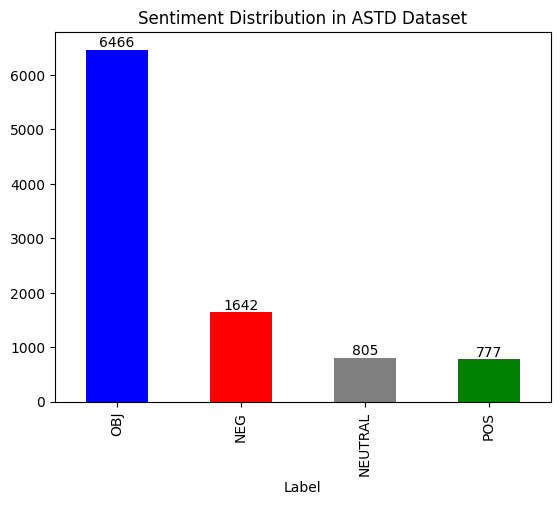

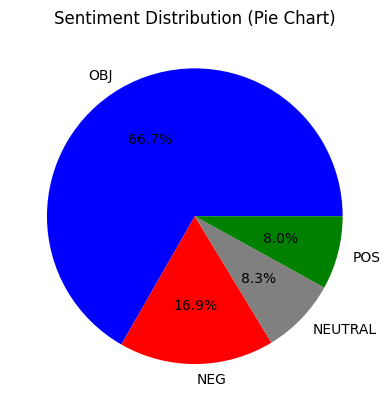

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 4 ratings
colors = ["blue", "red", "gray", "green"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in ASTD Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart)")
plt.ylabel("")
#plt.savefig("pie_chart.png")
print("\n")
plt.show()


In [57]:
# Filter out OBJ and NEUTRAL sentiments
df = df[df["Label"].isin(["POS", "NEG"])]

# Print summary
print("New Sentiment Distribution:")
print(df["Label"].value_counts())

New Sentiment Distribution:
Label
NEG    1642
POS     777
Name: count, dtype: int64


Sentiment Distribution:
 Label
NEG    1642
POS     777
Name: count, dtype: int64


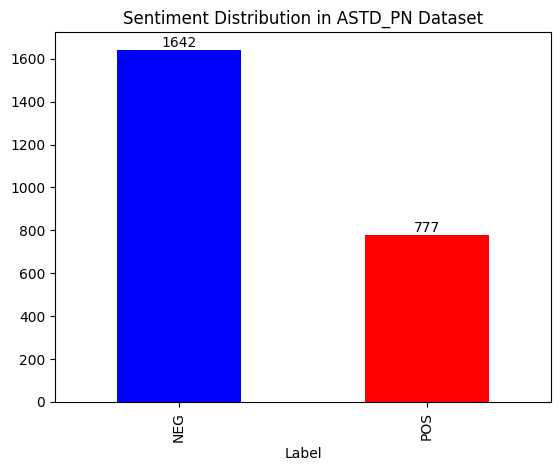

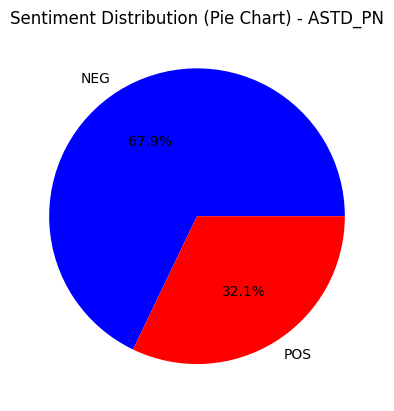

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
#df = pd.read_csv("ASTD_PN.csv", encoding="utf-8")

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 2 ratings
colors = ["blue", "red"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in ASTD_PN Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart_pn.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart) - ASTD_PN")
plt.ylabel("")
#plt.savefig("pie_chart_pn.png")
print("\n")
plt.show()


In [59]:
# Replace POS with 1 and NEG with 0 in the 'Label' column
df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})

# Save the new dataset
df.to_csv("ASTD.csv", index=False, encoding="utf-8")

# Print the first few rows to verify
print("Updated dataset saved as ASTD.csv")


Updated dataset saved as ASTD.csv


<ipython-input-59-25cfcb4c7c90>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})


### **Pretraitement**

In [60]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
def remove_non_arabic(text):
    if isinstance(text, str):
        return re.sub(r'[^\u0620-\u064A\s]', ' ', text)
    return ''

def tokenization(text):
    if isinstance(text, str):
        return re.findall(r'\S+', text)  # Matches sequences of non-space characters
    return []

def remove_arabic_stopwords(tokens):
    arabic_stopwords = set(stopwords.words("arabic"))  # Convert to set for faster lookup
    return [token for token in tokens if token not in arabic_stopwords]

def get_root(word, stemmer):
    if isinstance(word, str):
        return stemmer.stem(word)
    return word

def stemming_AR(tokens):
    stemmer = ISRIStemmer()
    return [get_root(token, stemmer) for token in tokens]

def rejoin_tokens(tokens):
    filtered_tokens = [token for token in tokens if isinstance(token, str) and token.strip()]
    return ' '.join(filtered_tokens)

In [62]:
def ASTD_pretraitement(text):
    if isinstance(text, str):

        # Step 1: Remove non-arabic characters
        text = remove_non_arabic(text)

        # Step 2: Tokenization (split text into tokens)
        tokens = tokenization(text)

        # Step 3: Remove Arabic stopwords
        tokens = remove_arabic_stopwords(tokens)

        # Step 4: Apply stemming (ISRI Stemmer for Arabic)
        tokens = stemming_AR(tokens)

        # Step 5: Rejoin tokens into a single string
        return rejoin_tokens(tokens)

    return ''

In [63]:
print(f"Start processing ASTD ...\n")
ASTD = pd.read_csv("/content/ASTD.csv")
ASTD["Text"] = [ASTD_pretraitement(text) for text in df["Text"]]
ASTD.to_csv("/content/ASTD_Pre.csv", index=False)
print(f"Finished processing ASTD!\n")

Start processing ASTD ...

Finished processing ASTD!



### **Balancing**

In [64]:
from sklearn.utils import resample
import pandas as pd

# Load your original dataset
df = pd.read_csv('ASTD.csv', encoding='utf-8-sig')

# Drop NaNs
df = df.dropna(subset=['Text']).reset_index(drop=True)

# Separate classes
df_majority = df[df['Label'] == 0]
df_minority = df[df['Label'] == 1]

# Oversample minority
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv('ASTD_Blc.csv', index=False, encoding='utf-8-sig')

print("Balanced text data saved to 'ASTD_BLC.csv'")



# Load your original dataset
df = pd.read_csv('ASTD_Pre.csv', encoding='utf-8-sig')

# Drop NaNs
df = df.dropna(subset=['Text']).reset_index(drop=True)

# Separate classes
df_majority = df[df['Label'] == 0]
df_minority = df[df['Label'] == 1]

# Oversample minority
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv('ASTD_Pre_Blc.csv', index=False, encoding='utf-8-sig')

print("Balanced text data saved to 'ASTD_Pre_Blc.csv'")

Balanced text data saved to 'ASTD_BLC.csv'
Balanced text data saved to 'ASTD_Pre_Blc.csv'


# Set up : Algorithms Functions

### Libraries

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

### **Visualisation / Metrics**

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_results(confusion_matrix, y_test, y_pred, dataset_name, algorithm_name, execution_time, num_positive, num_negative):
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]

    epsilon = 1e-10
    accuracy = (TP + TN) / (TP + TN + FP + FN + epsilon)

    # Per-class metrics
    precision_per_class = precision_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    recall_per_class = recall_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    support_0 = sum(y_test == 0)
    support_1 = sum(y_test == 1)

    # Prepare result dict (optional to return it)
    results = {
        "Dataset": dataset_name,
        "Algorithm": algorithm_name,
        "Confusion Matrix": confusion_matrix,
        "Accuracy": round(accuracy, 4),
        "Precision_0": round(precision_per_class[0], 4),
        "Recall_0": round(recall_per_class[0], 4),
        "F1_0": round(f1_per_class[0], 4),
        "Support_0": support_0,
        "Precision_1": round(precision_per_class[1], 4),
        "Recall_1": round(recall_per_class[1], 4),
        "F1_1": round(f1_per_class[1], 4),
        "Support_1": support_1,
        "Number of Positive Samples": num_positive,
        "Number of Negative Samples": num_negative,
        "Execution Time (s)": round(execution_time, 4)
    }

    # --- Visualization ---
    title = f"{dataset_name} with {algorithm_name}"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios': [1, 1.1]})
    fig.suptitle(title, fontsize=14, fontweight='bold')

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
                square=True, linewidths=0, linecolor='white')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.set_title('Confusion Matrix', fontsize=12)
    ax1.set_xticklabels(['Negative', 'Positive'])
    ax1.set_yticklabels(['Negative', 'Positive'])

    ax2.axis('off')
    ax2.set_title('Statistics Summary', fontsize=12, fontweight='bold', loc='left')

    stats_text = [
        f"Accuracy: {results['Accuracy']}",
        f"Execution Time: {execution_time:.2f} sec",
        f"Training Positives: {num_positive}",
        f"Training Negatives: {num_negative}"
    ]
    y_text = 0.95
    for line in stats_text:
        ax2.text(0.01, y_text, line, fontsize=11, va='top')
        y_text -= 0.07

    col_labels = ['Precision', 'Recall', 'F1 Score', 'Support']
    row_labels = ['Class 0 (Neg)', 'Class 1 (Pos)']
    cell_data = [
        [results['Precision_0'], results['Recall_0'], results['F1_0'], results['Support_0']],
        [results['Precision_1'], results['Recall_1'], results['F1_1'], results['Support_1']]
    ]
    table = ax2.table(
        cellText=cell_data,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        colLoc='center',
        loc='center',
        bbox=[0.01, 0.05, 0.9, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(0.95, 1.0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

    return results


### **Vectorize**

In [67]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def vectorize_text_data(csv_path, sample_percentage=1.0):
    df = pd.read_csv(csv_path, encoding='utf-8-sig')
    df = df[df['Text'].notna() & (df['Text'] != "")]

    if sample_percentage < 1.0:
        df = df.sample(frac=sample_percentage, random_state=42).reset_index(drop=True)

    X = df['Text']
    y = df['Label']

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf, y_train, y_test, df

### **Traitement**

In [68]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def run_model_on_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, model_name, dataset_name, model_params=None):
    # Create and Train Model
    model = model_class(**(model_params or {}))
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    execution_time = time.time() - start_time

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics
    results = analyze_and_visualize_results(
        confusion_matrix=cm,
        y_test=y_test,
        y_pred=y_pred,
        dataset_name=dataset_name,
        algorithm_name=model_name,
        execution_time=execution_time,
        num_positive=len(df[df['Label'] == 1]),
        num_negative=len(df[df['Label'] == 0])
    )

    return results


### **Hyper Parameter Testing Function (one datasets)**

In [69]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import time

def test_model_with_param_from_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, param_name, param_values, dataset_label="Dataset"):
    print("\n\n")
    f1_scores_class_0 = []
    f1_scores_class_1 = []
    avg_f1_scores = []
    valid_param_values = []

    for value in param_values:
        try:
            model = model_class(**{param_name: value})
            start_time = time.time()
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)
            exec_time = time.time() - start_time

            f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1])
            f1_scores_class_0.append(f1_per_class[0])
            f1_scores_class_1.append(f1_per_class[1])
            avg = (f1_per_class[0] + f1_per_class[1]) / 2
            avg_f1_scores.append(avg)
            valid_param_values.append(value)

            print(f"{param_name}: {value} | F1[0]: {round(f1_per_class[0], 4)} | F1[1]: {round(f1_per_class[1], 4)} | Avg F1: {round(avg, 4)} | Time: {round(exec_time, 4)}s")

        except Exception as e:
            print(f"Skipping {param_name} = {value} due to error: {e}")

    if not valid_param_values:
        print(" No successful parameter values to display.")
        return None  # Explicit return when nothing worked

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(valid_param_values, f1_scores_class_0, marker='o', linestyle='--', color='red', label='F1 Score - Class 0 (Negative)')
    plt.plot(valid_param_values, f1_scores_class_1, marker='o', linestyle='-', color='blue', label='F1 Score - Class 1 (Positive)')
    plt.title(f'{dataset_label}\nF1 Score vs {param_name}', fontsize=14, fontweight='bold')
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary
    best_idx = avg_f1_scores.index(max(avg_f1_scores))
    best_param = valid_param_values[best_idx]
    best_score = avg_f1_scores[best_idx]

    print(f"\nBest {param_name} = {best_param} with Avg F1 = {round(best_score, 4)}")

    return best_param  # returns the best value

### **Victorize all data**

In [70]:
# === Global table to store results from all algorithms
all_Algo_results = pd.DataFrame()

# === Step 0: Load and vectorize datasets
X_train1, X_test1, y_train1, y_test1, df1 = vectorize_text_data("ASTD.csv")
X_train2, X_test2, y_train2, y_test2, df2 = vectorize_text_data("ASTD_Blc.csv")
X_train3, X_test3, y_train3, y_test3, df3 = vectorize_text_data("ASTD_Pre.csv")
X_train4, X_test4, y_train4, y_test4, df4 = vectorize_text_data("ASTD_Pre_Blc.csv")

datasets = {
    "ASTD":                         (X_train1, X_test1, y_train1, y_test1, df1),
    "ASTD_Balanced":               (X_train2, X_test2, y_train2, y_test2, df2),
    "ASTD_Preprocessed":           (X_train3, X_test3, y_train3, y_test3, df3),
    "ASTD_Preprocessed_Balanced":  (X_train4, X_test4, y_train4, y_test4, df4)
}


# ASTD Dataset - Full Comparison of 8 Algorithms

## **Multinomial Naive Bayes**


=== Step 1: MultinomialNB with DEFAULT parameters ===


-- Running default model on ASTD --


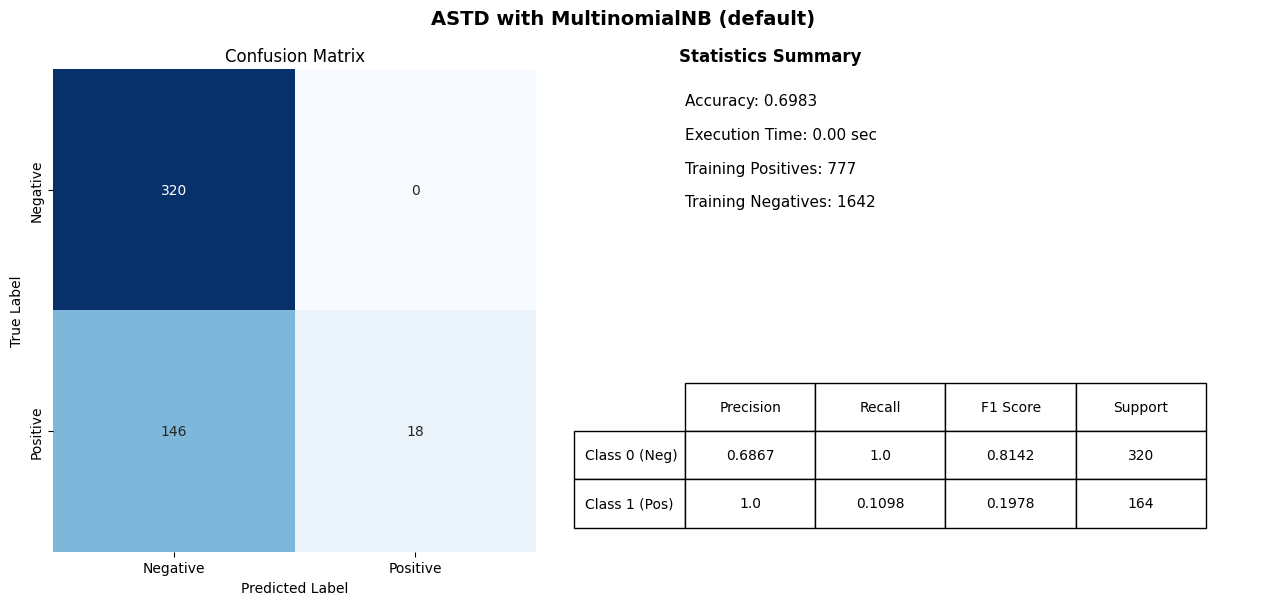


-- Running default model on ASTD_Balanced --


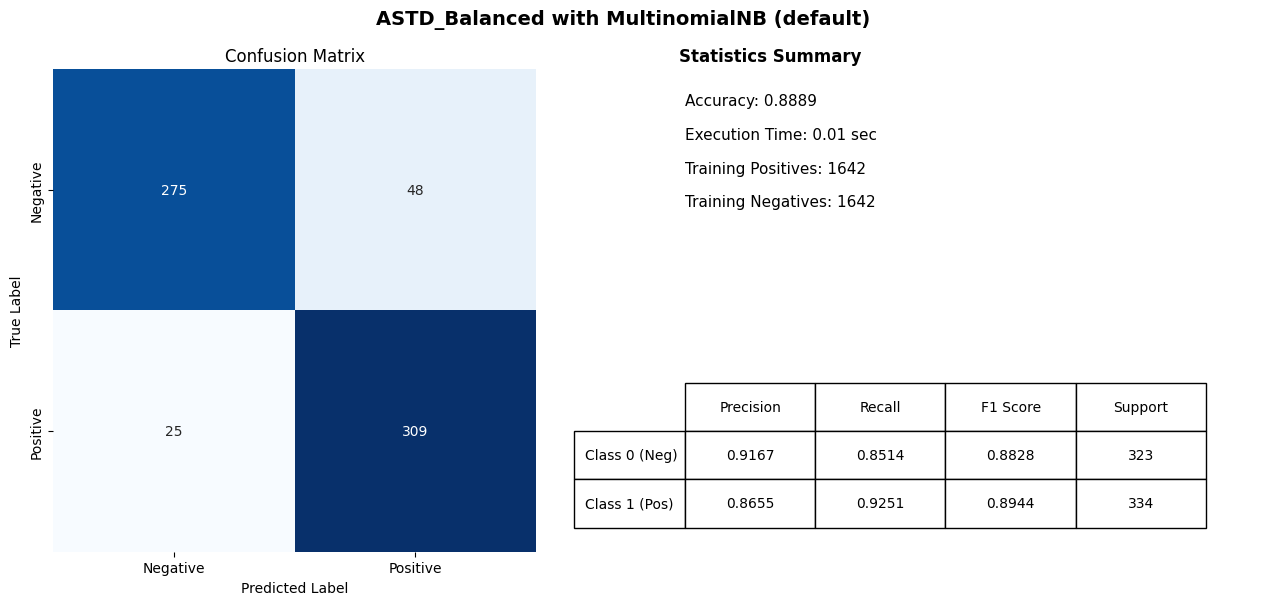


-- Running default model on ASTD_Preprocessed --


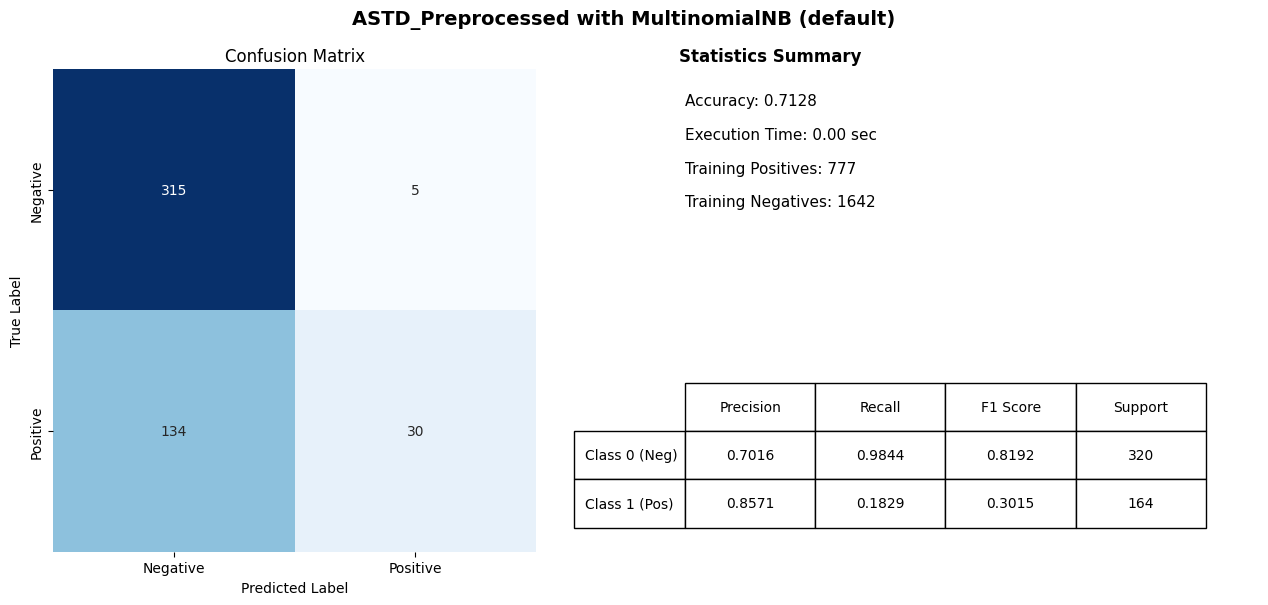


-- Running default model on ASTD_Preprocessed_Balanced --


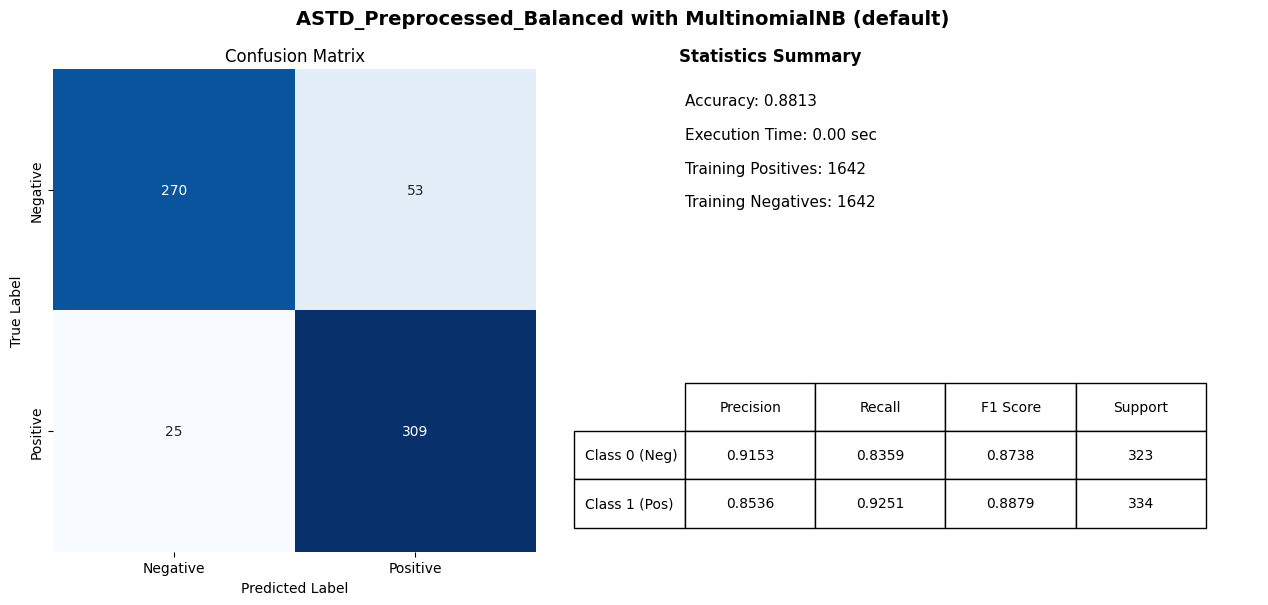


=== Step 2: Tuning alpha for MultinomialNB ===


-- Tuning ASTD --



alpha: 0.0001 | F1[0]: 0.8235 | F1[1]: 0.5461 | Avg F1: 0.6848 | Time: 0.0066s
alpha: 0.01 | F1[0]: 0.8251 | F1[1]: 0.5745 | Avg F1: 0.6998 | Time: 0.0039s
alpha: 0.05 | F1[0]: 0.8268 | F1[1]: 0.5765 | Avg F1: 0.7016 | Time: 0.0035s
alpha: 0.1 | F1[0]: 0.8286 | F1[1]: 0.5522 | Avg F1: 0.6904 | Time: 0.0037s
alpha: 0.5 | F1[0]: 0.8195 | F1[1]: 0.3445 | Avg F1: 0.582 | Time: 0.0026s
alpha: 1.0 | F1[0]: 0.8142 | F1[1]: 0.1978 | Avg F1: 0.506 | Time: 0.0025s
alpha: 2.0 | F1[0]: 0.801 | F1[1]: 0.0592 | Avg F1: 0.4301 | Time: 0.0027s
alpha: 5.0 | F1[0]: 0.797 | F1[1]: 0.0121 | Avg F1: 0.4046 | Time: 0.0024s
alpha: 10.0 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0023s


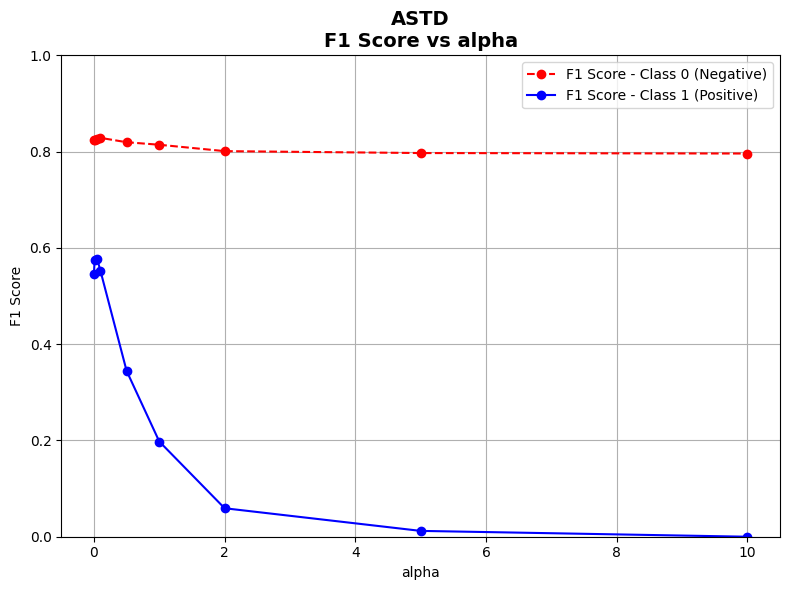


Best alpha = 0.05 with Avg F1 = 0.7016

-- Tuning ASTD_Balanced --



alpha: 0.0001 | F1[0]: 0.8862 | F1[1]: 0.8886 | Avg F1: 0.8874 | Time: 0.0052s
alpha: 0.01 | F1[0]: 0.8841 | F1[1]: 0.8876 | Avg F1: 0.8858 | Time: 0.0041s
alpha: 0.05 | F1[0]: 0.8924 | F1[1]: 0.8975 | Avg F1: 0.8949 | Time: 0.0039s
alpha: 0.1 | F1[0]: 0.8934 | F1[1]: 0.8994 | Avg F1: 0.8964 | Time: 0.004s
alpha: 0.5 | F1[0]: 0.886 | F1[1]: 0.8973 | Avg F1: 0.8916 | Time: 0.0029s
alpha: 1.0 | F1[0]: 0.8828 | F1[1]: 0.8944 | Avg F1: 0.8886 | Time: 0.0028s
alpha: 2.0 | F1[0]: 0.879 | F1[1]: 0.8892 | Avg F1: 0.8841 | Time: 0.0027s
alpha: 5.0 | F1[0]: 0.8829 | F1[1]: 0.8915 | Avg F1: 0.8872 | Time: 0.0026s
alpha: 10.0 | F1[0]: 0.8752 | F1[1]: 0.884 | Avg F1: 0.8796 | Time: 0.0026s


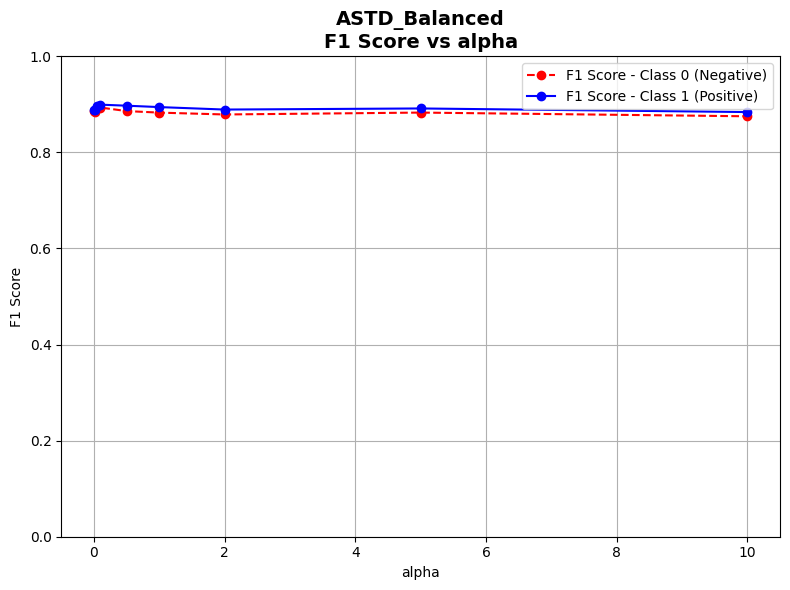


Best alpha = 0.1 with Avg F1 = 0.8964

-- Tuning ASTD_Preprocessed --



alpha: 0.0001 | F1[0]: 0.8097 | F1[1]: 0.5056 | Avg F1: 0.6577 | Time: 0.0043s
alpha: 0.01 | F1[0]: 0.8198 | F1[1]: 0.5571 | Avg F1: 0.6885 | Time: 0.0045s
alpha: 0.05 | F1[0]: 0.8293 | F1[1]: 0.5609 | Avg F1: 0.6951 | Time: 0.0029s
alpha: 0.1 | F1[0]: 0.8362 | F1[1]: 0.5809 | Avg F1: 0.7085 | Time: 0.0021s
alpha: 0.5 | F1[0]: 0.8304 | F1[1]: 0.4589 | Avg F1: 0.6446 | Time: 0.0021s
alpha: 1.0 | F1[0]: 0.8192 | F1[1]: 0.3015 | Avg F1: 0.5604 | Time: 0.0021s
alpha: 2.0 | F1[0]: 0.801 | F1[1]: 0.092 | Avg F1: 0.4465 | Time: 0.0049s
alpha: 5.0 | F1[0]: 0.797 | F1[1]: 0.0121 | Avg F1: 0.4046 | Time: 0.0031s
alpha: 10.0 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0021s


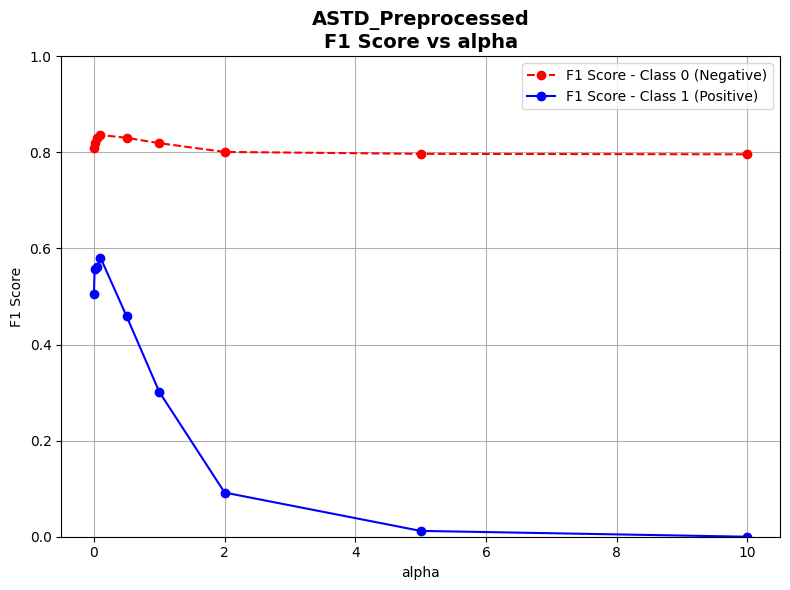


Best alpha = 0.1 with Avg F1 = 0.7085

-- Tuning ASTD_Preprocessed_Balanced --



alpha: 0.0001 | F1[0]: 0.8827 | F1[1]: 0.8859 | Avg F1: 0.8843 | Time: 0.0064s
alpha: 0.01 | F1[0]: 0.8858 | F1[1]: 0.8889 | Avg F1: 0.8873 | Time: 0.0034s
alpha: 0.05 | F1[0]: 0.8802 | F1[1]: 0.8852 | Avg F1: 0.8827 | Time: 0.0026s
alpha: 0.1 | F1[0]: 0.8826 | F1[1]: 0.8889 | Avg F1: 0.8858 | Time: 0.0022s
alpha: 0.5 | F1[0]: 0.8824 | F1[1]: 0.8947 | Avg F1: 0.8886 | Time: 0.0022s
alpha: 1.0 | F1[0]: 0.8738 | F1[1]: 0.8879 | Avg F1: 0.8809 | Time: 0.0022s
alpha: 2.0 | F1[0]: 0.8608 | F1[1]: 0.8764 | Avg F1: 0.8686 | Time: 0.0021s
alpha: 5.0 | F1[0]: 0.8489 | F1[1]: 0.8642 | Avg F1: 0.8565 | Time: 0.0021s
alpha: 10.0 | F1[0]: 0.8397 | F1[1]: 0.8551 | Avg F1: 0.8474 | Time: 0.0022s


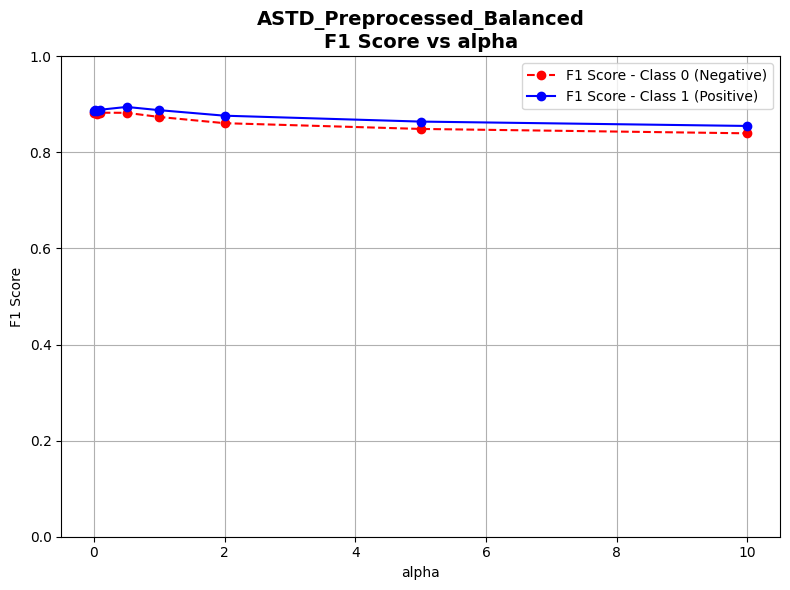


Best alpha = 0.5 with Avg F1 = 0.8886

=== Step 3: MultinomialNB with BEST alpha ===


-- ASTD with best alpha = 0.05 --


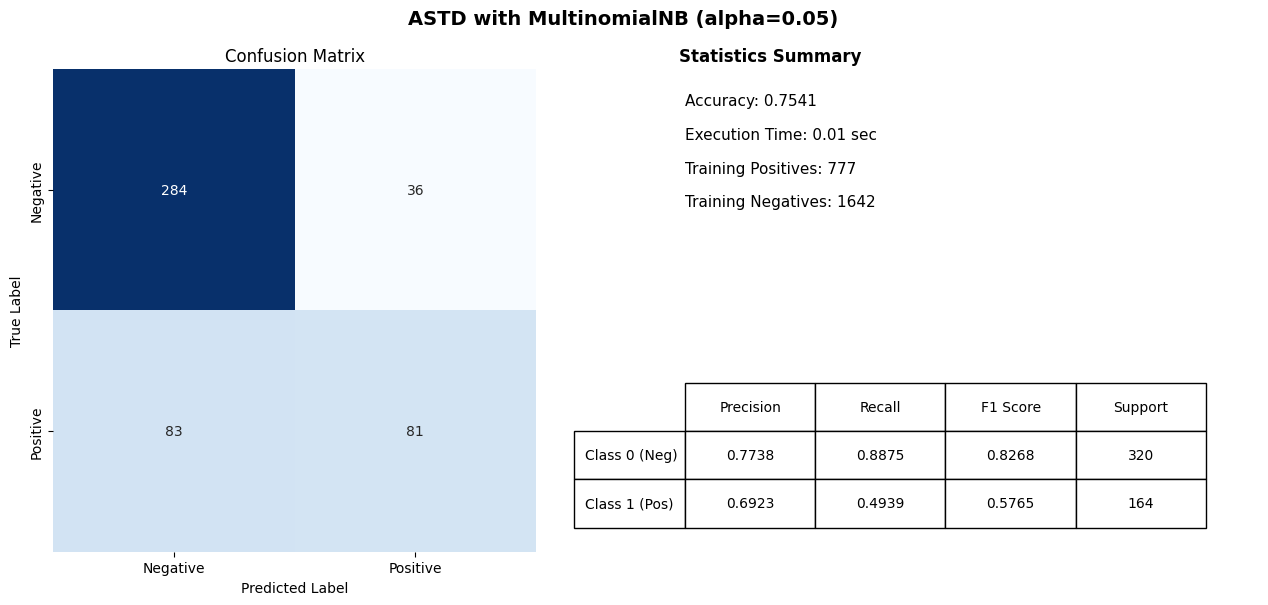


-- ASTD_Balanced with best alpha = 0.1 --


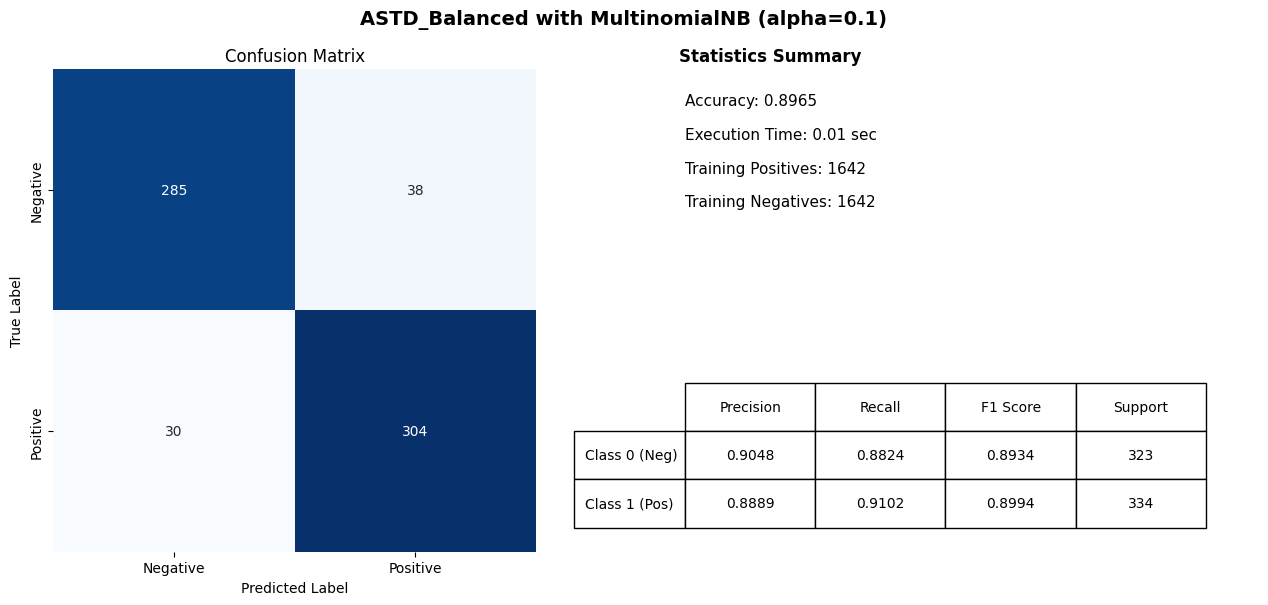


-- ASTD_Preprocessed with best alpha = 0.1 --


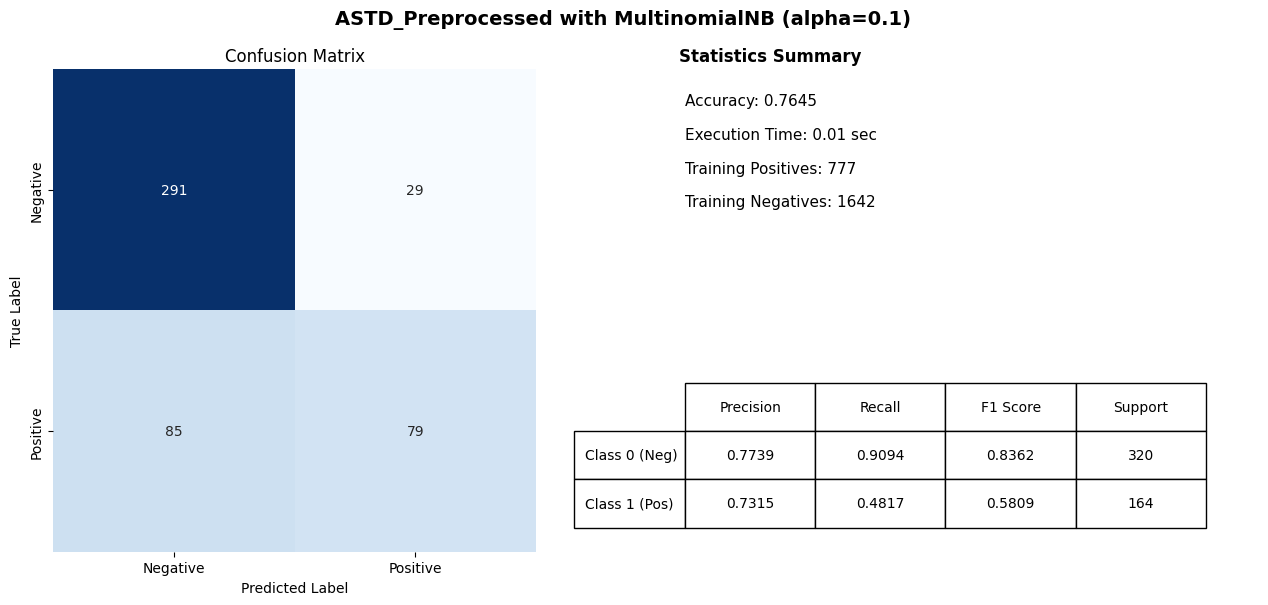


-- ASTD_Preprocessed_Balanced with best alpha = 0.5 --


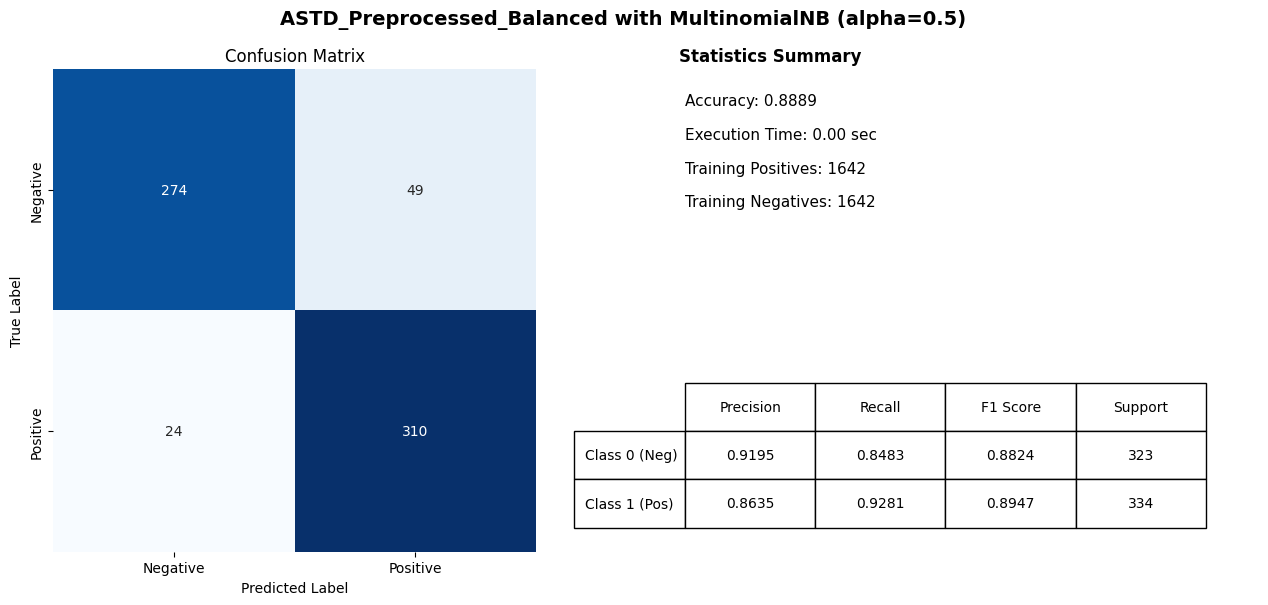

Results saved to 'MultinomialNB_Results.csv'


In [71]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_MNB_results = []

# === Step 1: Run MultinomialNB with default alpha
print("\n=== Step 1: MultinomialNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name="MultinomialNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for MultinomialNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: MultinomialNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name=f"MultinomialNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_MNB_results)

# Save to individual CSV
results_df.to_csv("MultinomialNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'MultinomialNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

## **Complement Naive Bayes**


=== Step 1: ComplementNB with DEFAULT parameters ===


-- Running default model on ASTD --


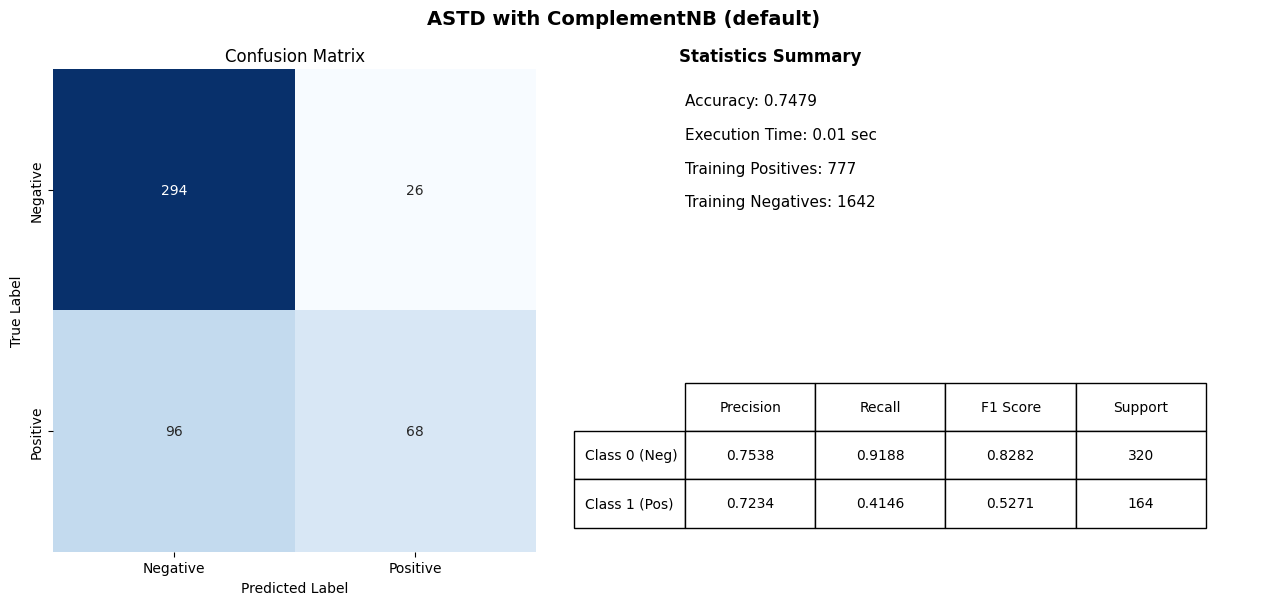


-- Running default model on ASTD_Balanced --


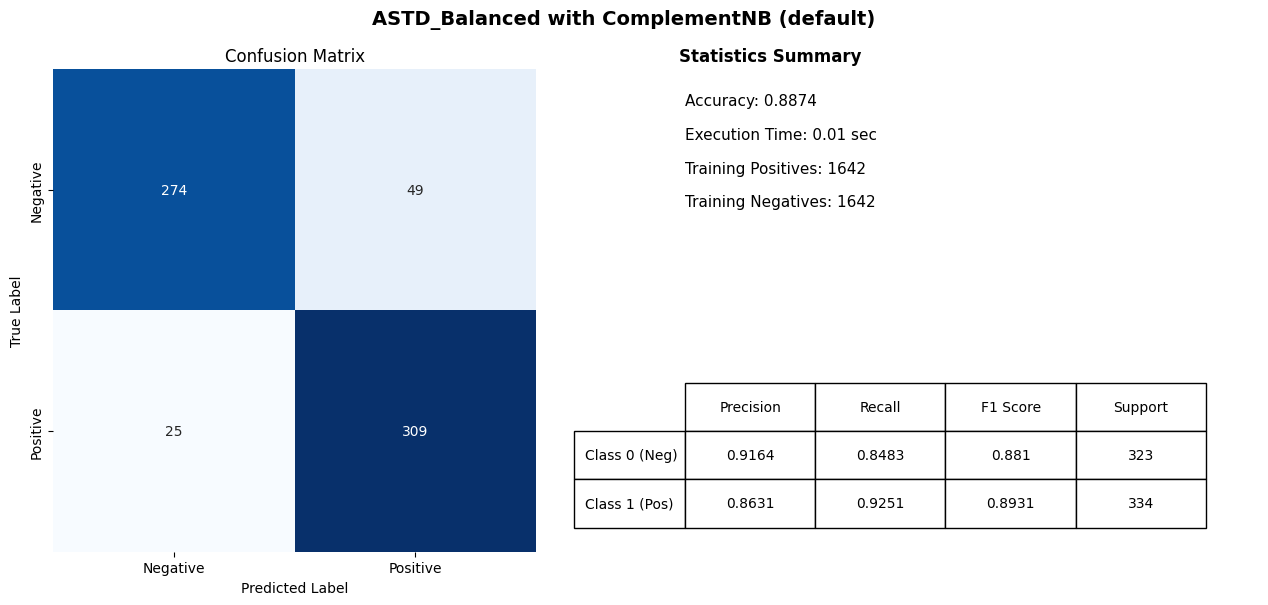


-- Running default model on ASTD_Preprocessed --


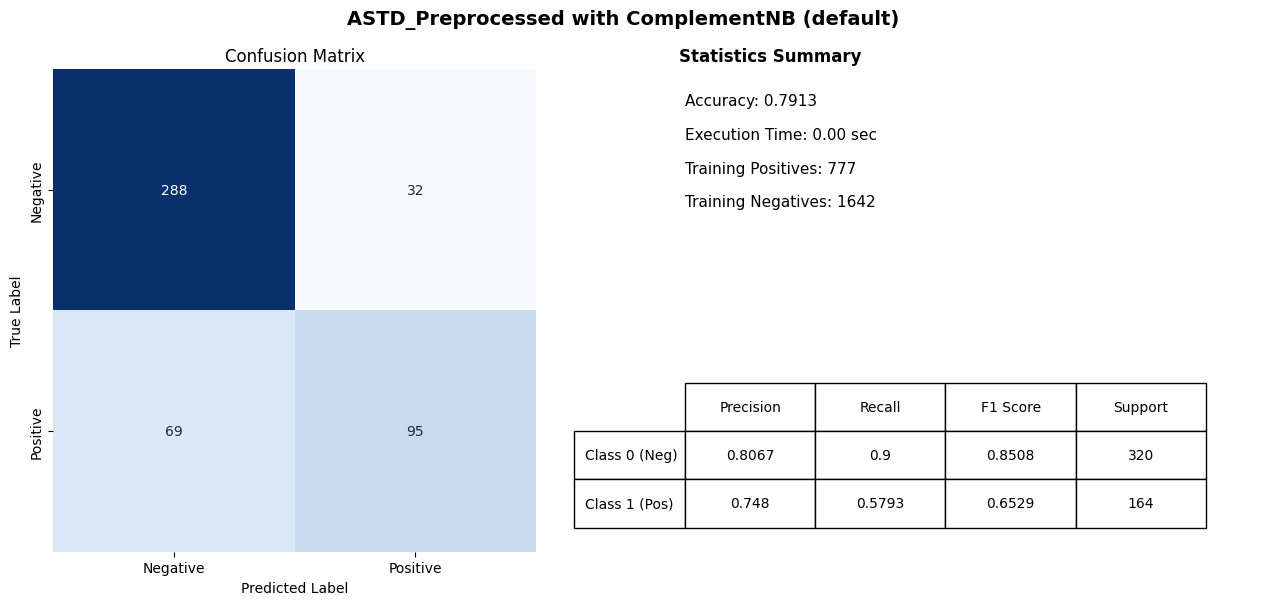


-- Running default model on ASTD_Preprocessed_Balanced --


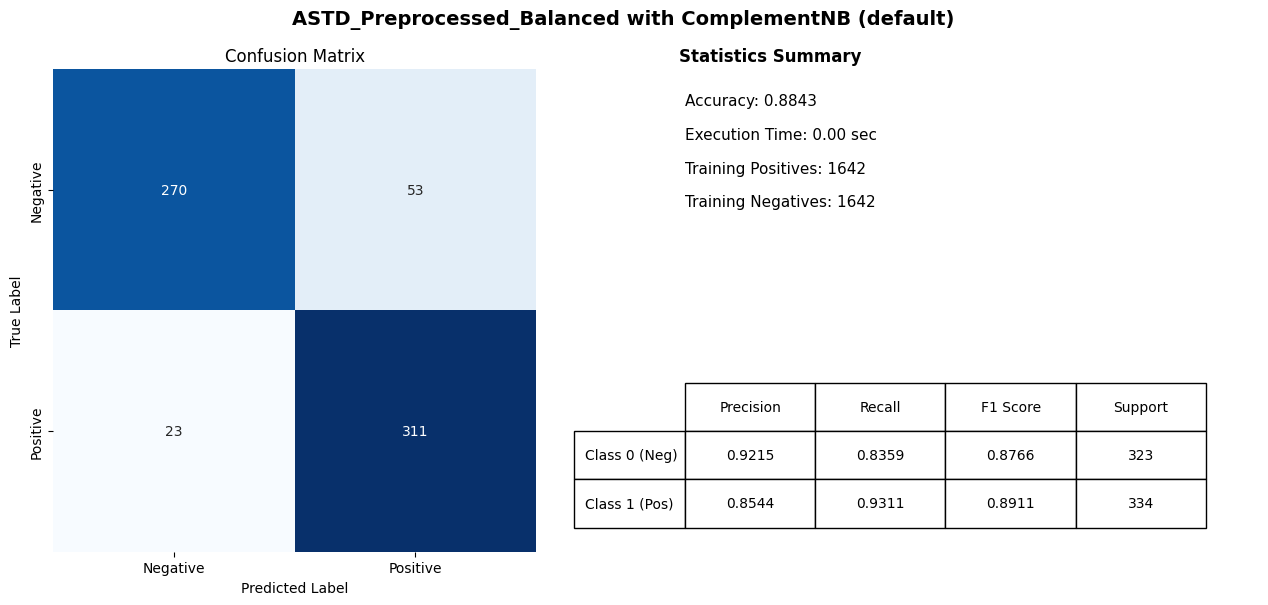


=== Step 2: Tuning alpha for ComplementNB ===


-- Tuning ASTD --



alpha: 0.0001 | F1[0]: 0.8194 | F1[1]: 0.5714 | Avg F1: 0.6954 | Time: 0.0076s
alpha: 0.01 | F1[0]: 0.8225 | F1[1]: 0.6214 | Avg F1: 0.7219 | Time: 0.0043s
alpha: 0.05 | F1[0]: 0.8323 | F1[1]: 0.6667 | Avg F1: 0.7495 | Time: 0.0028s
alpha: 0.1 | F1[0]: 0.8323 | F1[1]: 0.6667 | Avg F1: 0.7495 | Time: 0.003s
alpha: 0.5 | F1[0]: 0.8358 | F1[1]: 0.6084 | Avg F1: 0.7221 | Time: 0.0026s
alpha: 1.0 | F1[0]: 0.8282 | F1[1]: 0.5271 | Avg F1: 0.6777 | Time: 0.0025s
alpha: 2.0 | F1[0]: 0.8176 | F1[1]: 0.4435 | Avg F1: 0.6305 | Time: 0.0025s
alpha: 5.0 | F1[0]: 0.8177 | F1[1]: 0.3874 | Avg F1: 0.6025 | Time: 0.0025s
alpha: 10.0 | F1[0]: 0.816 | F1[1]: 0.367 | Avg F1: 0.5915 | Time: 0.0026s


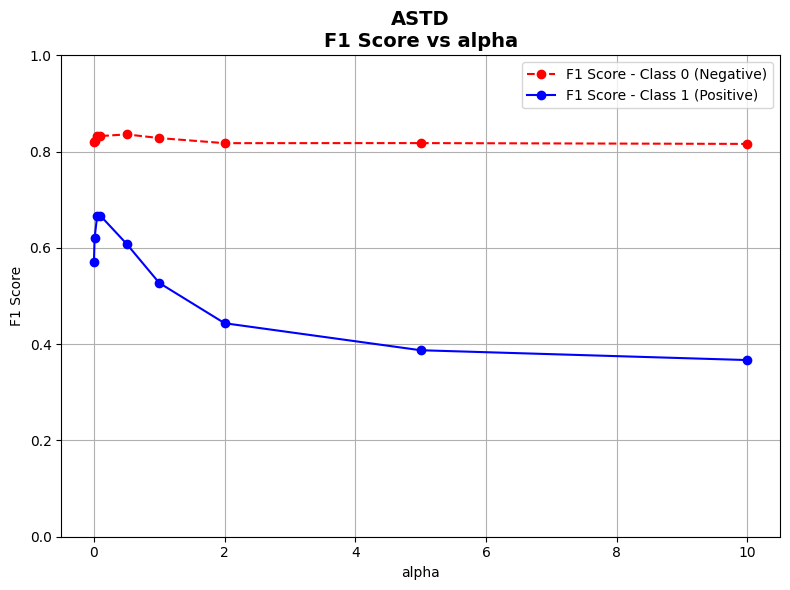


Best alpha = 0.05 with Avg F1 = 0.7495

-- Tuning ASTD_Balanced --



alpha: 0.0001 | F1[0]: 0.8862 | F1[1]: 0.8886 | Avg F1: 0.8874 | Time: 0.0059s
alpha: 0.01 | F1[0]: 0.8841 | F1[1]: 0.8876 | Avg F1: 0.8858 | Time: 0.0044s
alpha: 0.05 | F1[0]: 0.8924 | F1[1]: 0.8975 | Avg F1: 0.8949 | Time: 0.0029s
alpha: 0.1 | F1[0]: 0.8934 | F1[1]: 0.8994 | Avg F1: 0.8964 | Time: 0.0028s
alpha: 0.5 | F1[0]: 0.8824 | F1[1]: 0.8947 | Avg F1: 0.8886 | Time: 0.0032s
alpha: 1.0 | F1[0]: 0.881 | F1[1]: 0.8931 | Avg F1: 0.887 | Time: 0.0029s
alpha: 2.0 | F1[0]: 0.879 | F1[1]: 0.8892 | Avg F1: 0.8841 | Time: 0.0028s
alpha: 5.0 | F1[0]: 0.8811 | F1[1]: 0.8902 | Avg F1: 0.8857 | Time: 0.0027s
alpha: 10.0 | F1[0]: 0.8662 | F1[1]: 0.8776 | Avg F1: 0.8719 | Time: 0.0027s


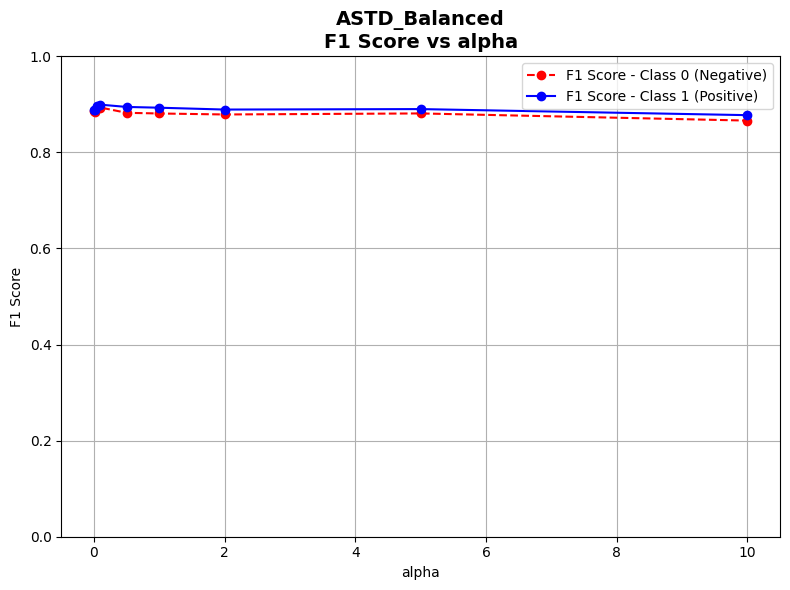


Best alpha = 0.1 with Avg F1 = 0.8964

-- Tuning ASTD_Preprocessed --



alpha: 0.0001 | F1[0]: 0.8042 | F1[1]: 0.551 | Avg F1: 0.6776 | Time: 0.0043s
alpha: 0.01 | F1[0]: 0.8104 | F1[1]: 0.6051 | Avg F1: 0.7077 | Time: 0.0037s
alpha: 0.05 | F1[0]: 0.8188 | F1[1]: 0.6463 | Avg F1: 0.7325 | Time: 0.0023s
alpha: 0.1 | F1[0]: 0.8302 | F1[1]: 0.6747 | Avg F1: 0.7524 | Time: 0.0025s
alpha: 0.5 | F1[0]: 0.8437 | F1[1]: 0.6667 | Avg F1: 0.7552 | Time: 0.0021s
alpha: 1.0 | F1[0]: 0.8508 | F1[1]: 0.6529 | Avg F1: 0.7519 | Time: 0.0021s
alpha: 2.0 | F1[0]: 0.8366 | F1[1]: 0.5504 | Avg F1: 0.6935 | Time: 0.0021s
alpha: 5.0 | F1[0]: 0.8208 | F1[1]: 0.4473 | Avg F1: 0.634 | Time: 0.0021s
alpha: 10.0 | F1[0]: 0.8193 | F1[1]: 0.3891 | Avg F1: 0.6042 | Time: 0.0021s


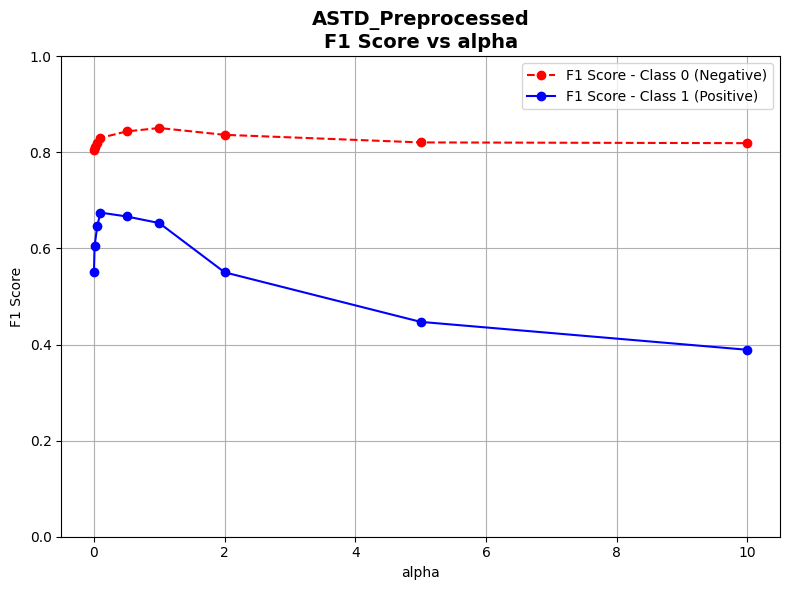


Best alpha = 0.5 with Avg F1 = 0.7552

-- Tuning ASTD_Preprocessed_Balanced --



alpha: 0.0001 | F1[0]: 0.8827 | F1[1]: 0.8859 | Avg F1: 0.8843 | Time: 0.0044s
alpha: 0.01 | F1[0]: 0.8858 | F1[1]: 0.8889 | Avg F1: 0.8873 | Time: 0.0051s
alpha: 0.05 | F1[0]: 0.8802 | F1[1]: 0.8852 | Avg F1: 0.8827 | Time: 0.0028s
alpha: 0.1 | F1[0]: 0.884 | F1[1]: 0.8905 | Avg F1: 0.8873 | Time: 0.0026s
alpha: 0.5 | F1[0]: 0.8821 | F1[1]: 0.895 | Avg F1: 0.8885 | Time: 0.0025s
alpha: 1.0 | F1[0]: 0.8766 | F1[1]: 0.8911 | Avg F1: 0.8839 | Time: 0.0026s
alpha: 2.0 | F1[0]: 0.8608 | F1[1]: 0.8764 | Avg F1: 0.8686 | Time: 0.0028s
alpha: 5.0 | F1[0]: 0.8447 | F1[1]: 0.8621 | Avg F1: 0.8534 | Time: 0.0027s
alpha: 10.0 | F1[0]: 0.8387 | F1[1]: 0.8559 | Avg F1: 0.8473 | Time: 0.0042s


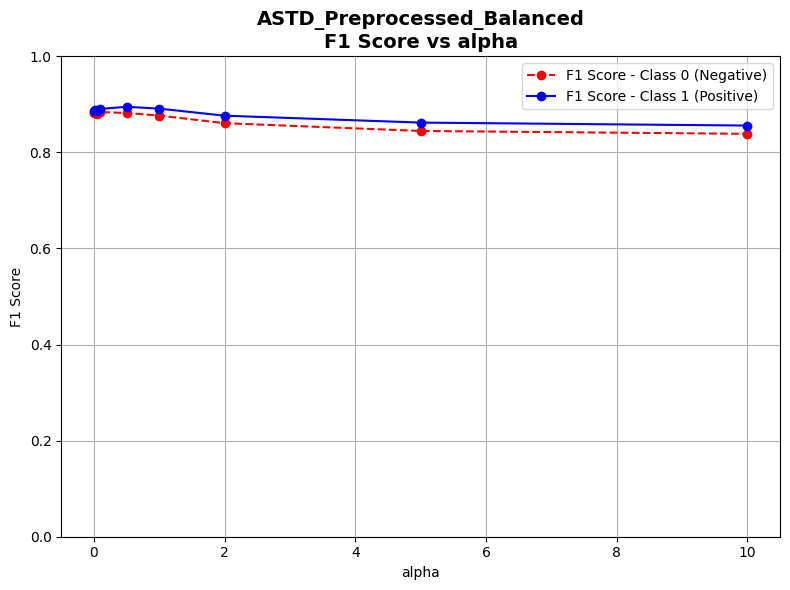


Best alpha = 0.5 with Avg F1 = 0.8885

=== Step 3: ComplementNB with BEST alpha ===


-- ASTD with best alpha = 0.05 --


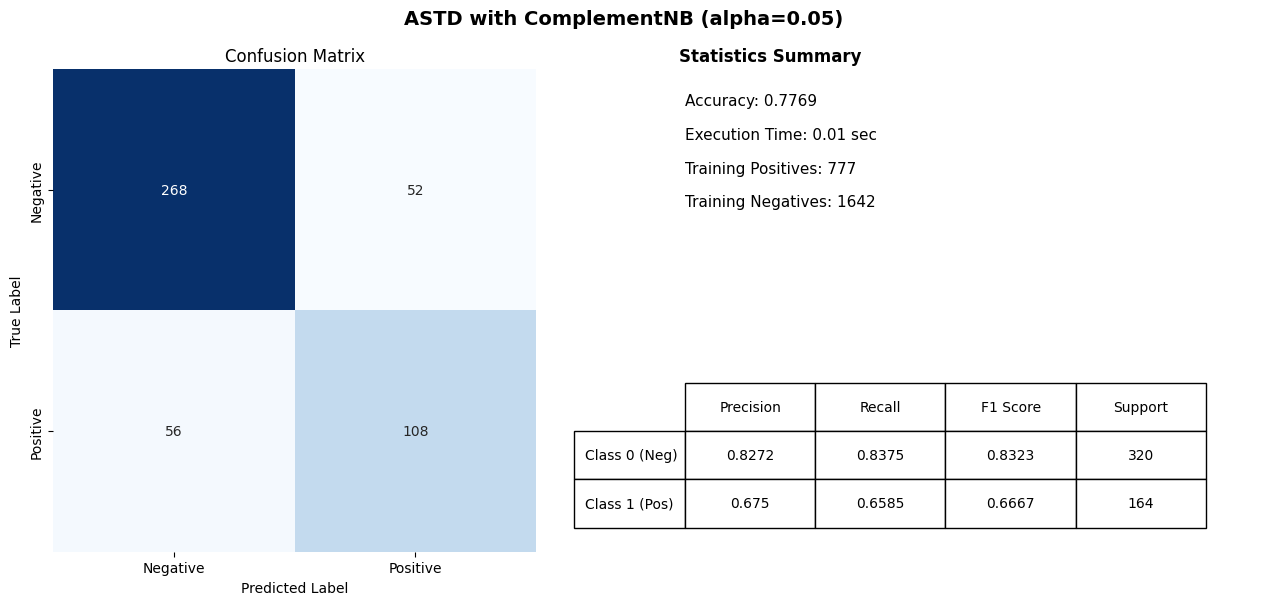


-- ASTD_Balanced with best alpha = 0.1 --


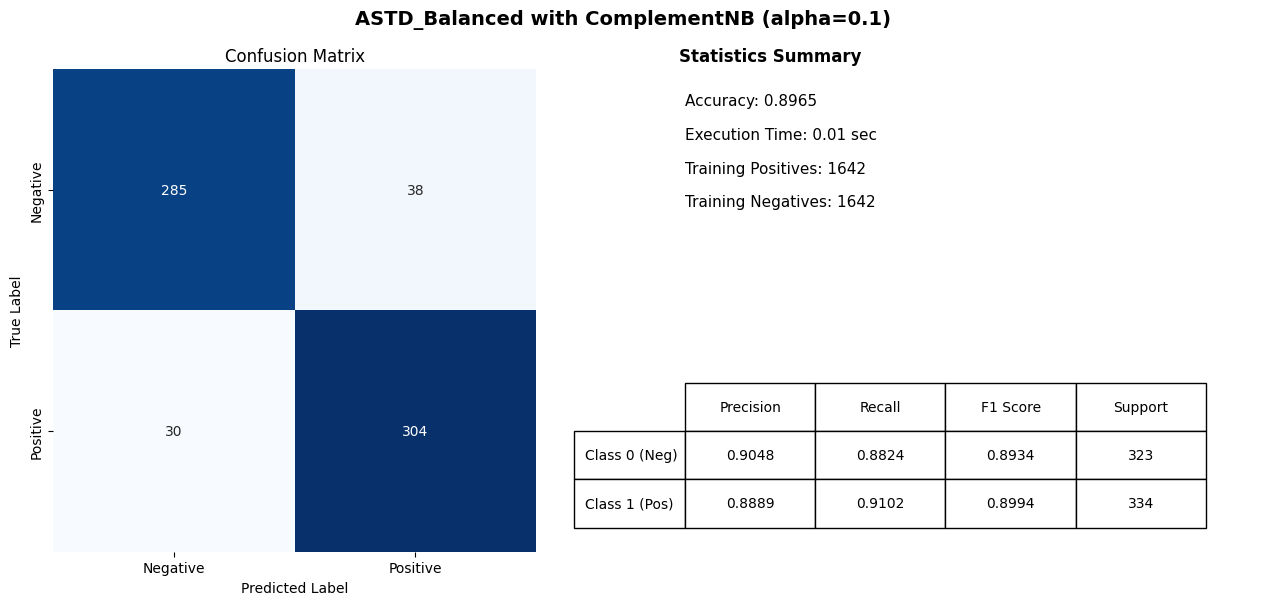


-- ASTD_Preprocessed with best alpha = 0.5 --


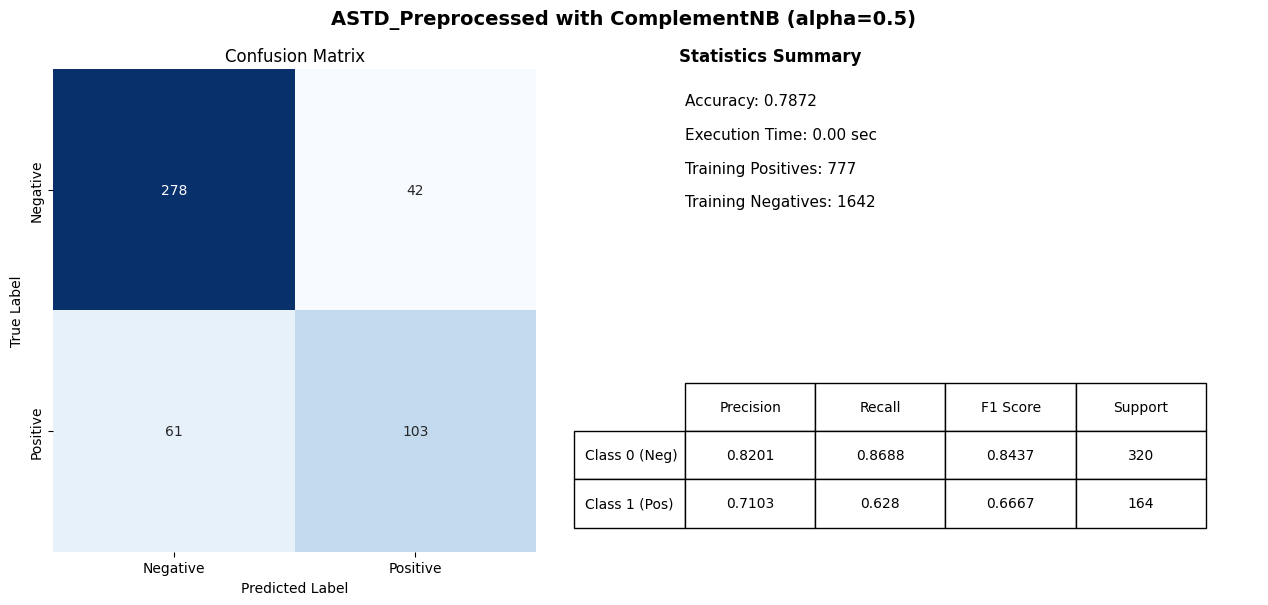


-- ASTD_Preprocessed_Balanced with best alpha = 0.5 --


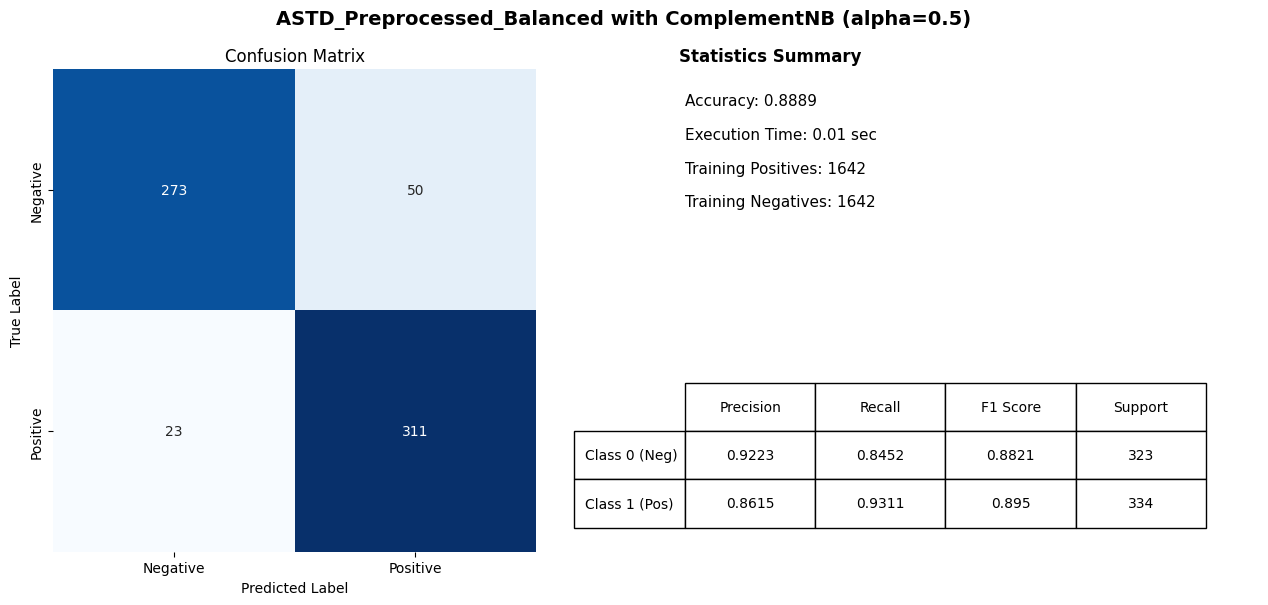

Results saved to 'ComplementNB_Results.csv'


In [72]:
from sklearn.naive_bayes import ComplementNB

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_CNB_results = []

# === Step 1: Run ComplementNB with default alpha
print("\n=== Step 1: ComplementNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name="ComplementNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for ComplementNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: ComplementNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name=f"ComplementNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_CNB_results)

# Save to individual CSV
results_df.to_csv("ComplementNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'ComplementNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (Linear)**


=== Step 1: LinearSVC with DEFAULT parameters ===


-- Running default model on ASTD --


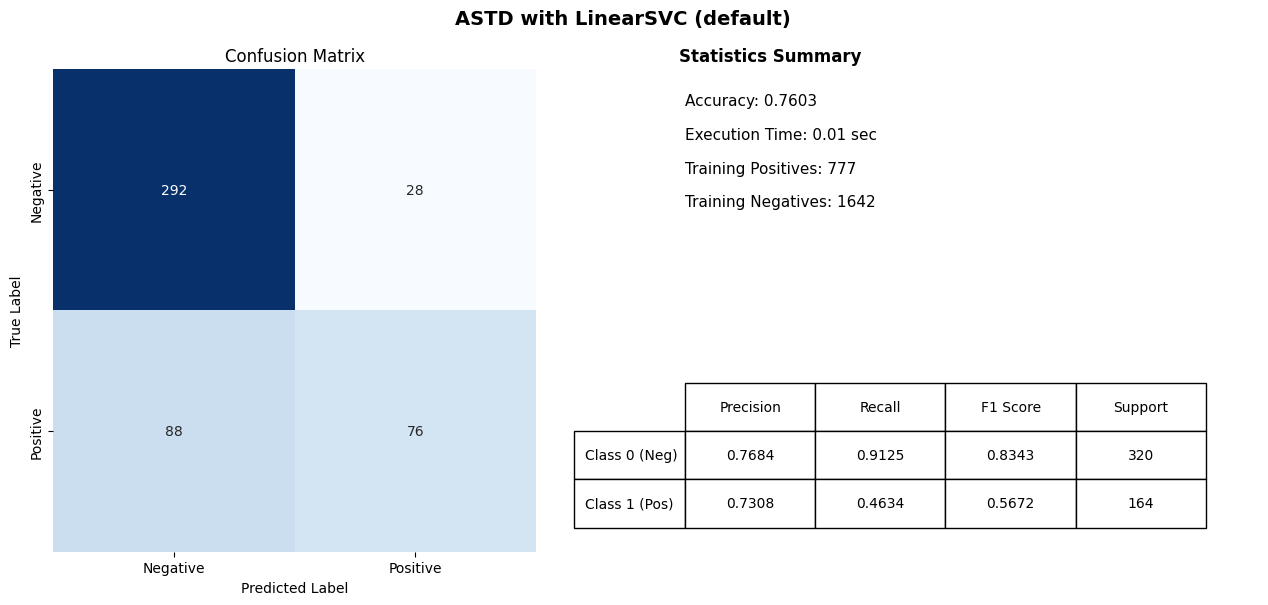


-- Running default model on ASTD_Balanced --


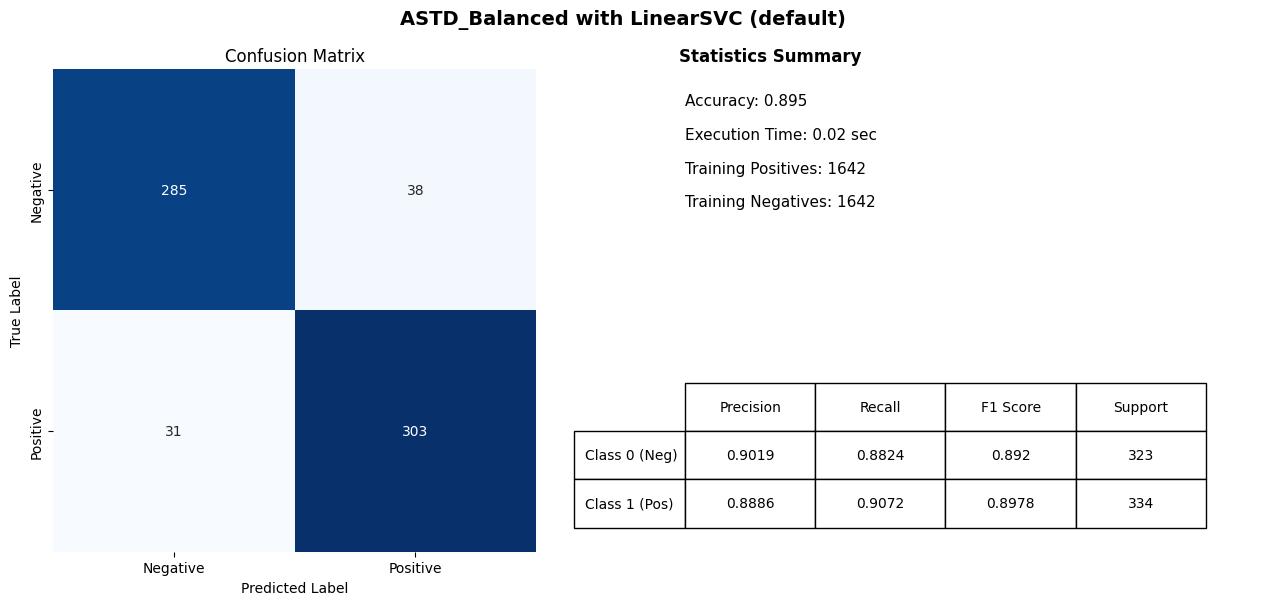


-- Running default model on ASTD_Preprocessed --


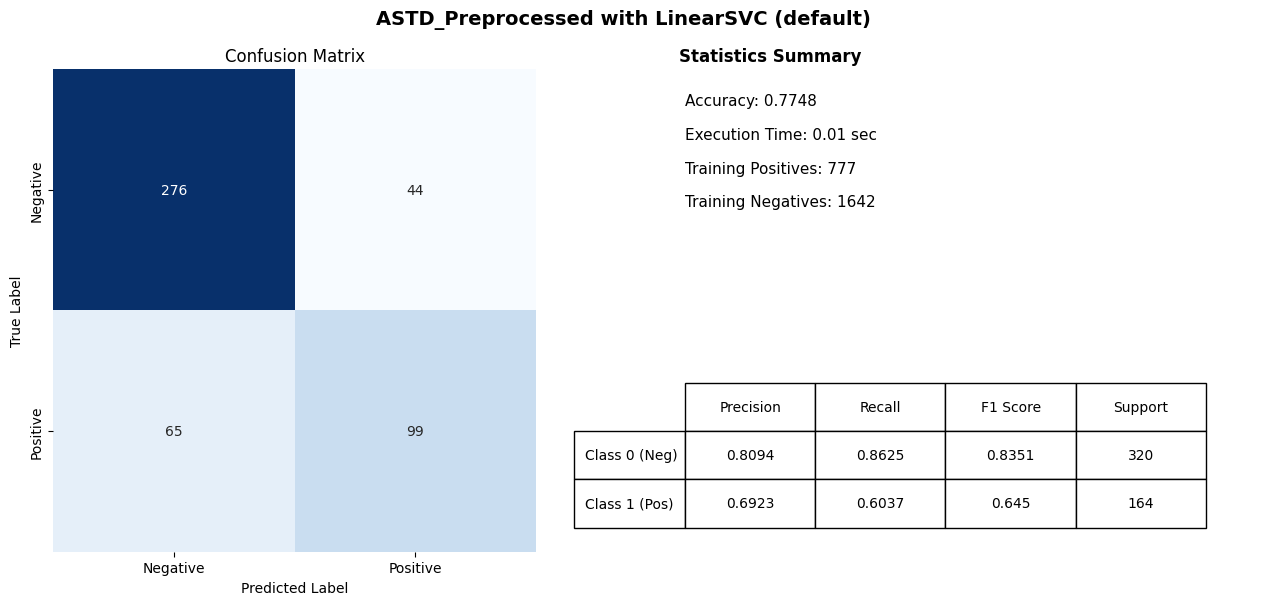


-- Running default model on ASTD_Preprocessed_Balanced --


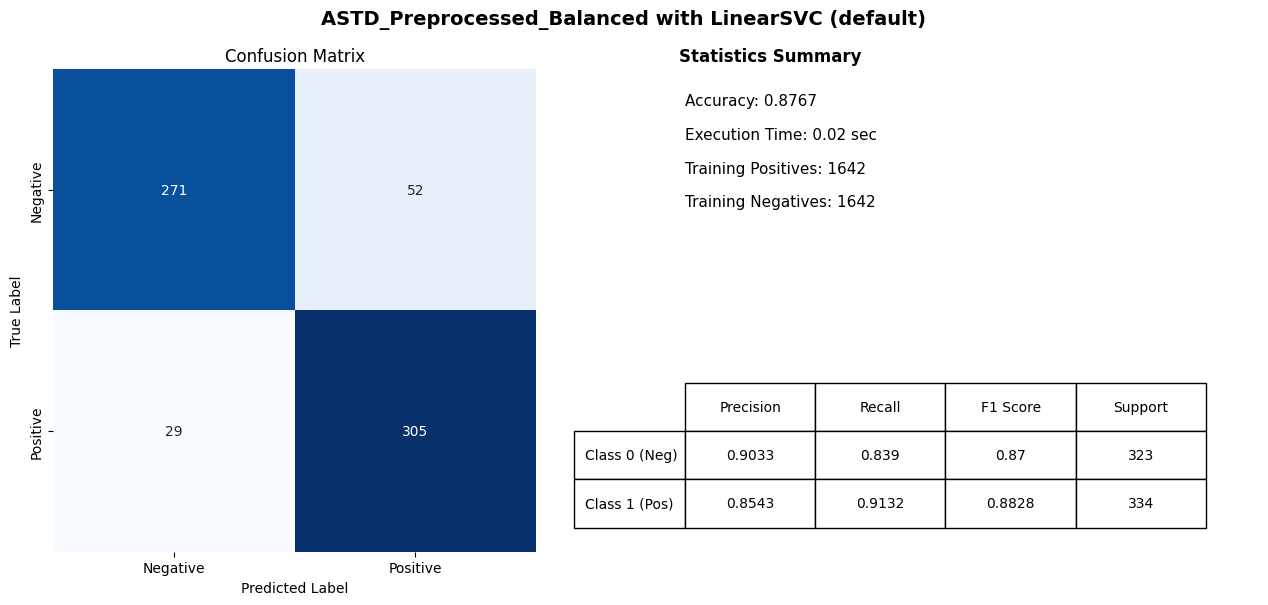


=== Step 2: Tuning C for LinearSVC ===


-- Tuning ASTD --



C: 0.001 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0058s
C: 0.01 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0053s
C: 0.1 | F1[0]: 0.8149 | F1[1]: 0.2421 | Avg F1: 0.5285 | Time: 0.0035s
C: 0.5 | F1[0]: 0.8247 | F1[1]: 0.5098 | Avg F1: 0.6672 | Time: 0.0053s
C: 1.0 | F1[0]: 0.8343 | F1[1]: 0.5672 | Avg F1: 0.7007 | Time: 0.0077s
C: 2.0 | F1[0]: 0.8348 | F1[1]: 0.5899 | Avg F1: 0.7124 | Time: 0.0177s
C: 5.0 | F1[0]: 0.838 | F1[1]: 0.6078 | Avg F1: 0.7229 | Time: 0.0284s
C: 10.0 | F1[0]: 0.8358 | F1[1]: 0.6084 | Avg F1: 0.7221 | Time: 0.0493s


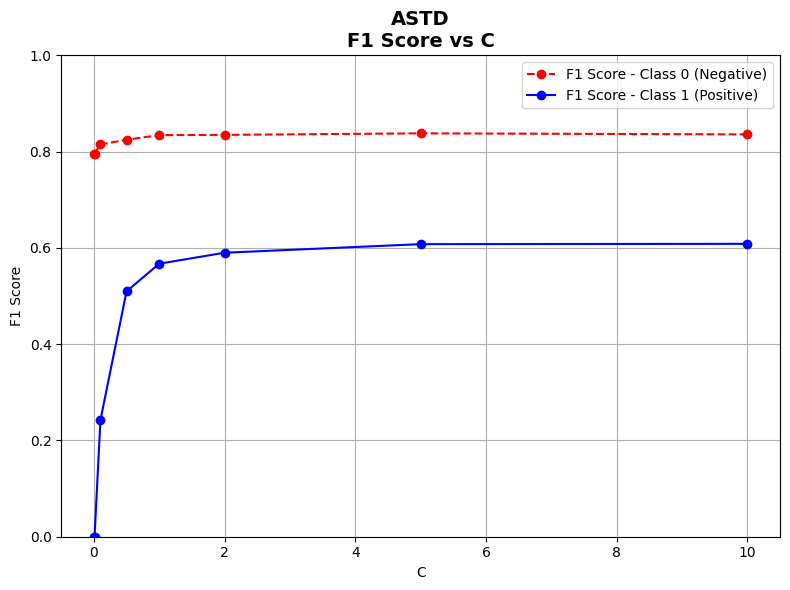


Best C = 5.0 with Avg F1 = 0.7229

-- Tuning ASTD_Balanced --



C: 0.001 | F1[0]: 0.7728 | F1[1]: 0.6349 | Avg F1: 0.7039 | Time: 0.0062s
C: 0.01 | F1[0]: 0.8605 | F1[1]: 0.8499 | Avg F1: 0.8552 | Time: 0.0054s
C: 0.1 | F1[0]: 0.8899 | F1[1]: 0.8909 | Avg F1: 0.8904 | Time: 0.0044s
C: 0.5 | F1[0]: 0.892 | F1[1]: 0.8978 | Avg F1: 0.8949 | Time: 0.0074s
C: 1.0 | F1[0]: 0.892 | F1[1]: 0.8978 | Avg F1: 0.8949 | Time: 0.012s
C: 2.0 | F1[0]: 0.8851 | F1[1]: 0.8896 | Avg F1: 0.8873 | Time: 0.0192s
C: 5.0 | F1[0]: 0.8875 | F1[1]: 0.8932 | Avg F1: 0.8903 | Time: 0.0377s
C: 10.0 | F1[0]: 0.8858 | F1[1]: 0.8919 | Avg F1: 0.8888 | Time: 0.0688s


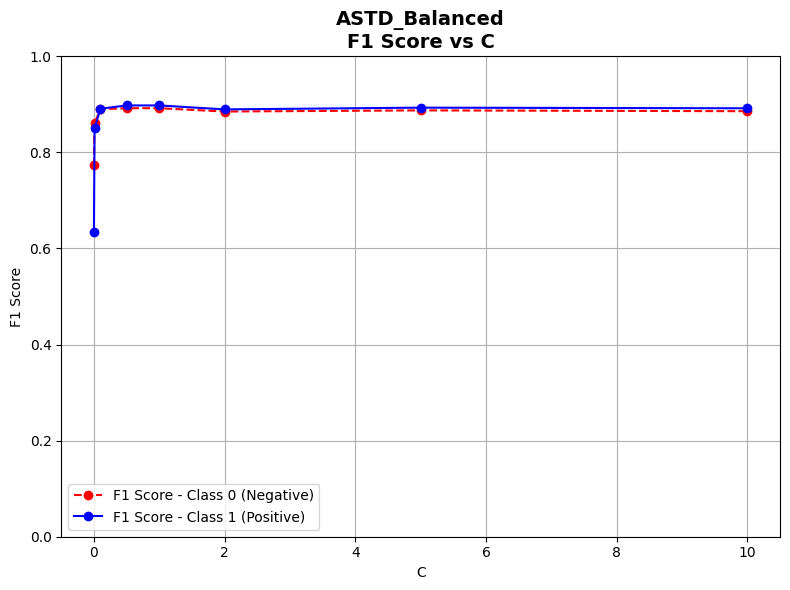


Best C = 0.5 with Avg F1 = 0.8949

-- Tuning ASTD_Preprocessed --



C: 0.001 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0059s
C: 0.01 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0038s
C: 0.1 | F1[0]: 0.8338 | F1[1]: 0.4414 | Avg F1: 0.6376 | Time: 0.0035s
C: 0.5 | F1[0]: 0.8449 | F1[1]: 0.6392 | Avg F1: 0.742 | Time: 0.005s
C: 1.0 | F1[0]: 0.8351 | F1[1]: 0.645 | Avg F1: 0.74 | Time: 0.007s
C: 2.0 | F1[0]: 0.8223 | F1[1]: 0.6417 | Avg F1: 0.732 | Time: 0.0102s
C: 5.0 | F1[0]: 0.823 | F1[1]: 0.6481 | Avg F1: 0.7356 | Time: 0.0205s
C: 10.0 | F1[0]: 0.8163 | F1[1]: 0.6465 | Avg F1: 0.7314 | Time: 0.0367s


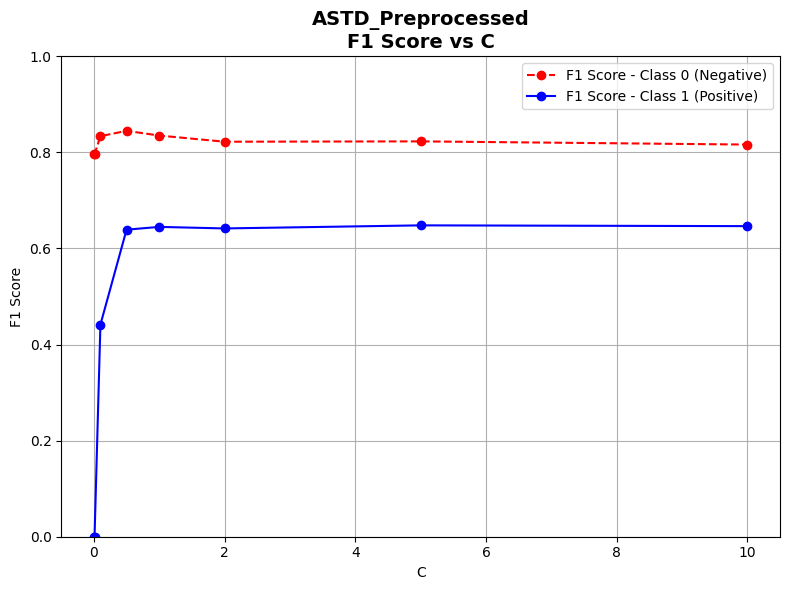


Best C = 0.5 with Avg F1 = 0.742

-- Tuning ASTD_Preprocessed_Balanced --



C: 0.001 | F1[0]: 0.8147 | F1[1]: 0.7655 | Avg F1: 0.7901 | Time: 0.0058s
C: 0.01 | F1[0]: 0.843 | F1[1]: 0.8372 | Avg F1: 0.8401 | Time: 0.0072s
C: 0.1 | F1[0]: 0.8634 | F1[1]: 0.8687 | Avg F1: 0.866 | Time: 0.0073s
C: 0.5 | F1[0]: 0.8766 | F1[1]: 0.8856 | Avg F1: 0.8811 | Time: 0.0117s
C: 1.0 | F1[0]: 0.87 | F1[1]: 0.8828 | Avg F1: 0.8764 | Time: 0.0136s
C: 2.0 | F1[0]: 0.859 | F1[1]: 0.8725 | Avg F1: 0.8657 | Time: 0.0142s
C: 5.0 | F1[0]: 0.8457 | F1[1]: 0.8613 | Avg F1: 0.8535 | Time: 0.0284s
C: 10.0 | F1[0]: 0.8401 | F1[1]: 0.8576 | Avg F1: 0.8488 | Time: 0.0525s


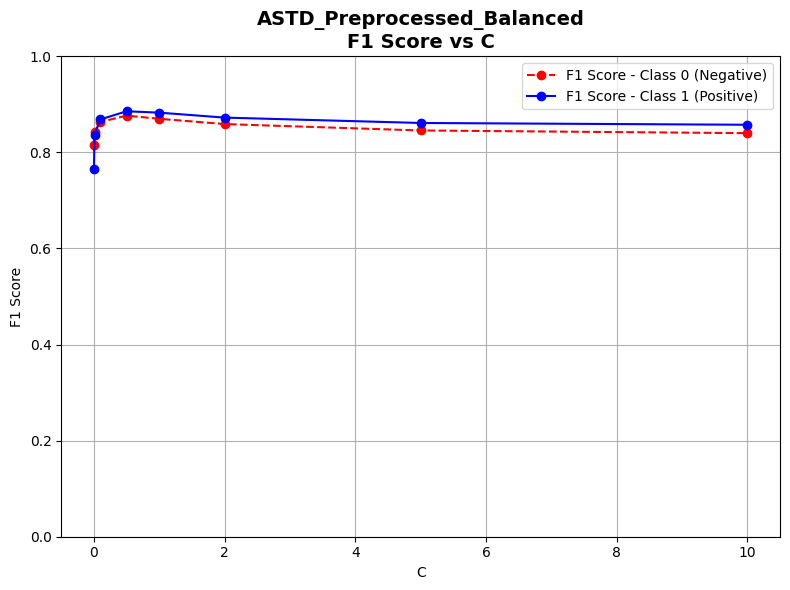


Best C = 0.5 with Avg F1 = 0.8811

=== Step 3: LinearSVC with BEST C ===


-- ASTD with best C = 5.0 --


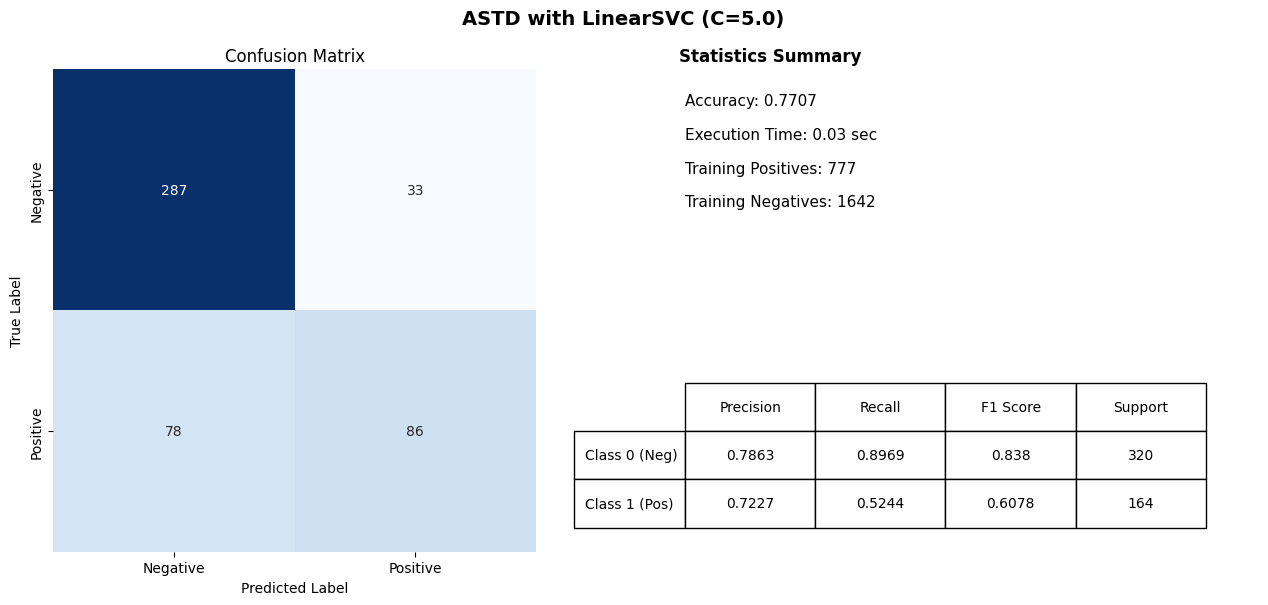


-- ASTD_Balanced with best C = 0.5 --


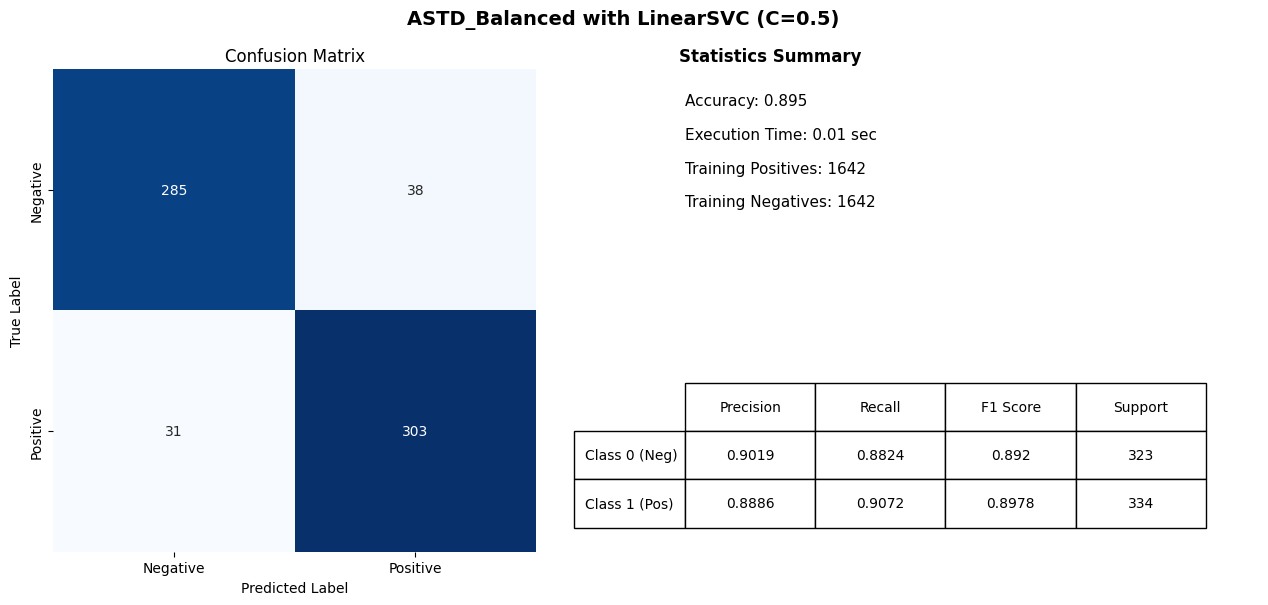


-- ASTD_Preprocessed with best C = 0.5 --


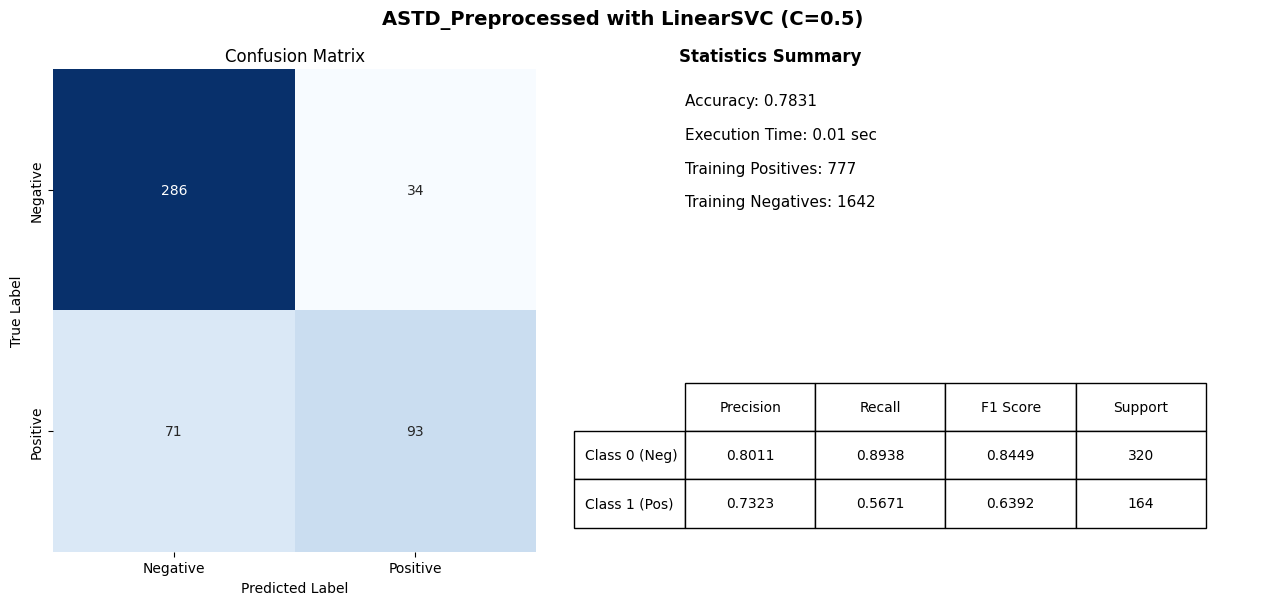


-- ASTD_Preprocessed_Balanced with best C = 0.5 --


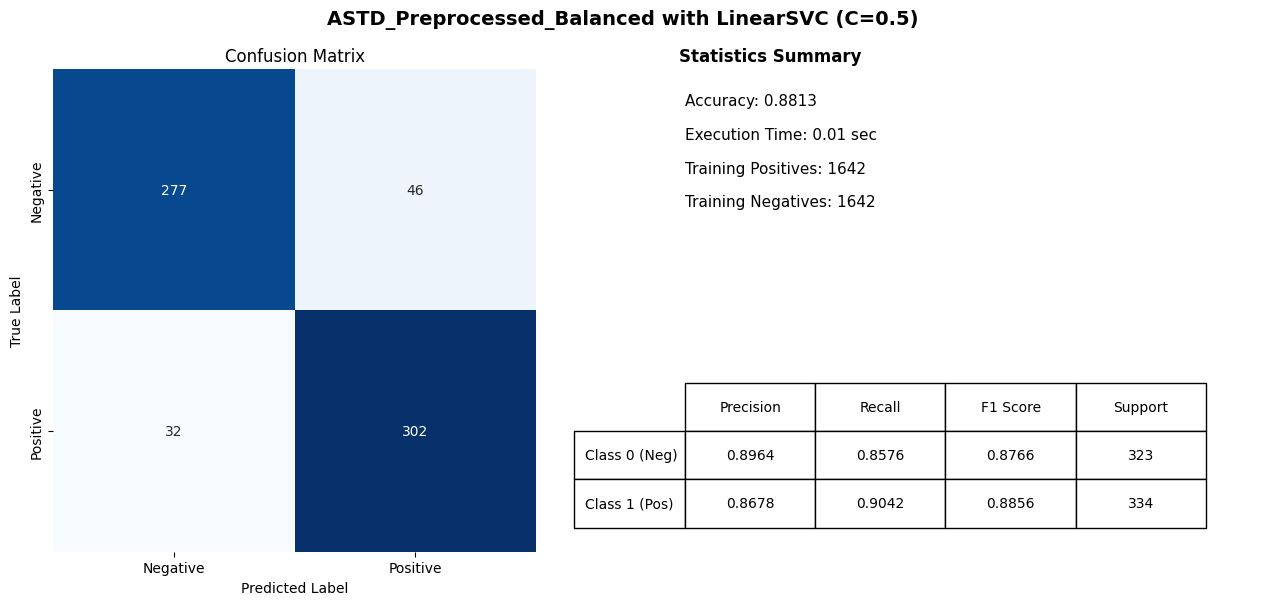

Results saved to 'LinearSVC_Results.csv'


In [73]:
from sklearn.svm import LinearSVC

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LinearSVC_results = []

# === Step 1: LinearSVC with default C
print("\n=== Step 1: LinearSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name="LinearSVC (default)",
        dataset_name=label
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LinearSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LinearSVC with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name=f"LinearSVC (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C}
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LinearSVC_results)
results_df.to_csv("LinearSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LinearSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (NuSVC)**


=== Step 1: NuSVC with DEFAULT parameters ===


-- Running default model on ASTD --


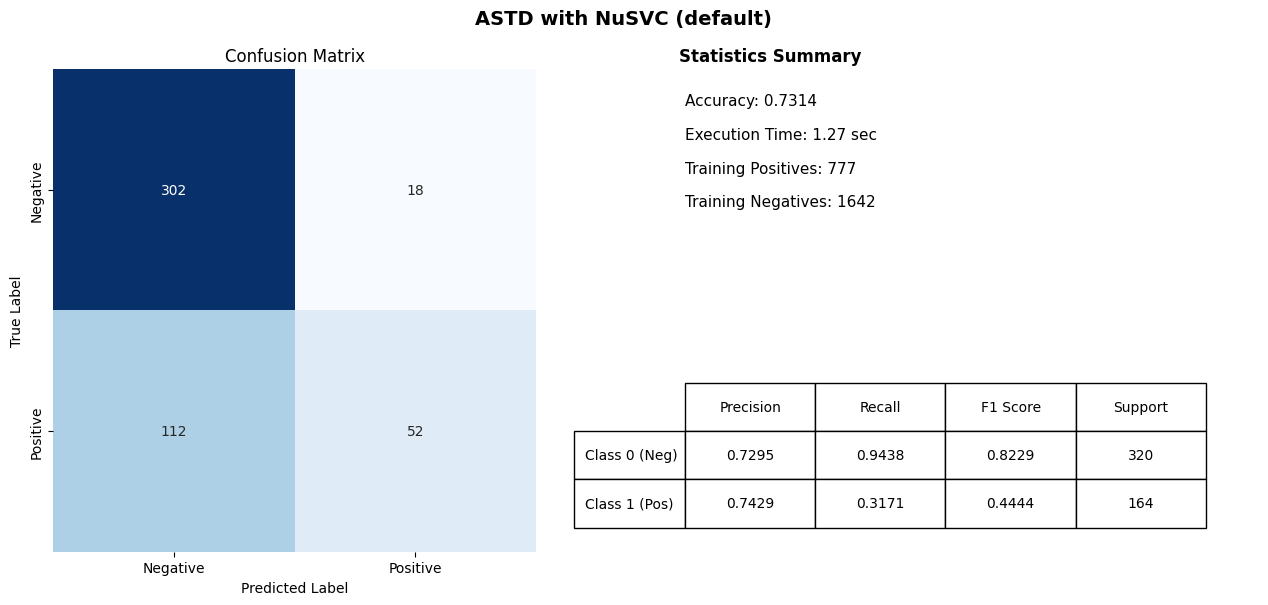


-- Running default model on ASTD_Balanced --


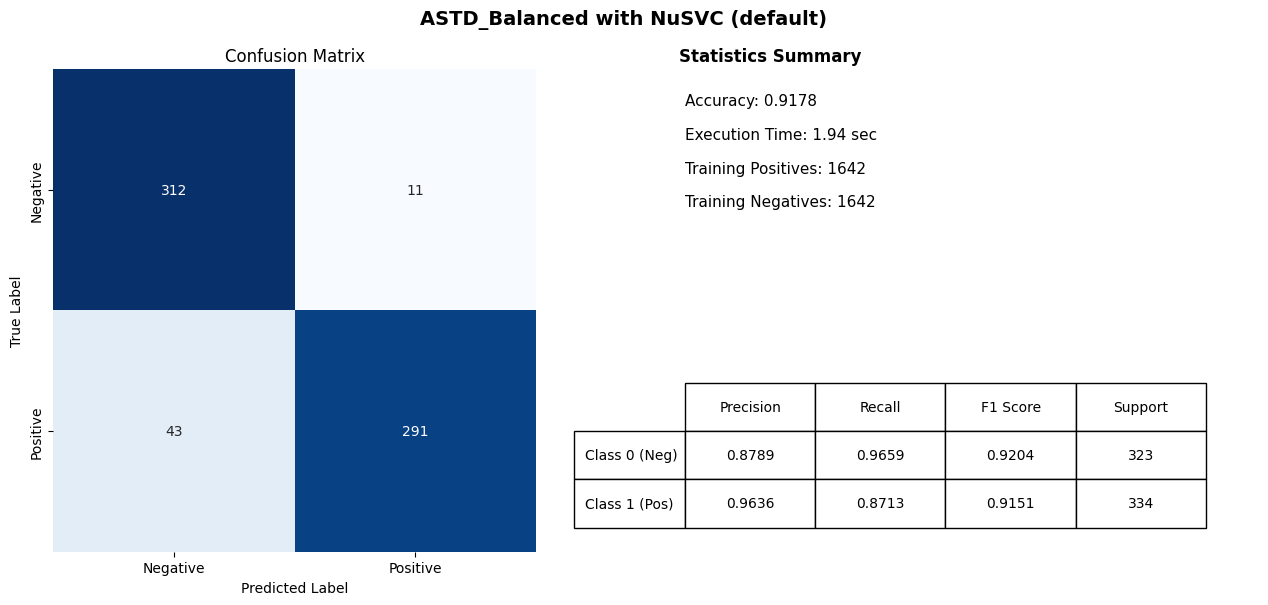


-- Running default model on ASTD_Preprocessed --


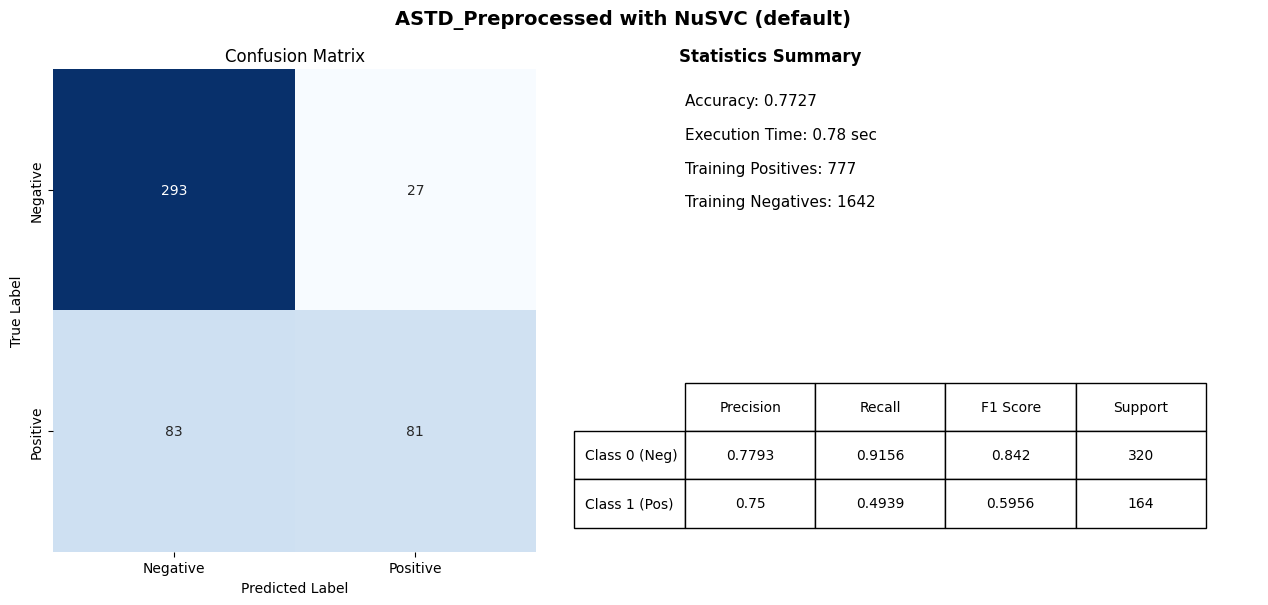


-- Running default model on ASTD_Preprocessed_Balanced --


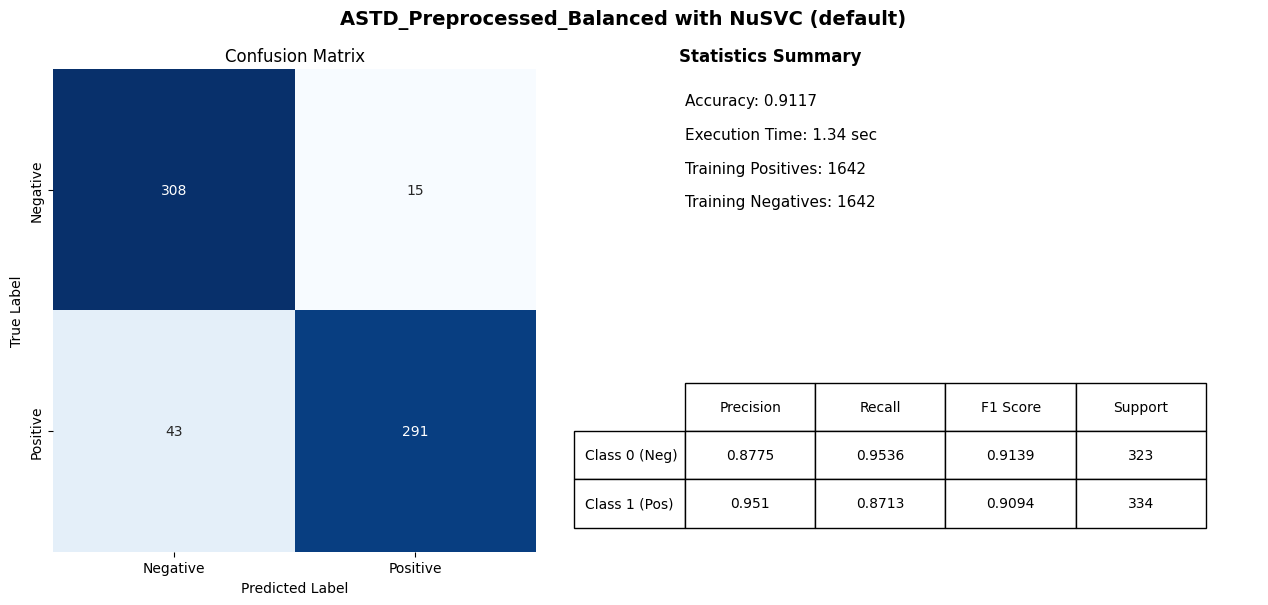


=== Step 2: Tuning nu for NuSVC ===


-- Tuning ASTD --



nu: 0.01 | F1[0]: 0.8224 | F1[1]: 0.4492 | Avg F1: 0.6358 | Time: 0.8881s
nu: 0.1 | F1[0]: 0.8229 | F1[1]: 0.4444 | Avg F1: 0.6337 | Time: 0.9097s
nu: 0.3 | F1[0]: 0.8229 | F1[1]: 0.4444 | Avg F1: 0.6337 | Time: 0.9019s
nu: 0.5 | F1[0]: 0.8229 | F1[1]: 0.4444 | Avg F1: 0.6337 | Time: 0.9077s
Skipping nu = 0.7 due to error: b'specified nu is infeasible'
Skipping nu = 0.9 due to error: b'specified nu is infeasible'


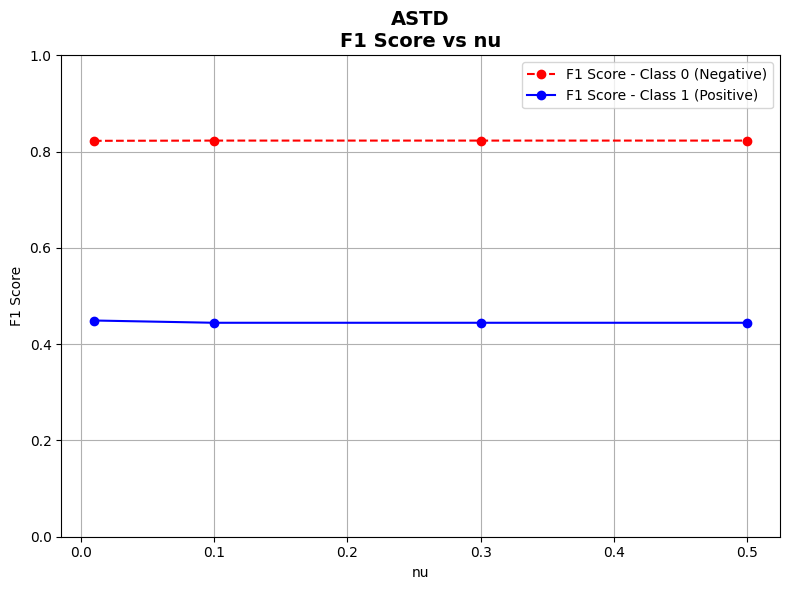


Best nu = 0.01 with Avg F1 = 0.6358

-- Tuning ASTD_Balanced --



nu: 0.01 | F1[0]: 0.9188 | F1[1]: 0.9137 | Avg F1: 0.9162 | Time: 1.2482s
nu: 0.1 | F1[0]: 0.9188 | F1[1]: 0.9137 | Avg F1: 0.9162 | Time: 1.3059s
nu: 0.3 | F1[0]: 0.9188 | F1[1]: 0.9137 | Avg F1: 0.9162 | Time: 1.9736s
nu: 0.5 | F1[0]: 0.9204 | F1[1]: 0.9151 | Avg F1: 0.9177 | Time: 1.7826s
nu: 0.7 | F1[0]: 0.9184 | F1[1]: 0.9108 | Avg F1: 0.9146 | Time: 1.6163s
nu: 0.9 | F1[0]: 0.8821 | F1[1]: 0.8567 | Avg F1: 0.8694 | Time: 1.6425s


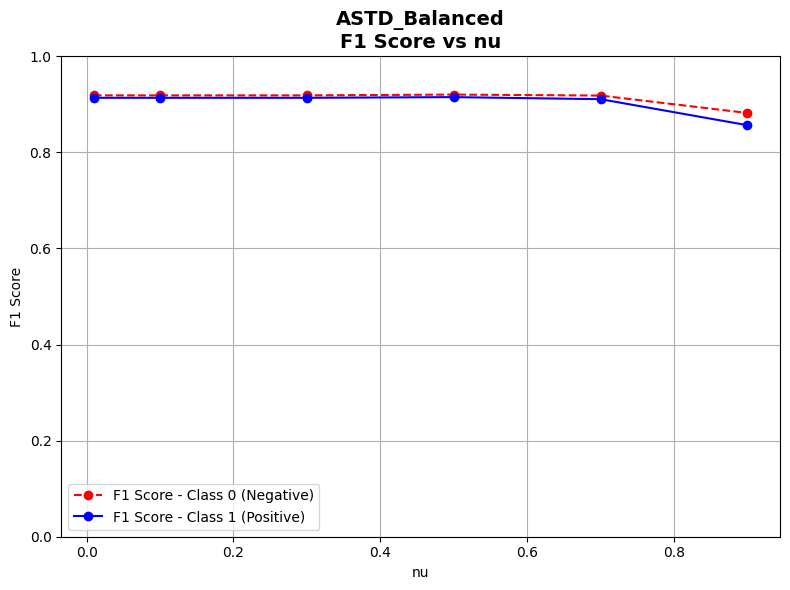


Best nu = 0.5 with Avg F1 = 0.9177

-- Tuning ASTD_Preprocessed --



nu: 0.01 | F1[0]: 0.8467 | F1[1]: 0.629 | Avg F1: 0.7378 | Time: 0.7408s
nu: 0.1 | F1[0]: 0.8455 | F1[1]: 0.6241 | Avg F1: 0.7348 | Time: 0.7659s
nu: 0.3 | F1[0]: 0.8455 | F1[1]: 0.6241 | Avg F1: 0.7348 | Time: 0.7567s
nu: 0.5 | F1[0]: 0.842 | F1[1]: 0.5956 | Avg F1: 0.7188 | Time: 0.7846s
Skipping nu = 0.7 due to error: b'specified nu is infeasible'
Skipping nu = 0.9 due to error: b'specified nu is infeasible'


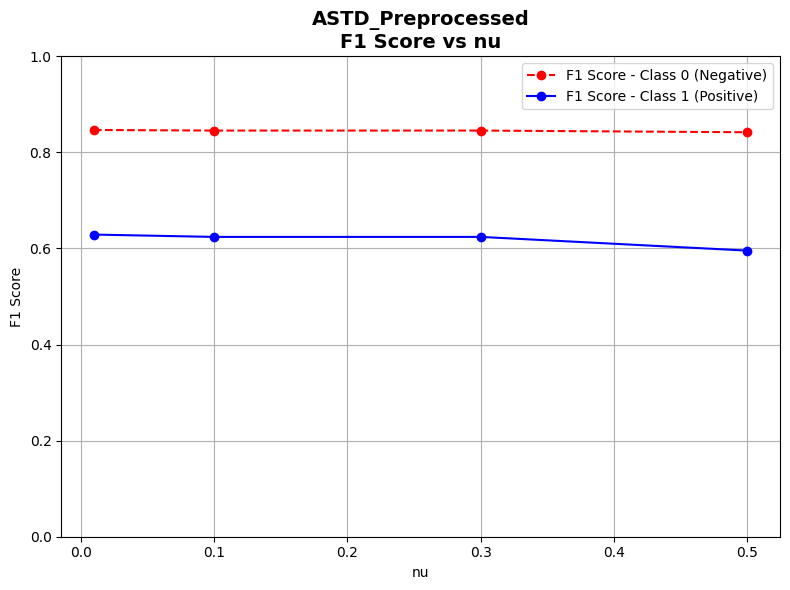


Best nu = 0.01 with Avg F1 = 0.7378

-- Tuning ASTD_Preprocessed_Balanced --



nu: 0.01 | F1[0]: 0.9072 | F1[1]: 0.904 | Avg F1: 0.9056 | Time: 1.062s
nu: 0.1 | F1[0]: 0.9072 | F1[1]: 0.904 | Avg F1: 0.9056 | Time: 1.1266s
nu: 0.3 | F1[0]: 0.9072 | F1[1]: 0.904 | Avg F1: 0.9056 | Time: 1.6431s
nu: 0.5 | F1[0]: 0.9139 | F1[1]: 0.9094 | Avg F1: 0.9117 | Time: 1.7874s
nu: 0.7 | F1[0]: 0.9064 | F1[1]: 0.8984 | Avg F1: 0.9024 | Time: 1.3732s
nu: 0.9 | F1[0]: 0.8937 | F1[1]: 0.8803 | Avg F1: 0.887 | Time: 1.3838s


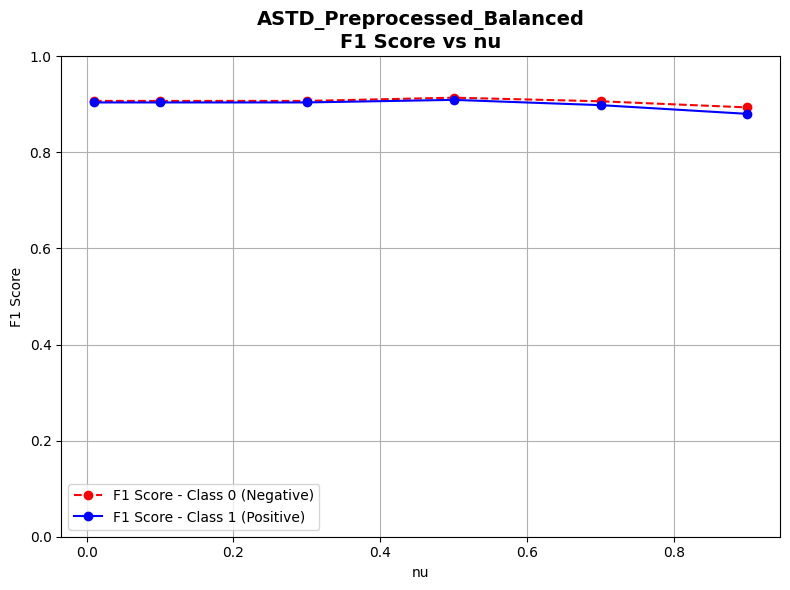


Best nu = 0.5 with Avg F1 = 0.9117

=== Step 3: NuSVC with BEST nu ===


-- ASTD with best nu = 0.01 --


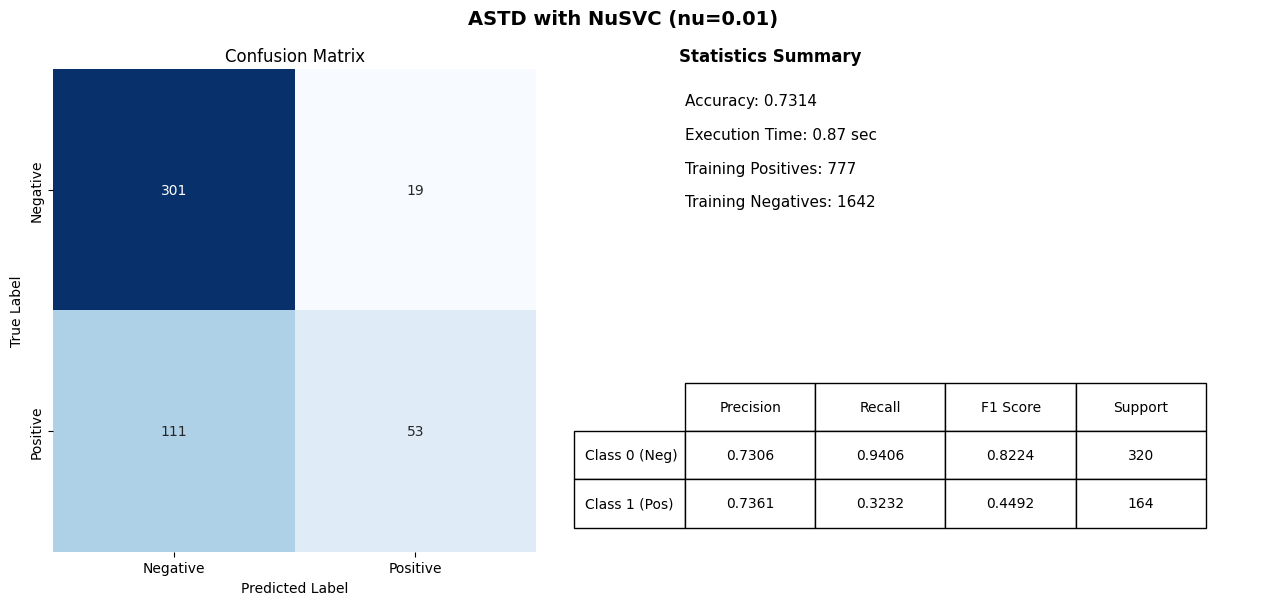


-- ASTD_Balanced with best nu = 0.5 --


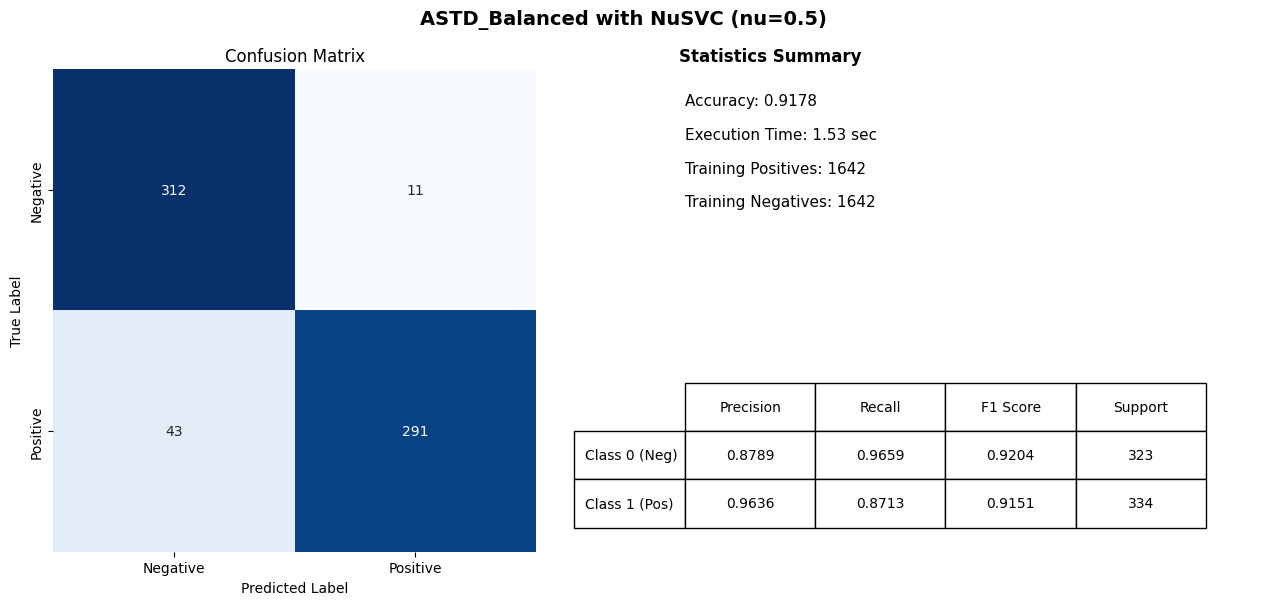


-- ASTD_Preprocessed with best nu = 0.01 --


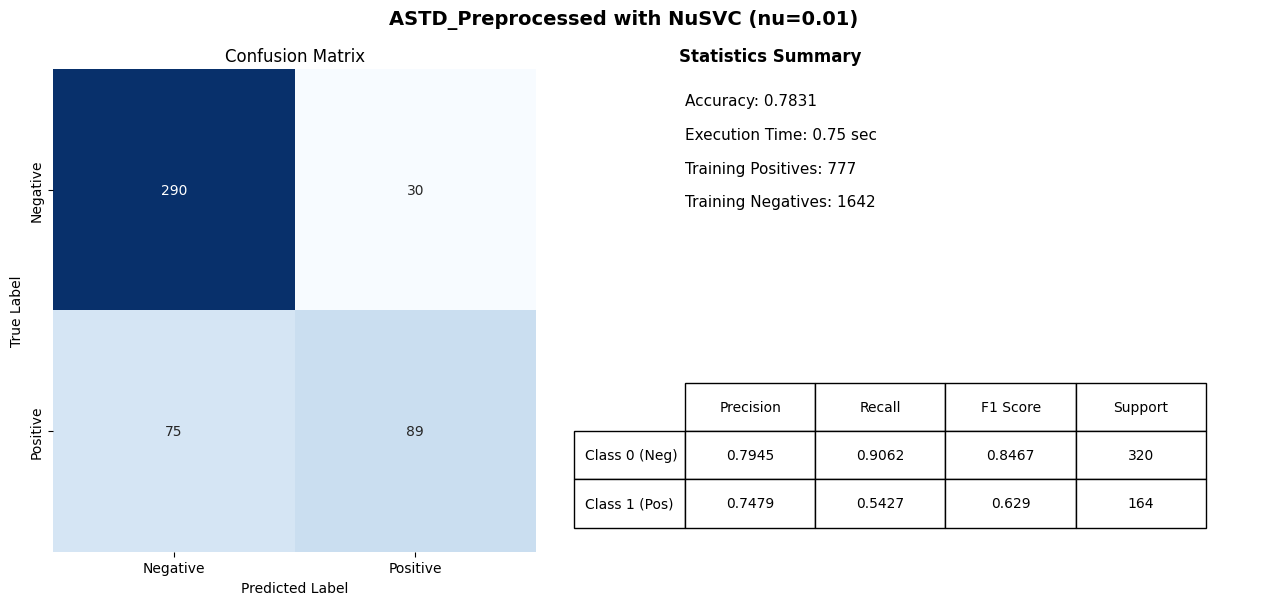


-- ASTD_Preprocessed_Balanced with best nu = 0.5 --


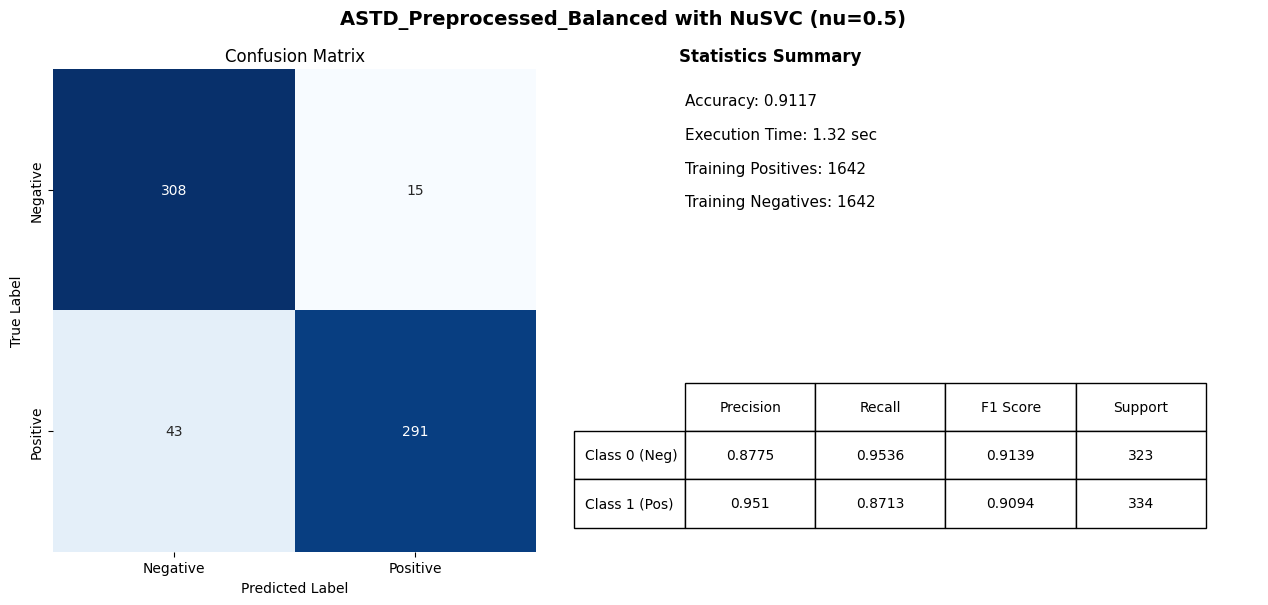

Results saved to 'NuSVC_Results.csv'


In [74]:
from sklearn.svm import NuSVC

param_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
best_params = {}
all_NuSVC_results = []

# === Step 1: NuSVC with default Nu
print("\n=== Step 1: NuSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name="NuSVC (default)",
        dataset_name=label,
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Step 2: Hyperparameter tuning (nu)
print("\n=== Step 2: Tuning nu for NuSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_nu = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        param_name="nu",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_nu

# === Step 3: Evaluate with best nu
print("\n=== Step 3: NuSVC with BEST nu ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_nu = best_params[label]
    print(f"\n-- {label} with best nu = {best_nu} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name=f"NuSVC (nu={best_nu})",
        dataset_name=label,
        model_params={"nu": best_nu}
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_NuSVC_results)
results_df.to_csv("NuSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'NuSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **LogisticRegression**


=== Step 1: LogisticRegression with DEFAULT parameters ===


-- Running default model on ASTD --


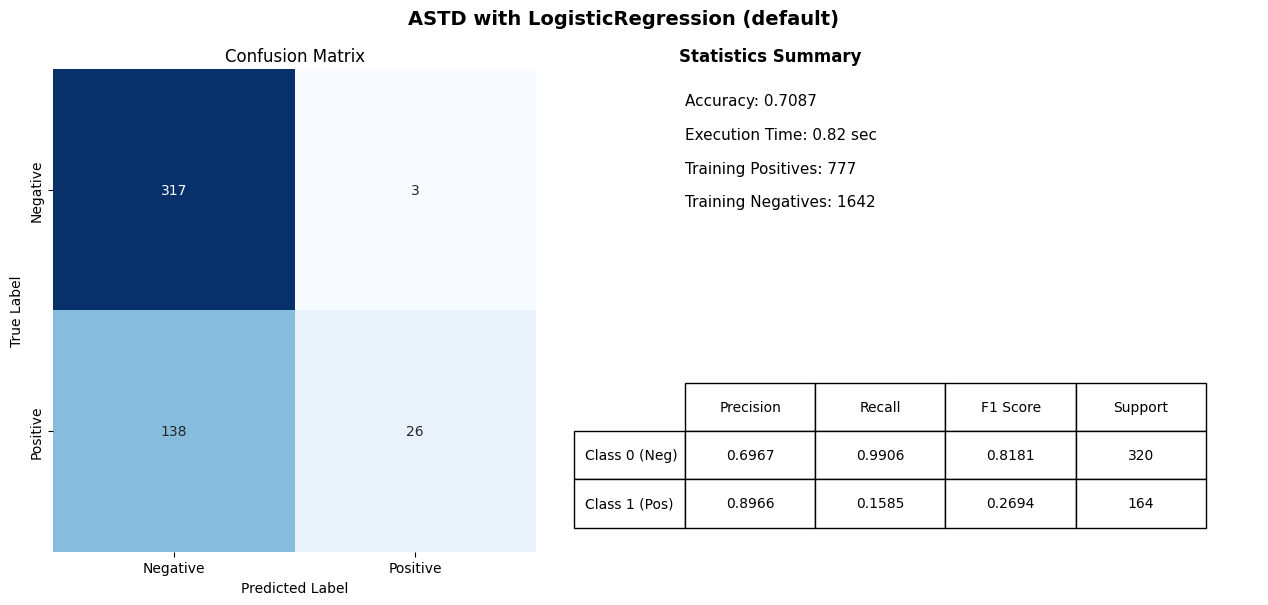


-- Running default model on ASTD_Balanced --


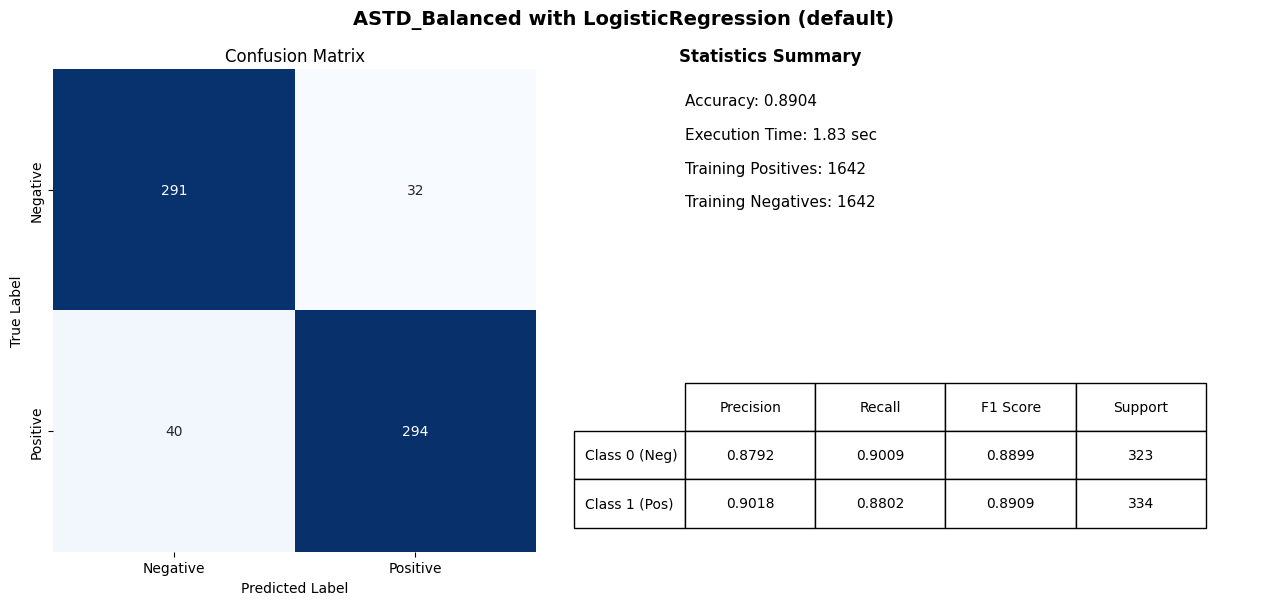


-- Running default model on ASTD_Preprocessed --


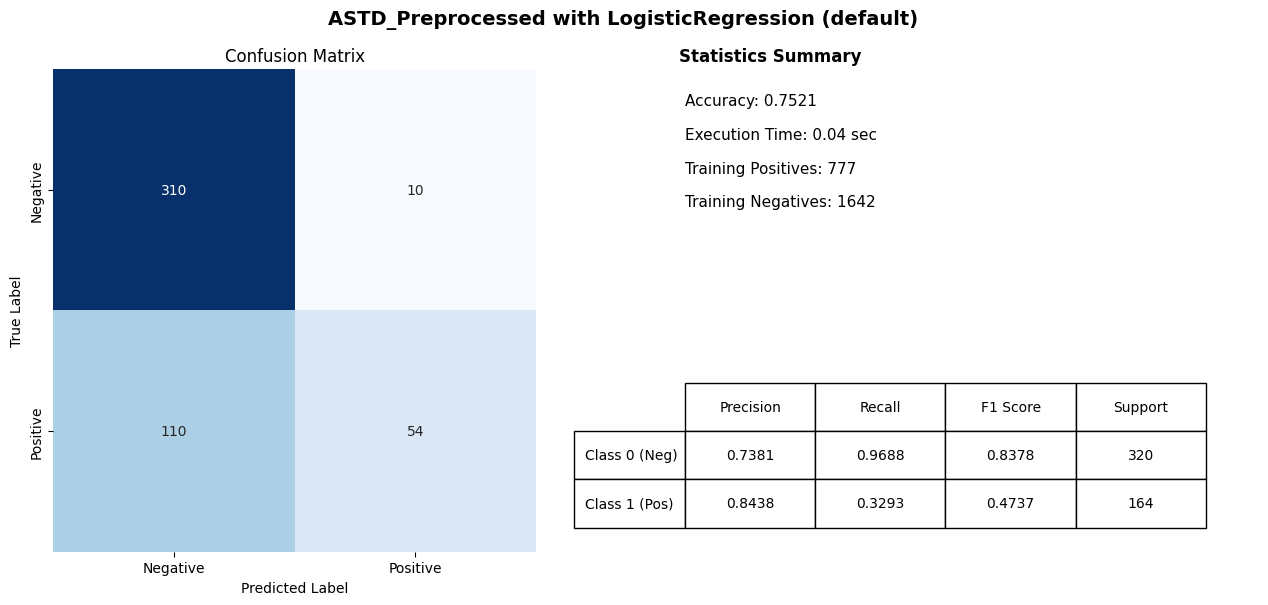


-- Running default model on ASTD_Preprocessed_Balanced --


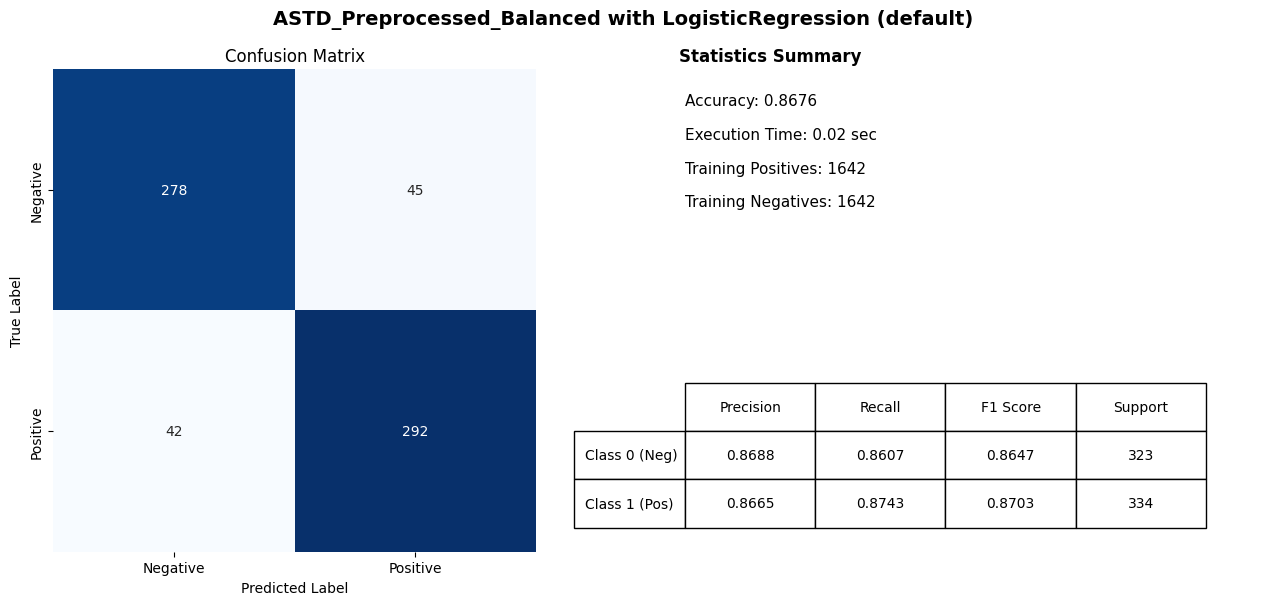


=== Step 2: Tuning C for LogisticRegression ===


-- Tuning ASTD --



C: 0.001 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.1737s
C: 0.01 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.1124s
C: 0.1 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.4861s
C: 0.5 | F1[0]: 0.8025 | F1[1]: 0.1236 | Avg F1: 0.4631 | Time: 0.6026s
C: 1.0 | F1[0]: 0.8181 | F1[1]: 0.2694 | Avg F1: 0.5437 | Time: 0.3661s
C: 2.0 | F1[0]: 0.8246 | F1[1]: 0.4072 | Avg F1: 0.6159 | Time: 0.3592s
C: 5.0 | F1[0]: 0.825 | F1[1]: 0.4919 | Avg F1: 0.6585 | Time: 0.9482s
C: 10.0 | F1[0]: 0.827 | F1[1]: 0.5214 | Avg F1: 0.6742 | Time: 0.6729s


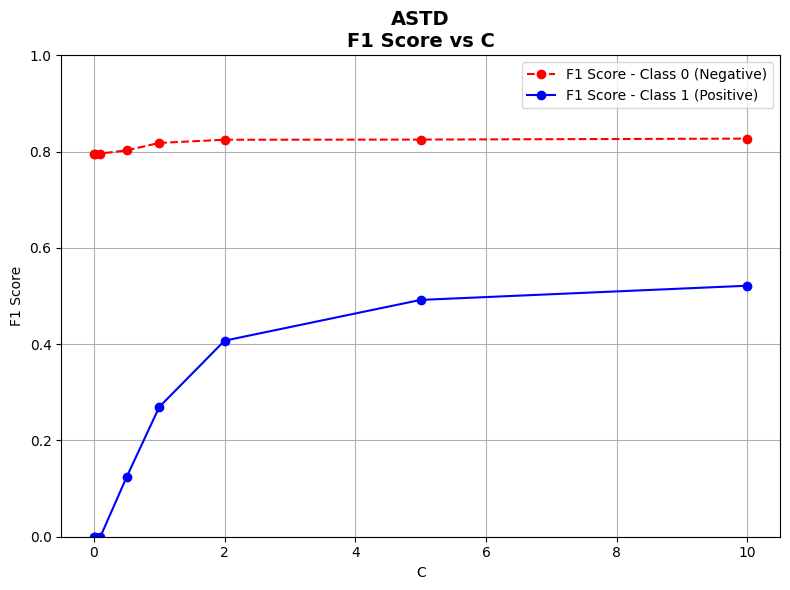


Best C = 10.0 with Avg F1 = 0.6742

-- Tuning ASTD_Balanced --



C: 0.001 | F1[0]: 0.6592 | F1[1]: 0.0 | Avg F1: 0.3296 | Time: 0.1831s
C: 0.01 | F1[0]: 0.7728 | F1[1]: 0.6349 | Avg F1: 0.7039 | Time: 0.0726s
C: 0.1 | F1[0]: 0.8626 | F1[1]: 0.854 | Avg F1: 0.8583 | Time: 0.3672s
C: 0.5 | F1[0]: 0.8801 | F1[1]: 0.8794 | Avg F1: 0.8798 | Time: 0.3331s
C: 1.0 | F1[0]: 0.8899 | F1[1]: 0.8909 | Avg F1: 0.8904 | Time: 0.4206s
C: 2.0 | F1[0]: 0.8903 | F1[1]: 0.8936 | Avg F1: 0.8919 | Time: 0.482s
C: 5.0 | F1[0]: 0.8892 | F1[1]: 0.8945 | Avg F1: 0.8919 | Time: 0.4733s
C: 10.0 | F1[0]: 0.8906 | F1[1]: 0.8961 | Avg F1: 0.8934 | Time: 0.8526s


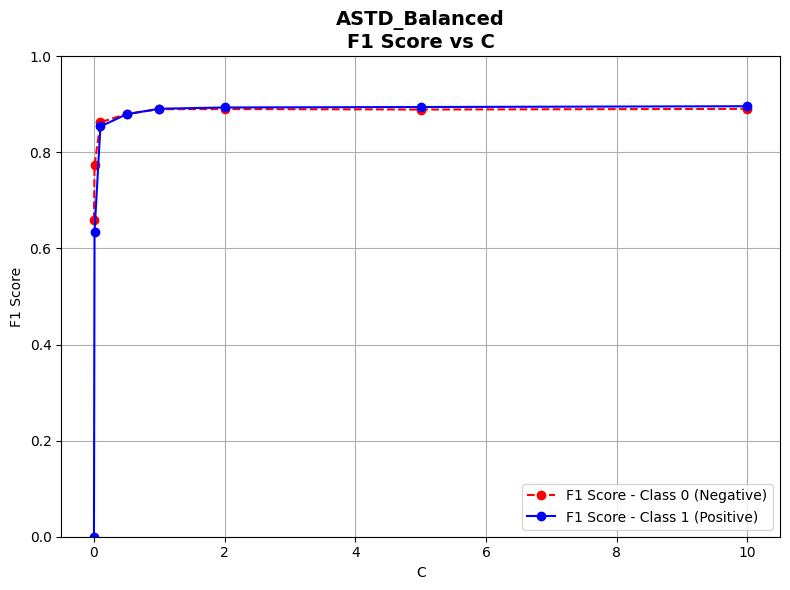


Best C = 10.0 with Avg F1 = 0.8934

-- Tuning ASTD_Preprocessed --



C: 0.001 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0084s
C: 0.01 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0094s
C: 0.1 | F1[0]: 0.796 | F1[1]: 0.0 | Avg F1: 0.398 | Time: 0.0134s
C: 0.5 | F1[0]: 0.824 | F1[1]: 0.3284 | Avg F1: 0.5762 | Time: 0.0203s
C: 1.0 | F1[0]: 0.8378 | F1[1]: 0.4737 | Avg F1: 0.6558 | Time: 0.025s
C: 2.0 | F1[0]: 0.8385 | F1[1]: 0.5649 | Avg F1: 0.7017 | Time: 0.0249s
C: 5.0 | F1[0]: 0.8475 | F1[1]: 0.6364 | Avg F1: 0.7419 | Time: 0.0395s
C: 10.0 | F1[0]: 0.8361 | F1[1]: 0.6403 | Avg F1: 0.7382 | Time: 0.0404s


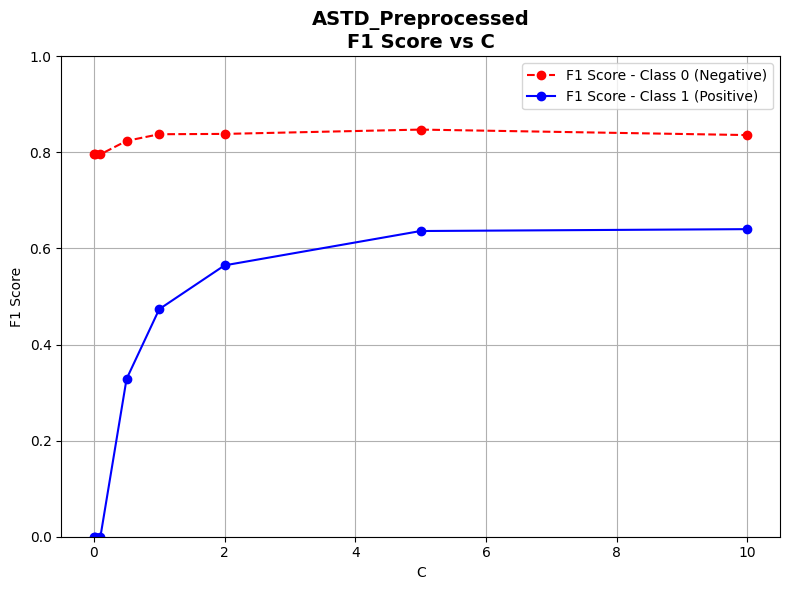


Best C = 5.0 with Avg F1 = 0.7419

-- Tuning ASTD_Preprocessed_Balanced --



C: 0.001 | F1[0]: 0.6632 | F1[1]: 0.0353 | Avg F1: 0.3493 | Time: 0.0094s
C: 0.01 | F1[0]: 0.8141 | F1[1]: 0.7626 | Avg F1: 0.7883 | Time: 0.0072s
C: 0.1 | F1[0]: 0.8391 | F1[1]: 0.8351 | Avg F1: 0.8371 | Time: 0.01s
C: 0.5 | F1[0]: 0.8642 | F1[1]: 0.8679 | Avg F1: 0.866 | Time: 0.0139s
C: 1.0 | F1[0]: 0.8647 | F1[1]: 0.8703 | Avg F1: 0.8675 | Time: 0.0154s
C: 2.0 | F1[0]: 0.8795 | F1[1]: 0.8859 | Avg F1: 0.8827 | Time: 0.0134s
C: 5.0 | F1[0]: 0.8811 | F1[1]: 0.8902 | Avg F1: 0.8857 | Time: 0.0392s
C: 10.0 | F1[0]: 0.8762 | F1[1]: 0.886 | Avg F1: 0.8811 | Time: 0.0328s


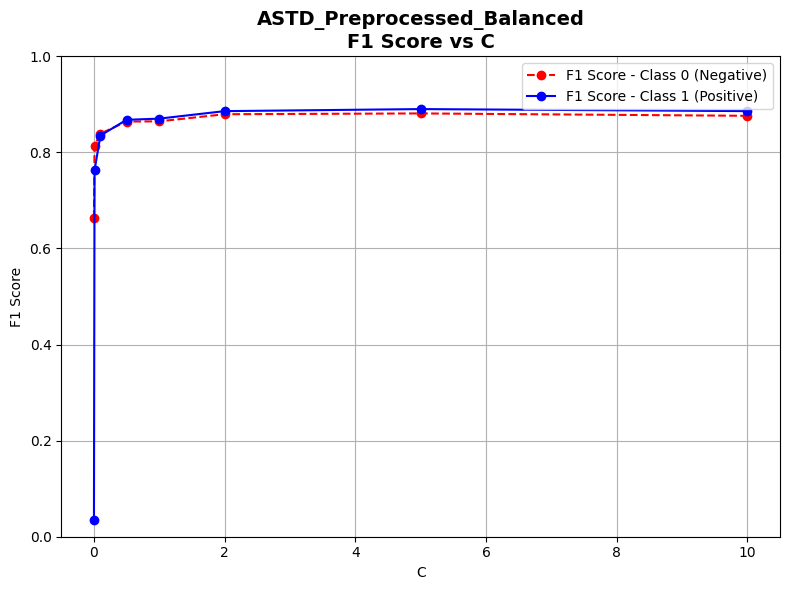


Best C = 5.0 with Avg F1 = 0.8857

=== Step 3: LogisticRegression with BEST C ===


-- ASTD with best C = 10.0 --


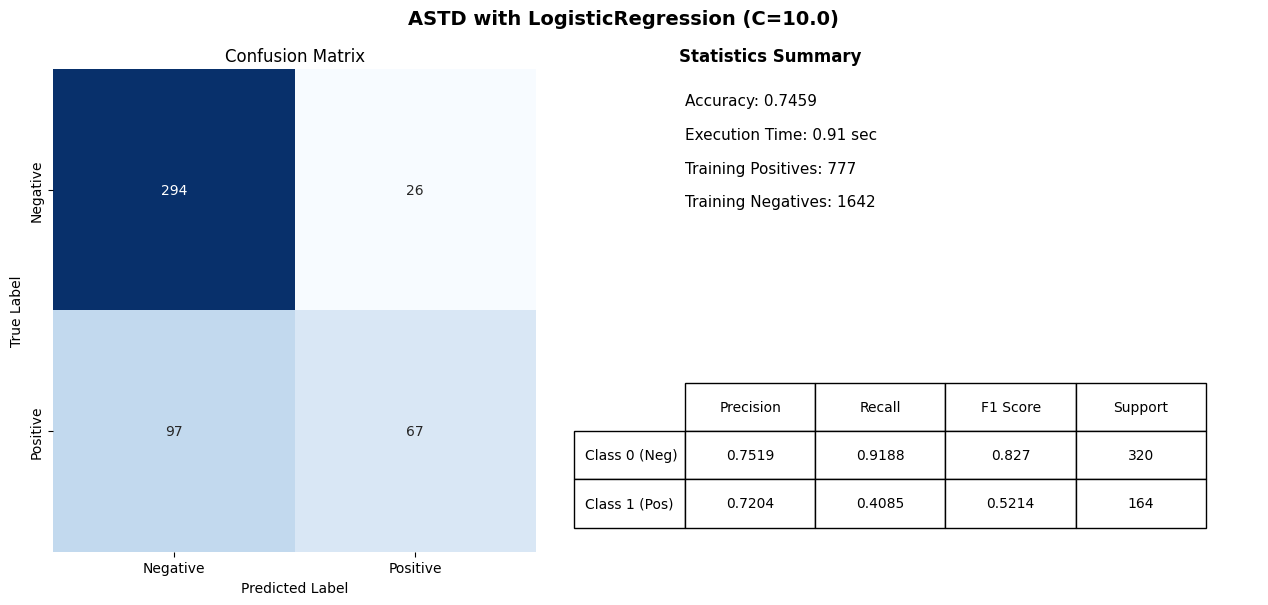


-- ASTD_Balanced with best C = 10.0 --


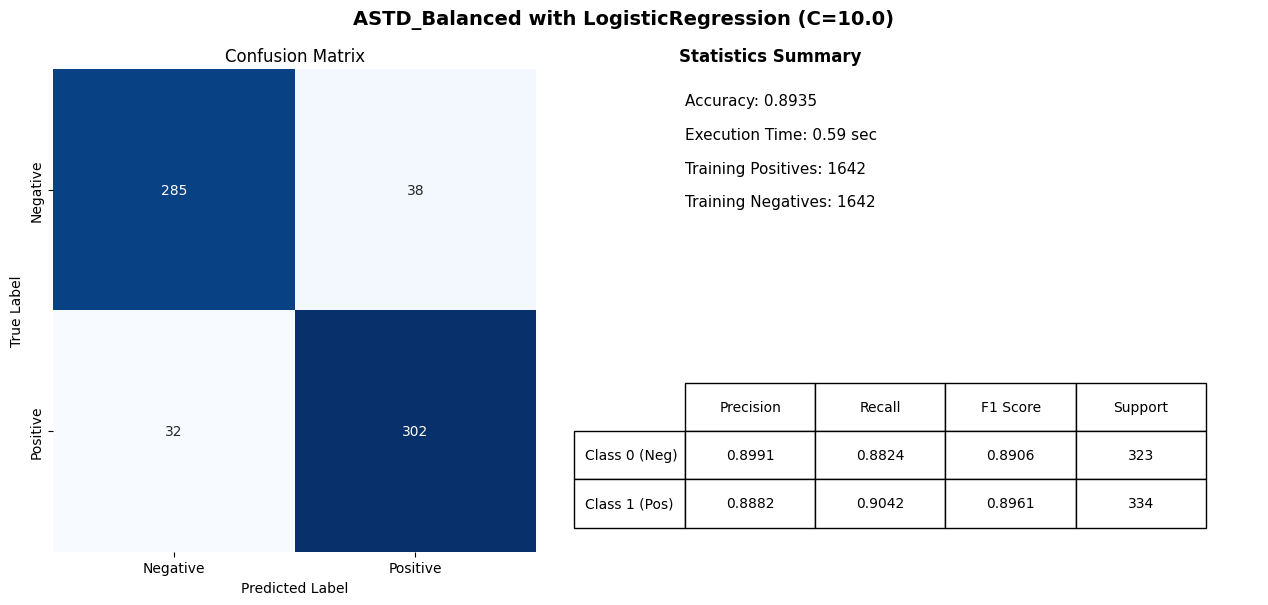


-- ASTD_Preprocessed with best C = 5.0 --


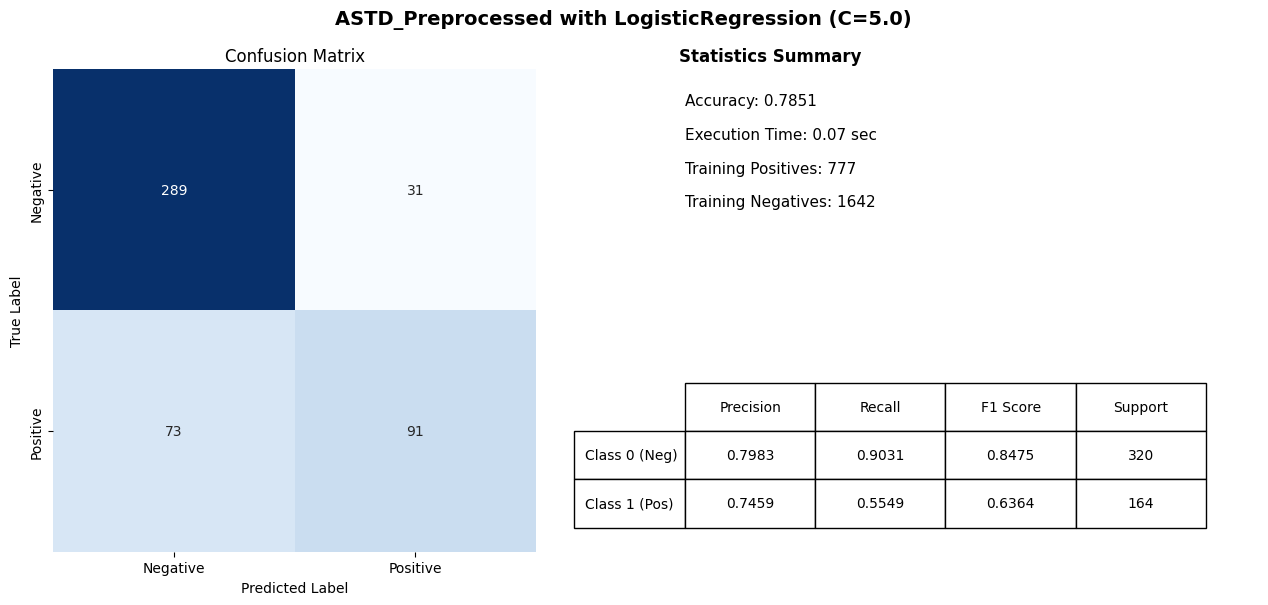


-- ASTD_Preprocessed_Balanced with best C = 5.0 --


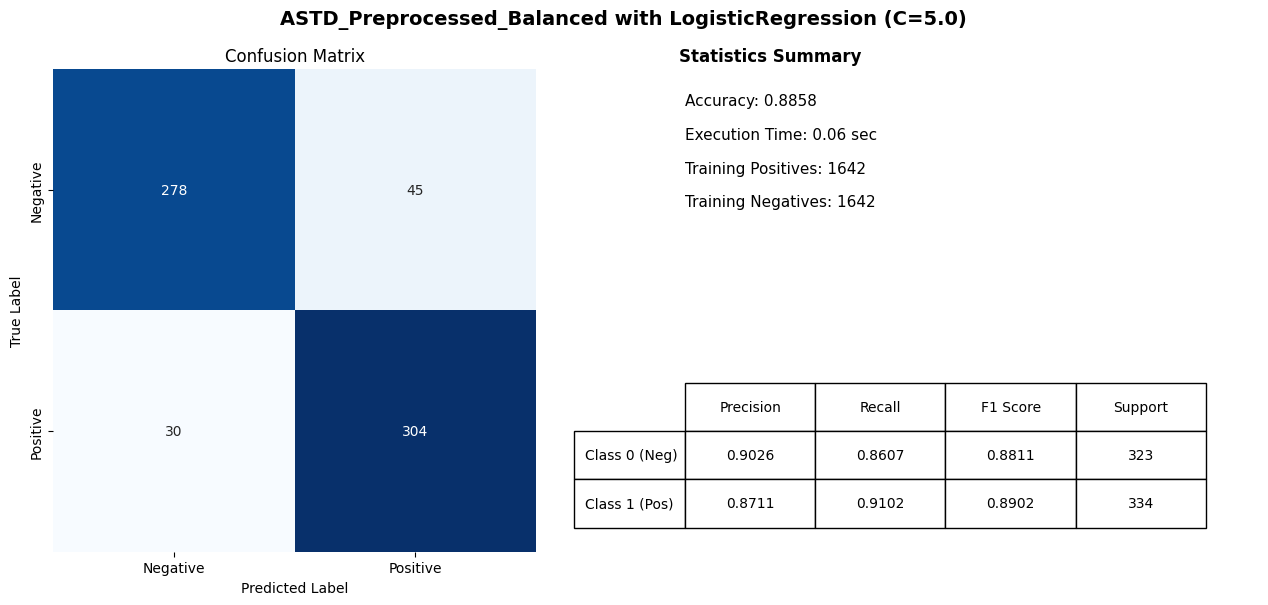

Results saved to 'LogisticRegression_Results.csv'


In [75]:
from sklearn.linear_model import LogisticRegression

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LR_results = []

# === Step 1: Logistic Regression with default C
print("\n=== Step 1: LogisticRegression with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name="LogisticRegression (default)",
        dataset_name=label,
        model_params={"max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LogisticRegression ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LogisticRegression with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name=f"LogisticRegression (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C, "max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LR_results)
results_df.to_csv("LogisticRegression_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LogisticRegression_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)



## **RandomForest**


=== Step 1: RandomForestClassifier with DEFAULT parameters ===


-- Running default model on ASTD --


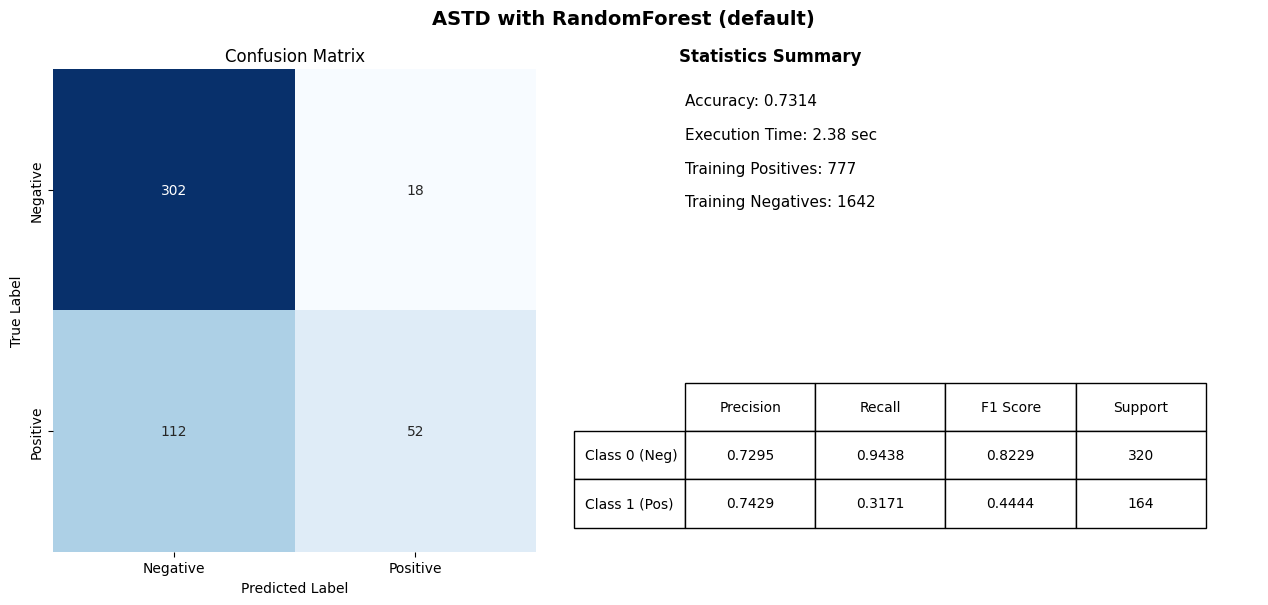


-- Running default model on ASTD_Balanced --


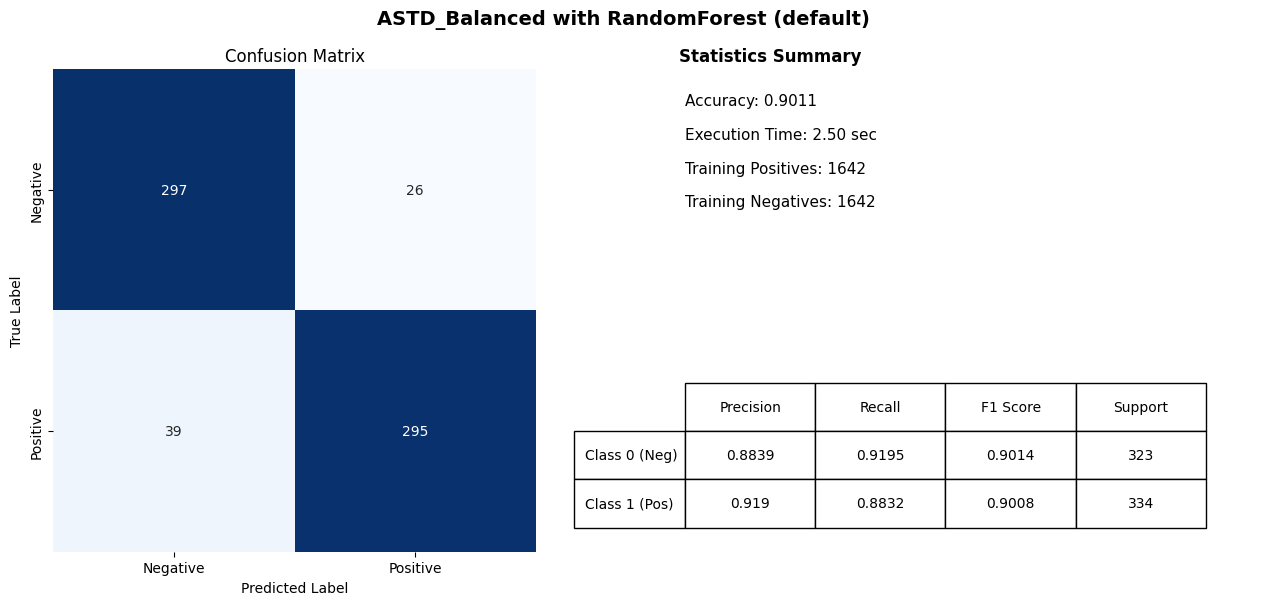


-- Running default model on ASTD_Preprocessed --


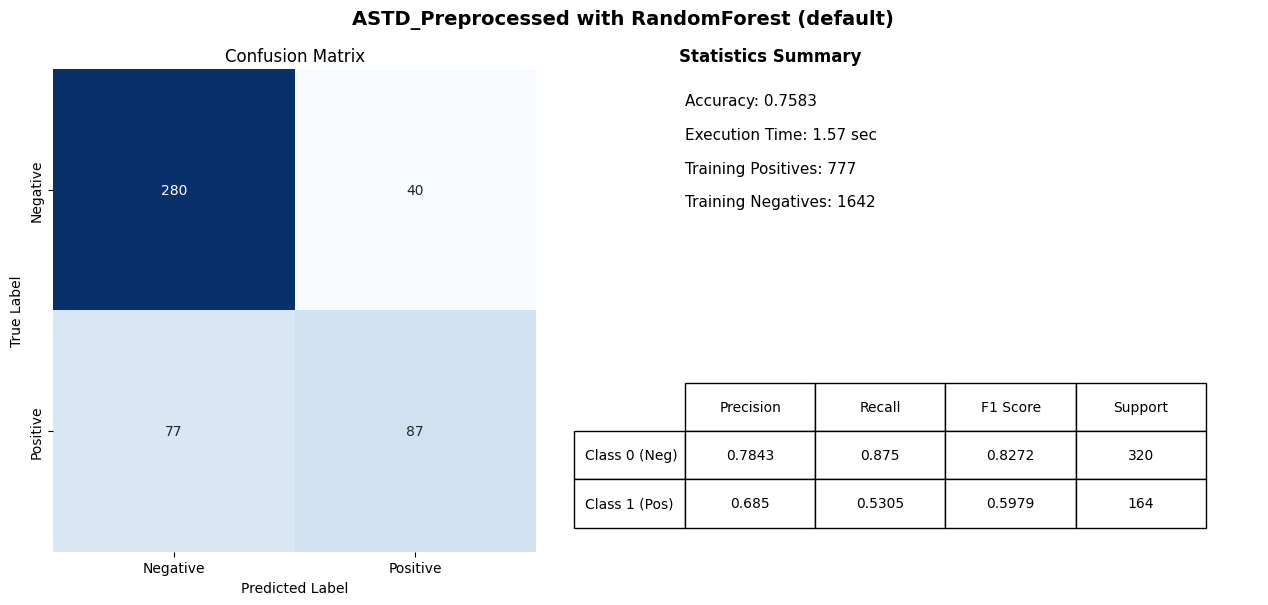


-- Running default model on ASTD_Preprocessed_Balanced --


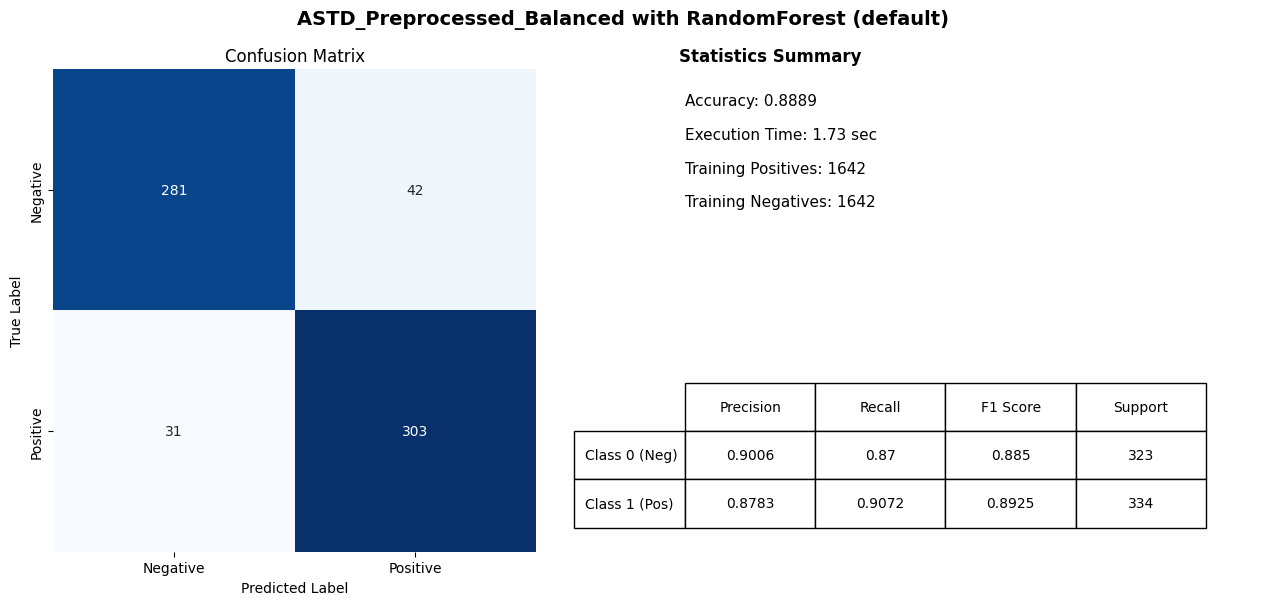


=== Step 2: Tuning n_estimators for RandomForest ===


-- Tuning ASTD --



n_estimators: 10 | F1[0]: 0.815 | F1[1]: 0.3784 | Avg F1: 0.5967 | Time: 0.2238s
n_estimators: 50 | F1[0]: 0.82 | F1[1]: 0.4192 | Avg F1: 0.6196 | Time: 1.0743s
n_estimators: 100 | F1[0]: 0.8119 | F1[1]: 0.393 | Avg F1: 0.6025 | Time: 2.8455s
n_estimators: 200 | F1[0]: 0.8169 | F1[1]: 0.4322 | Avg F1: 0.6246 | Time: 4.2698s
n_estimators: 300 | F1[0]: 0.8223 | F1[1]: 0.4329 | Avg F1: 0.6276 | Time: 6.5632s
n_estimators: 500 | F1[0]: 0.8218 | F1[1]: 0.4378 | Avg F1: 0.6298 | Time: 10.9881s


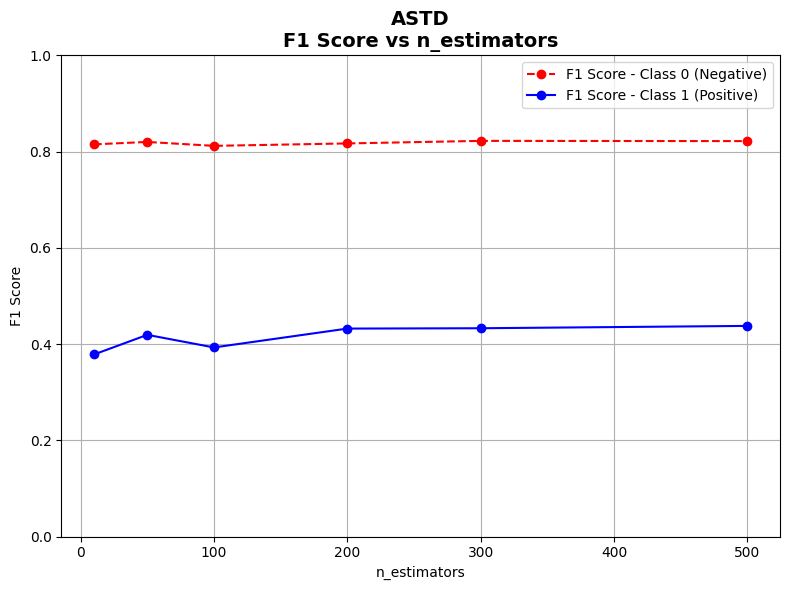


Best n_estimators = 500 with Avg F1 = 0.6298

-- Tuning ASTD_Balanced --



n_estimators: 10 | F1[0]: 0.8789 | F1[1]: 0.8744 | Avg F1: 0.8767 | Time: 0.2554s
n_estimators: 50 | F1[0]: 0.9 | F1[1]: 0.8991 | Avg F1: 0.8995 | Time: 1.6586s
n_estimators: 100 | F1[0]: 0.895 | F1[1]: 0.895 | Avg F1: 0.895 | Time: 2.8411s
n_estimators: 200 | F1[0]: 0.8899 | F1[1]: 0.8909 | Avg F1: 0.8904 | Time: 4.9964s
n_estimators: 300 | F1[0]: 0.8902 | F1[1]: 0.8906 | Avg F1: 0.8904 | Time: 8.2822s
n_estimators: 500 | F1[0]: 0.8869 | F1[1]: 0.8879 | Avg F1: 0.8874 | Time: 13.3728s


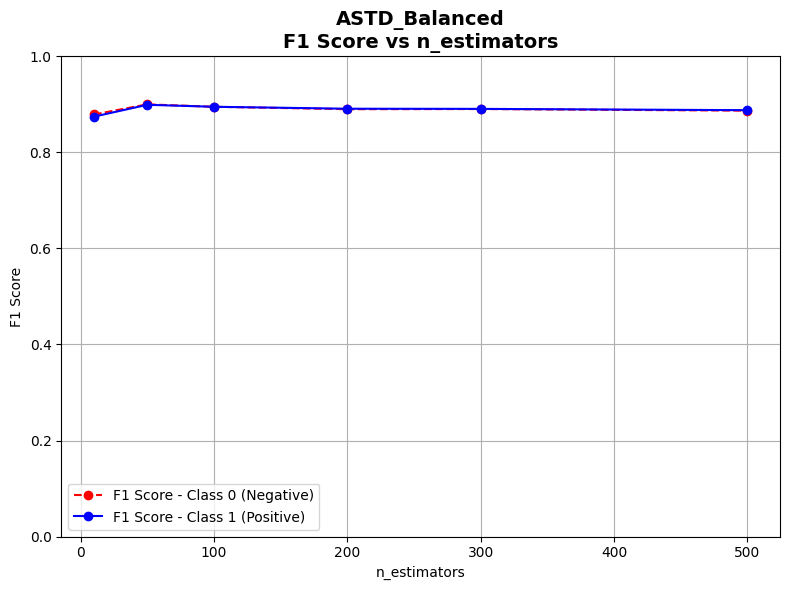


Best n_estimators = 50 with Avg F1 = 0.8995

-- Tuning ASTD_Preprocessed --



n_estimators: 10 | F1[0]: 0.8341 | F1[1]: 0.6063 | Avg F1: 0.7202 | Time: 0.1703s
n_estimators: 50 | F1[0]: 0.838 | F1[1]: 0.6305 | Avg F1: 0.7343 | Time: 0.7821s
n_estimators: 100 | F1[0]: 0.8321 | F1[1]: 0.5936 | Avg F1: 0.7129 | Time: 1.5745s
n_estimators: 200 | F1[0]: 0.8375 | F1[1]: 0.6105 | Avg F1: 0.724 | Time: 3.1037s
n_estimators: 300 | F1[0]: 0.8336 | F1[1]: 0.609 | Avg F1: 0.7213 | Time: 6.4468s
n_estimators: 500 | F1[0]: 0.8274 | F1[1]: 0.6081 | Avg F1: 0.7177 | Time: 7.8363s


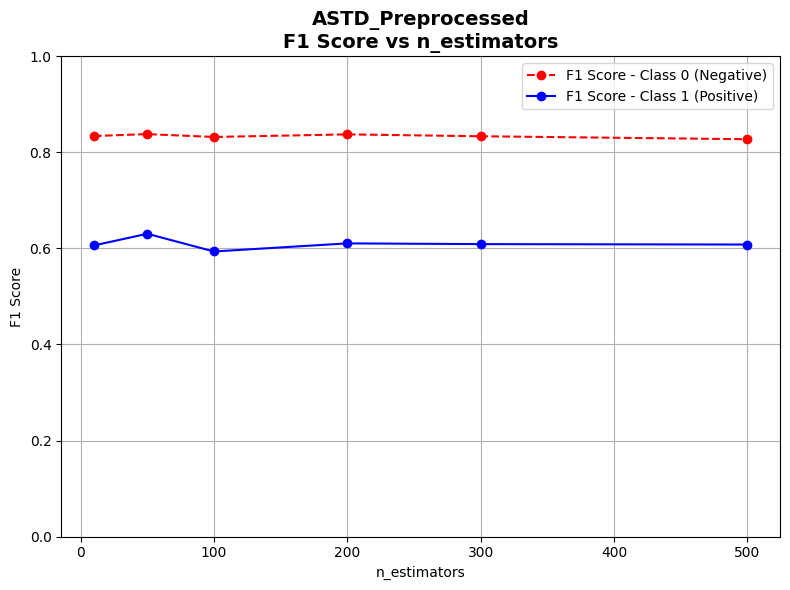


Best n_estimators = 50 with Avg F1 = 0.7343

-- Tuning ASTD_Preprocessed_Balanced --



n_estimators: 10 | F1[0]: 0.8488 | F1[1]: 0.867 | Avg F1: 0.8579 | Time: 0.1828s
n_estimators: 50 | F1[0]: 0.8787 | F1[1]: 0.8866 | Avg F1: 0.8827 | Time: 1.0464s
n_estimators: 100 | F1[0]: 0.8655 | F1[1]: 0.8809 | Avg F1: 0.8732 | Time: 2.3042s
n_estimators: 200 | F1[0]: 0.8784 | F1[1]: 0.8869 | Avg F1: 0.8826 | Time: 3.424s
n_estimators: 300 | F1[0]: 0.8791 | F1[1]: 0.8863 | Avg F1: 0.8827 | Time: 5.6691s
n_estimators: 500 | F1[0]: 0.8885 | F1[1]: 0.8951 | Avg F1: 0.8918 | Time: 9.5408s


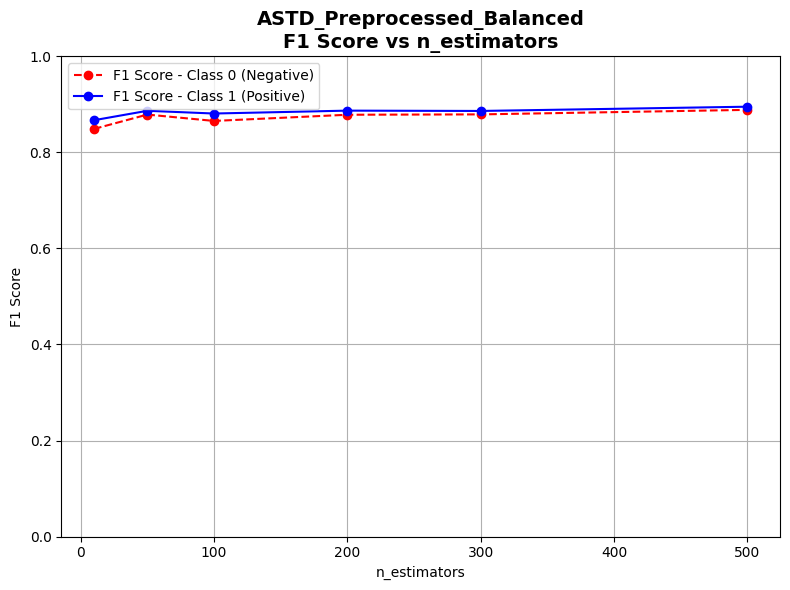


Best n_estimators = 500 with Avg F1 = 0.8918

=== Step 3: RandomForestClassifier with BEST n_estimators ===


-- ASTD with best n_estimators = 500 --


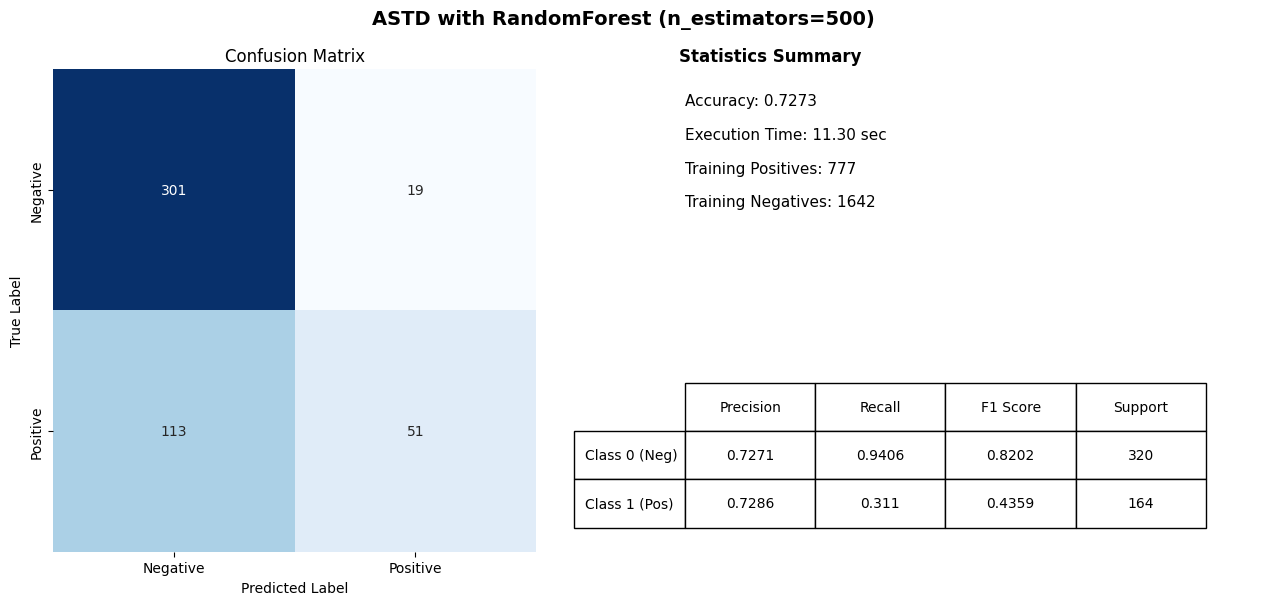


-- ASTD_Balanced with best n_estimators = 50 --


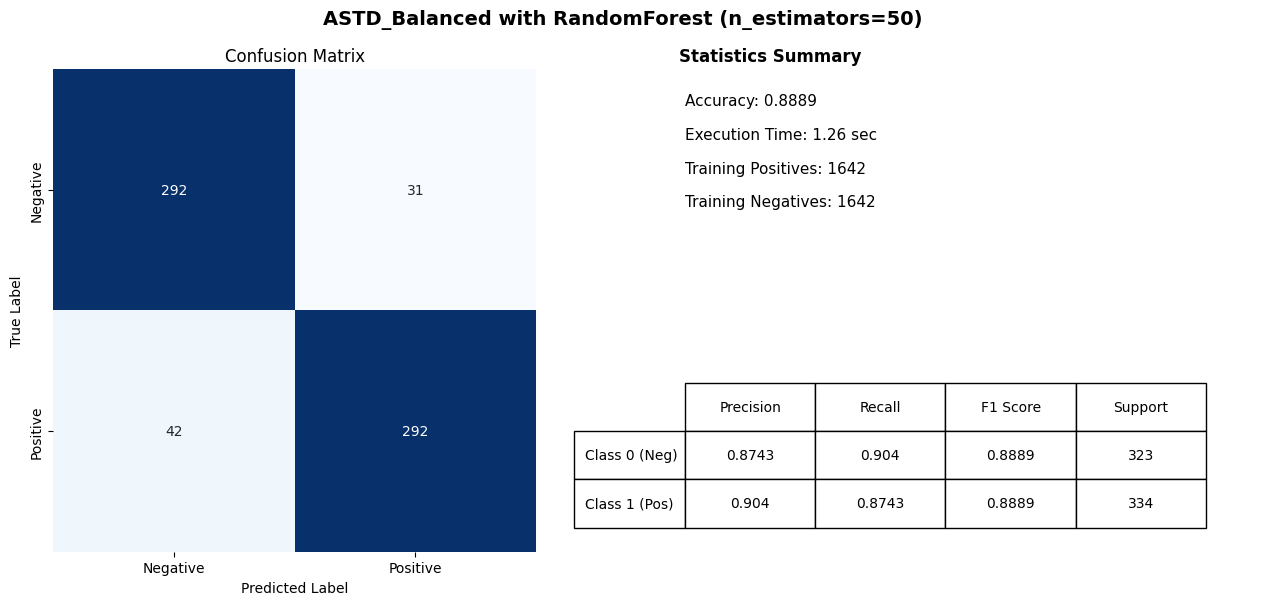


-- ASTD_Preprocessed with best n_estimators = 50 --


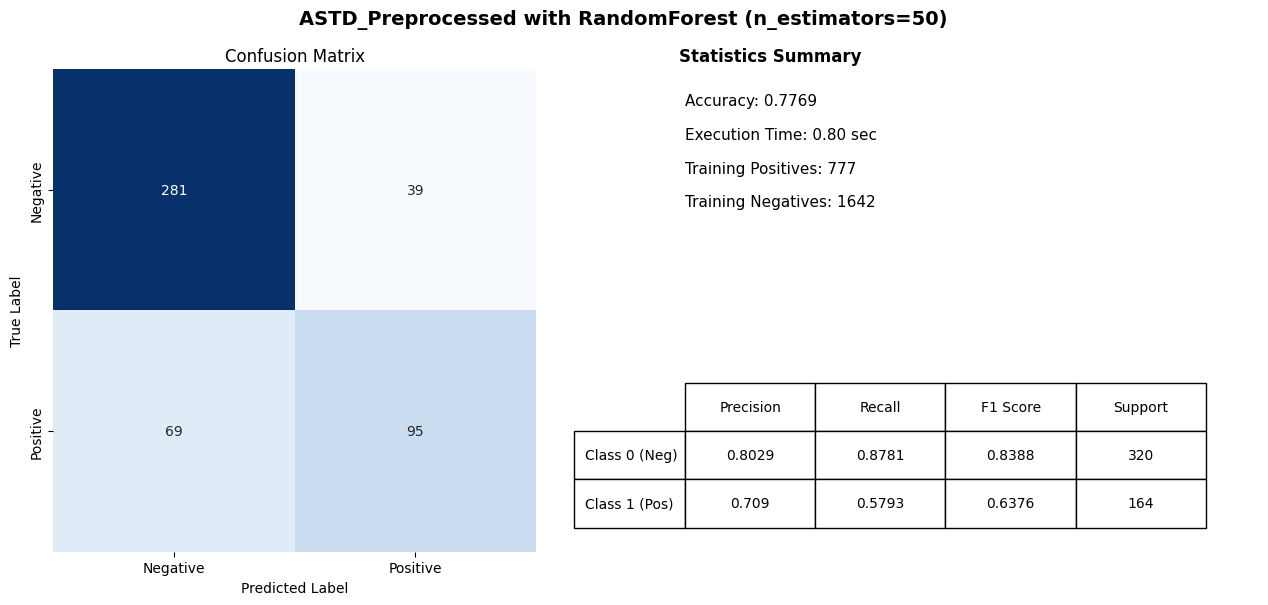


-- ASTD_Preprocessed_Balanced with best n_estimators = 500 --


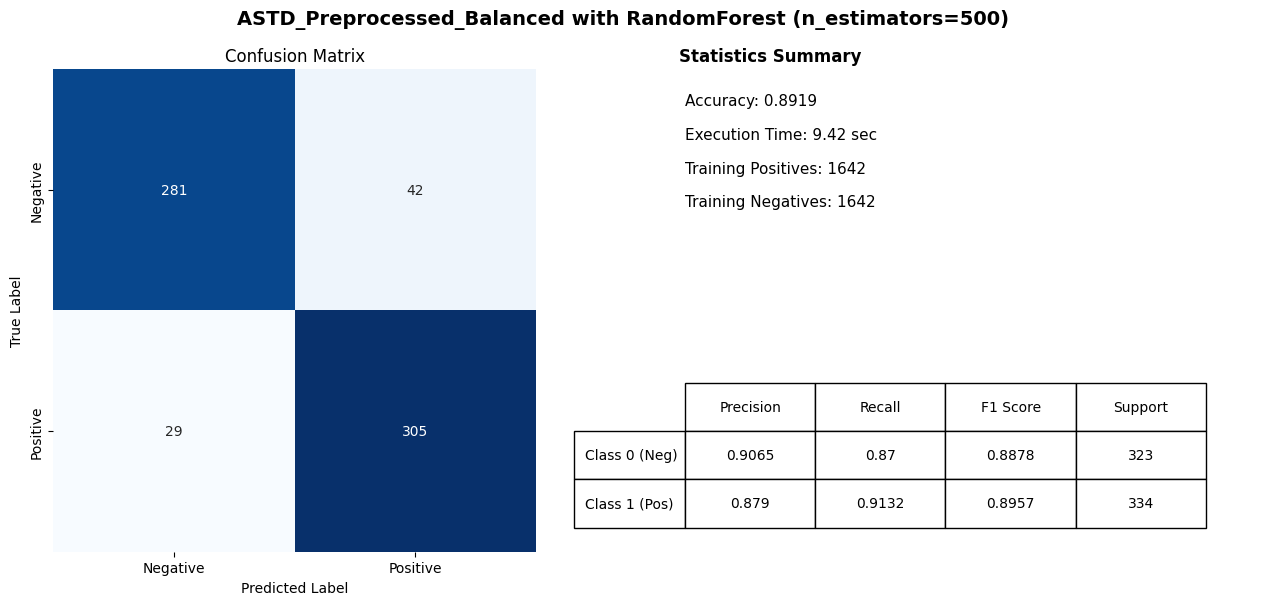

Results saved to 'RandomForest_Results.csv'


In [76]:
from sklearn.ensemble import RandomForestClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_RF_results = []

# === Step 1: RandomForest with default n_estimators
print("\n=== Step 1: RandomForestClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name="RandomForest (default)",
        dataset_name=label
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for RandomForest ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluation with best n_estimators
print("\n=== Step 3: RandomForestClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name=f"RandomForest (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_RF_results)
results_df.to_csv("RandomForest_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'RandomForest_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **KNeighborsClassifier**


=== Step 1: KNeighborsClassifier with DEFAULT parameters ===


-- Running default model on ASTD --


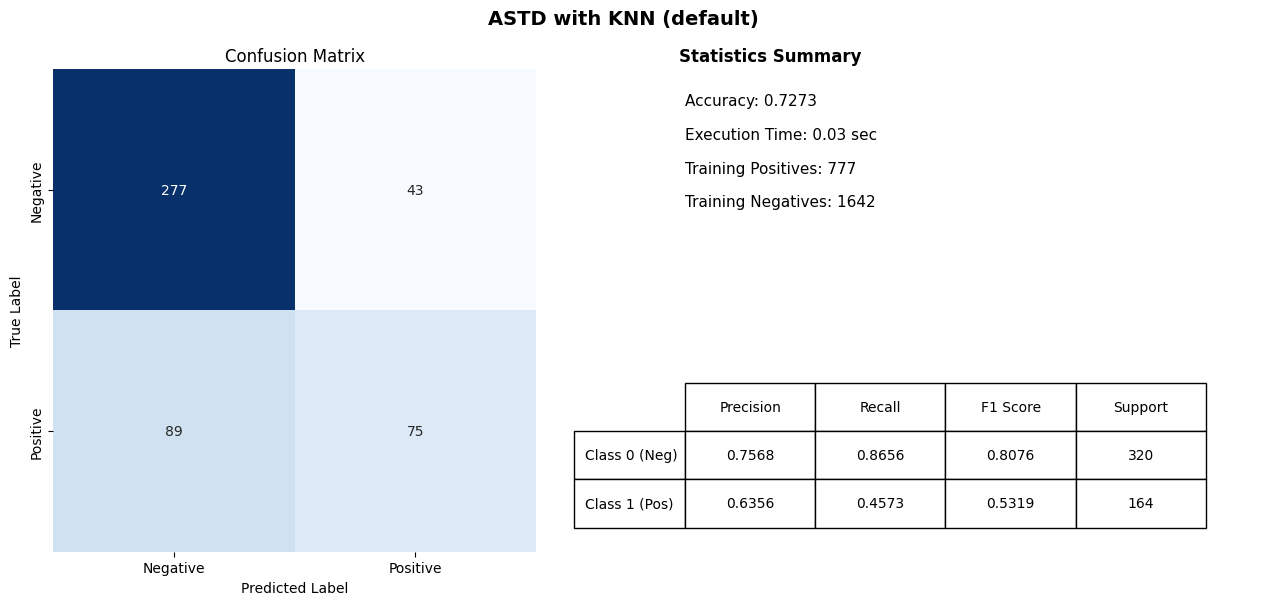


-- Running default model on ASTD_Balanced --


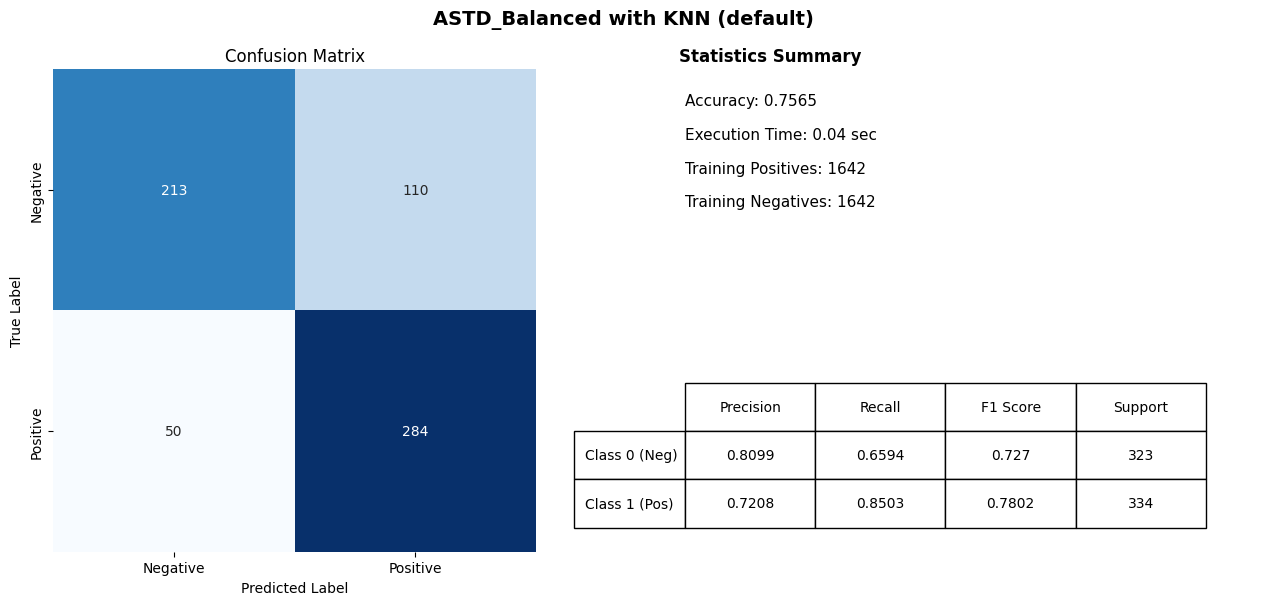


-- Running default model on ASTD_Preprocessed --


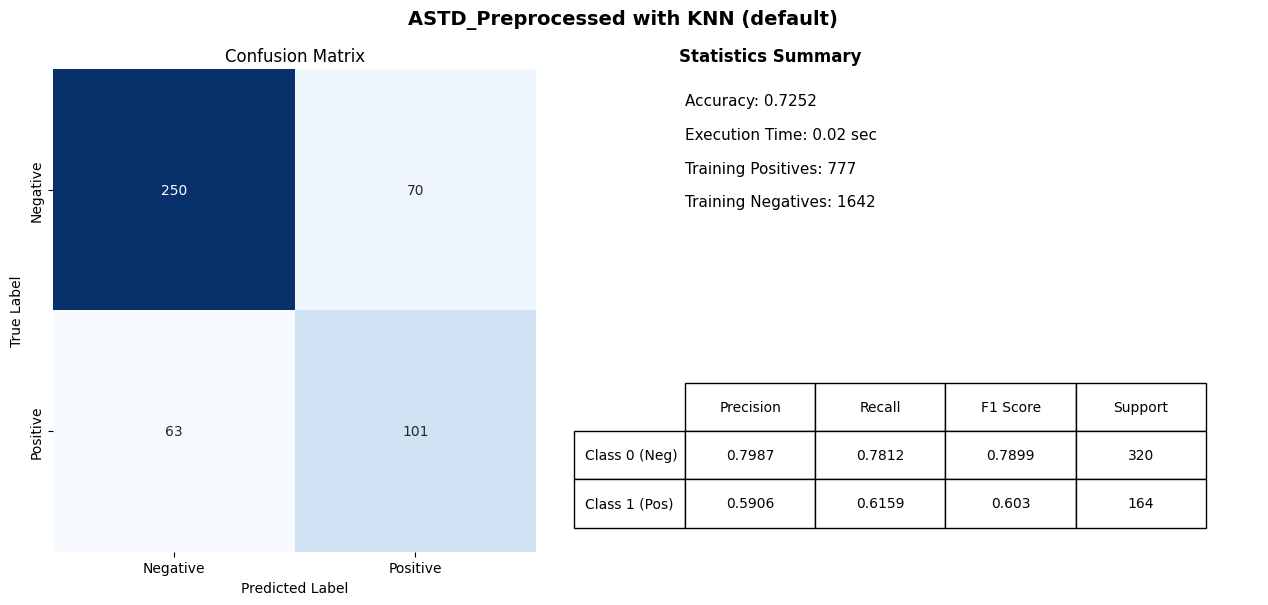


-- Running default model on ASTD_Preprocessed_Balanced --


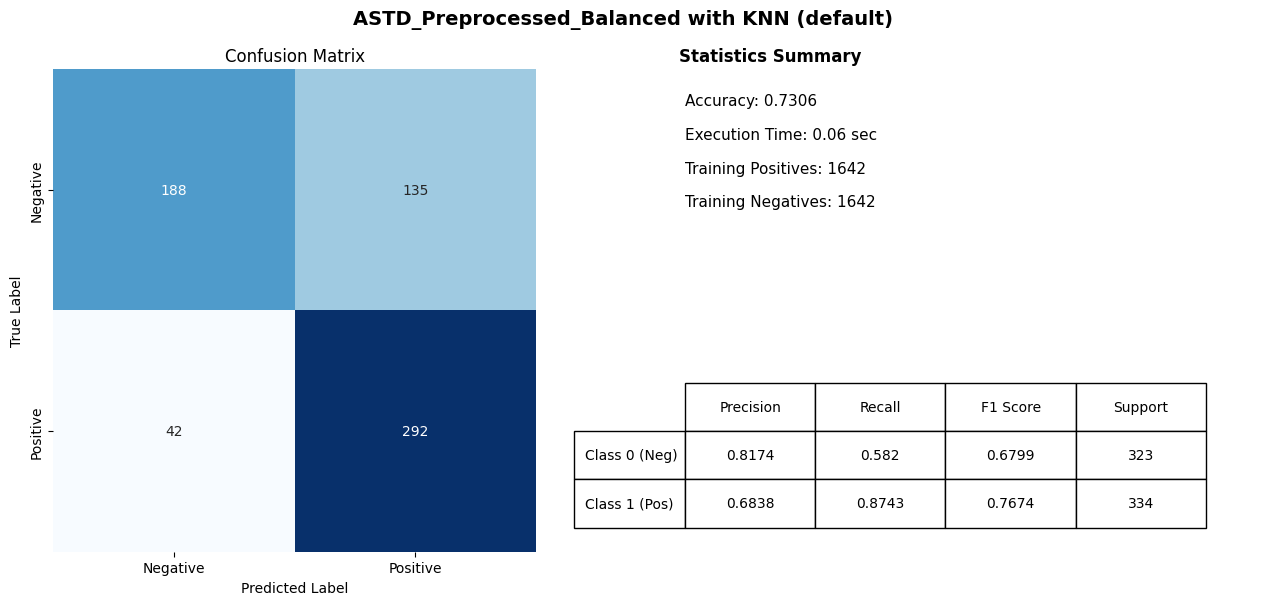


=== Step 2: Tuning n_neighbors for KNN ===


-- Tuning ASTD --



n_neighbors: 1 | F1[0]: 0.7908 | F1[1]: 0.5723 | Avg F1: 0.6815 | Time: 0.0244s
n_neighbors: 3 | F1[0]: 0.8249 | F1[1]: 0.5986 | Avg F1: 0.7118 | Time: 0.0161s
n_neighbors: 5 | F1[0]: 0.8076 | F1[1]: 0.5319 | Avg F1: 0.6697 | Time: 0.0166s
n_neighbors: 7 | F1[0]: 0.807 | F1[1]: 0.5352 | Avg F1: 0.6711 | Time: 0.0168s
n_neighbors: 9 | F1[0]: 0.804 | F1[1]: 0.4907 | Avg F1: 0.6474 | Time: 0.0164s
n_neighbors: 11 | F1[0]: 0.8074 | F1[1]: 0.4809 | Avg F1: 0.6441 | Time: 0.0169s
n_neighbors: 15 | F1[0]: 0.8297 | F1[1]: 0.4833 | Avg F1: 0.6565 | Time: 0.0177s
n_neighbors: 17 | F1[0]: 0.8274 | F1[1]: 0.4706 | Avg F1: 0.649 | Time: 0.0198s
n_neighbors: 19 | F1[0]: 0.8281 | F1[1]: 0.4454 | Avg F1: 0.6368 | Time: 0.0174s


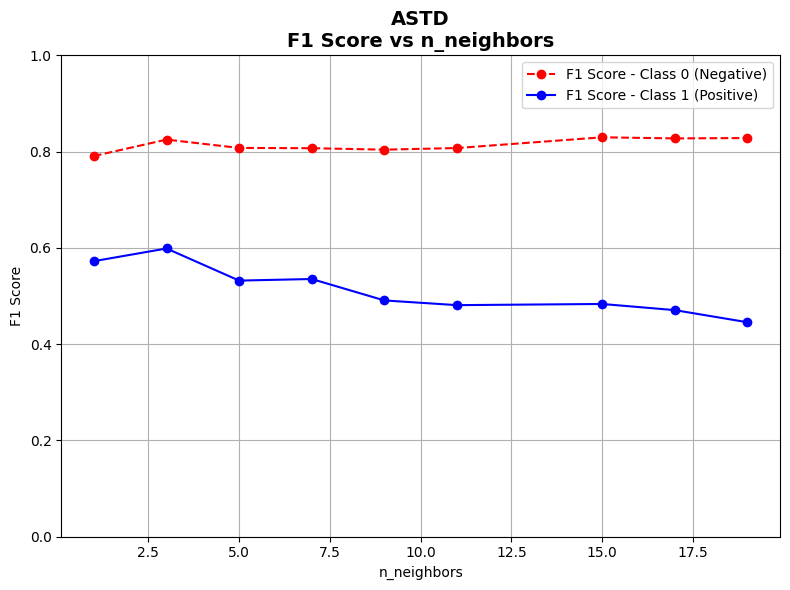


Best n_neighbors = 3 with Avg F1 = 0.7118

-- Tuning ASTD_Balanced --



n_neighbors: 1 | F1[0]: 0.8279 | F1[1]: 0.8611 | Avg F1: 0.8445 | Time: 0.0562s
n_neighbors: 3 | F1[0]: 0.7292 | F1[1]: 0.7886 | Avg F1: 0.7589 | Time: 0.045s
n_neighbors: 5 | F1[0]: 0.727 | F1[1]: 0.7802 | Avg F1: 0.7536 | Time: 0.0466s
n_neighbors: 7 | F1[0]: 0.7301 | F1[1]: 0.7807 | Avg F1: 0.7554 | Time: 0.0455s
n_neighbors: 9 | F1[0]: 0.7213 | F1[1]: 0.7585 | Avg F1: 0.7399 | Time: 0.049s
n_neighbors: 11 | F1[0]: 0.7252 | F1[1]: 0.7662 | Avg F1: 0.7457 | Time: 0.0463s
n_neighbors: 15 | F1[0]: 0.7273 | F1[1]: 0.7673 | Avg F1: 0.7473 | Time: 0.0503s
n_neighbors: 17 | F1[0]: 0.7 | F1[1]: 0.732 | Avg F1: 0.716 | Time: 0.0568s
n_neighbors: 19 | F1[0]: 0.6984 | F1[1]: 0.7386 | Avg F1: 0.7185 | Time: 0.06s


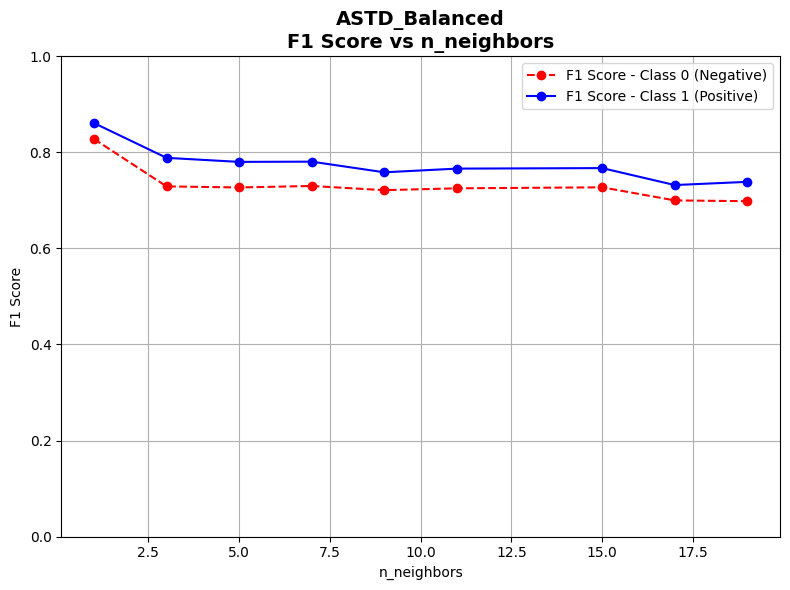


Best n_neighbors = 1 with Avg F1 = 0.8445

-- Tuning ASTD_Preprocessed --



n_neighbors: 1 | F1[0]: 0.5479 | F1[1]: 0.4945 | Avg F1: 0.5212 | Time: 0.0243s
n_neighbors: 3 | F1[0]: 0.7839 | F1[1]: 0.6523 | Avg F1: 0.7181 | Time: 0.0203s
n_neighbors: 5 | F1[0]: 0.7899 | F1[1]: 0.603 | Avg F1: 0.6964 | Time: 0.016s
n_neighbors: 7 | F1[0]: 0.8192 | F1[1]: 0.6355 | Avg F1: 0.7273 | Time: 0.0162s
n_neighbors: 9 | F1[0]: 0.8116 | F1[1]: 0.6 | Avg F1: 0.7058 | Time: 0.016s
n_neighbors: 11 | F1[0]: 0.8127 | F1[1]: 0.5948 | Avg F1: 0.7037 | Time: 0.0171s
n_neighbors: 15 | F1[0]: 0.8397 | F1[1]: 0.6099 | Avg F1: 0.7248 | Time: 0.0175s
n_neighbors: 17 | F1[0]: 0.8369 | F1[1]: 0.5891 | Avg F1: 0.713 | Time: 0.0171s
n_neighbors: 19 | F1[0]: 0.835 | F1[1]: 0.5756 | Avg F1: 0.7053 | Time: 0.0164s


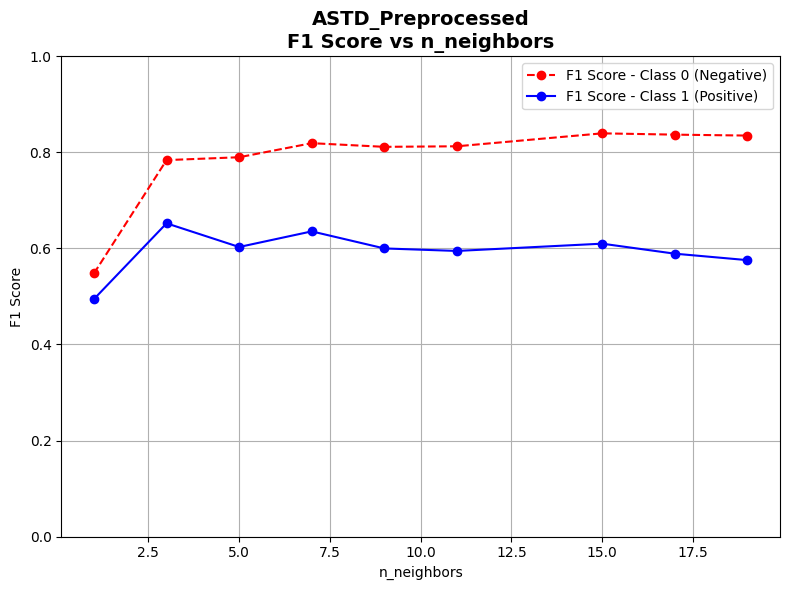


Best n_neighbors = 7 with Avg F1 = 0.7273

-- Tuning ASTD_Preprocessed_Balanced --



n_neighbors: 1 | F1[0]: 0.7504 | F1[1]: 0.807 | Avg F1: 0.7787 | Time: 0.0535s
n_neighbors: 3 | F1[0]: 0.7855 | F1[1]: 0.8315 | Avg F1: 0.8085 | Time: 0.0451s
n_neighbors: 5 | F1[0]: 0.6799 | F1[1]: 0.7674 | Avg F1: 0.7237 | Time: 0.0439s
n_neighbors: 7 | F1[0]: 0.716 | F1[1]: 0.7845 | Avg F1: 0.7503 | Time: 0.0435s
n_neighbors: 9 | F1[0]: 0.7009 | F1[1]: 0.7744 | Avg F1: 0.7376 | Time: 0.0461s
n_neighbors: 11 | F1[0]: 0.7102 | F1[1]: 0.7807 | Avg F1: 0.7455 | Time: 0.0443s
n_neighbors: 15 | F1[0]: 0.7043 | F1[1]: 0.7627 | Avg F1: 0.7335 | Time: 0.0453s
n_neighbors: 17 | F1[0]: 0.6976 | F1[1]: 0.7596 | Avg F1: 0.7286 | Time: 0.0542s
n_neighbors: 19 | F1[0]: 0.7184 | F1[1]: 0.7684 | Avg F1: 0.7434 | Time: 0.0454s


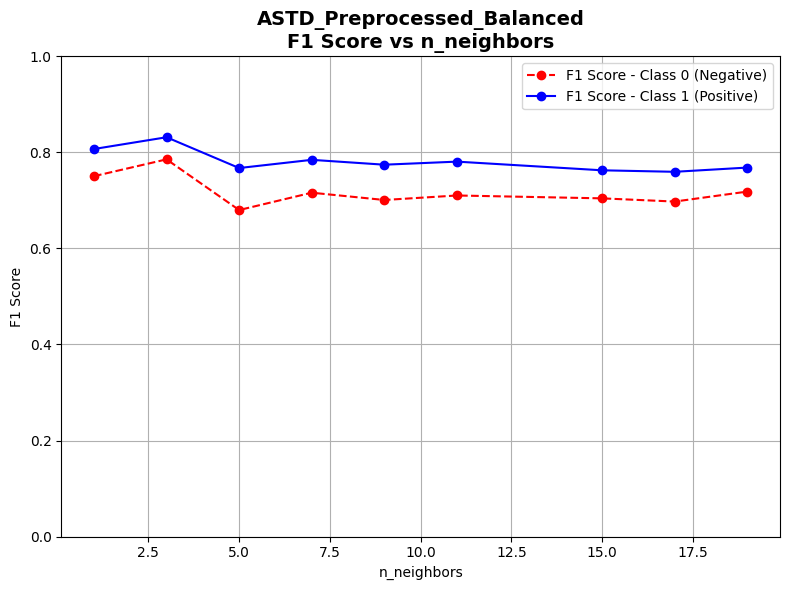


Best n_neighbors = 3 with Avg F1 = 0.8085

=== Step 3: KNN with BEST n_neighbors ===


-- ASTD with best k = 3 --


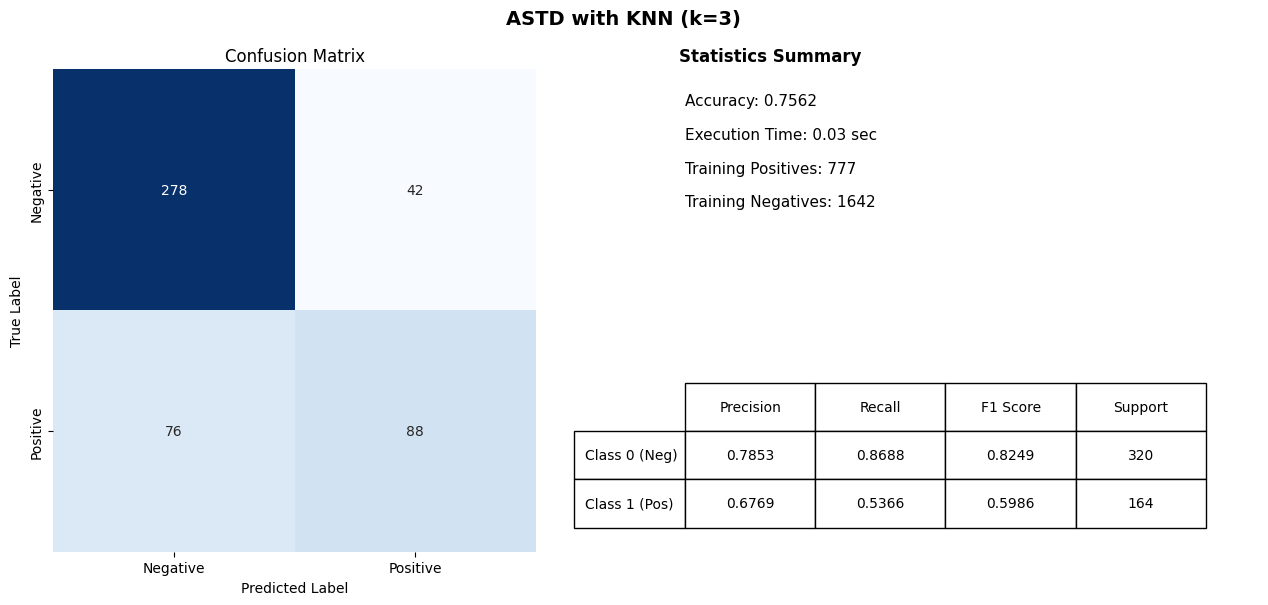


-- ASTD_Balanced with best k = 1 --


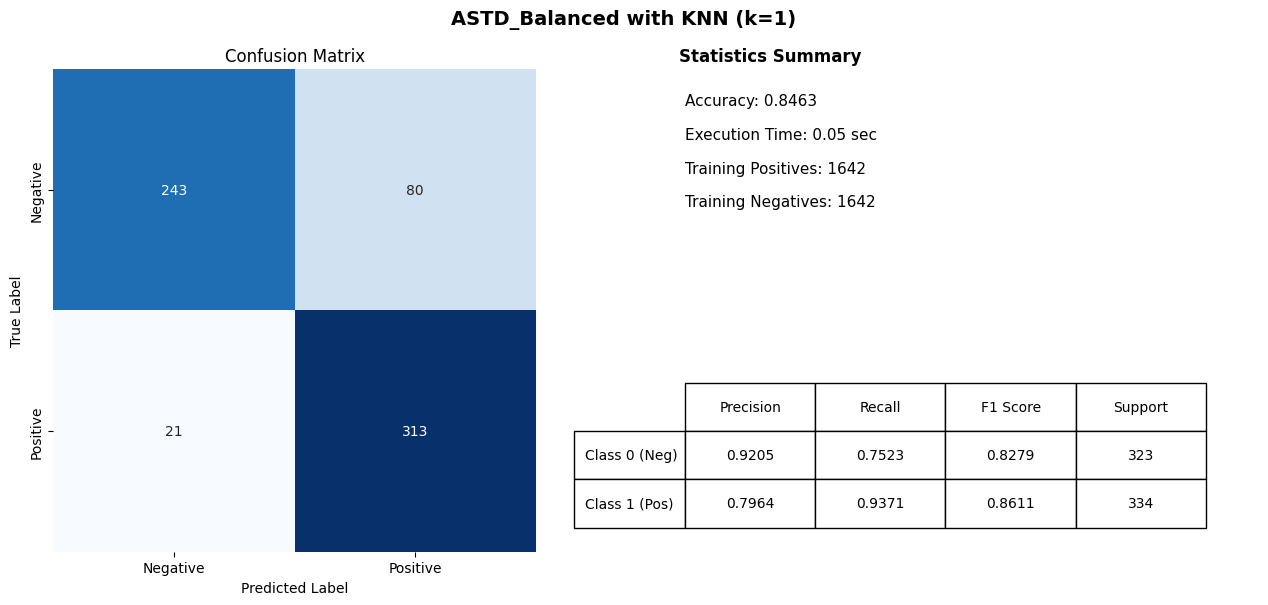


-- ASTD_Preprocessed with best k = 7 --


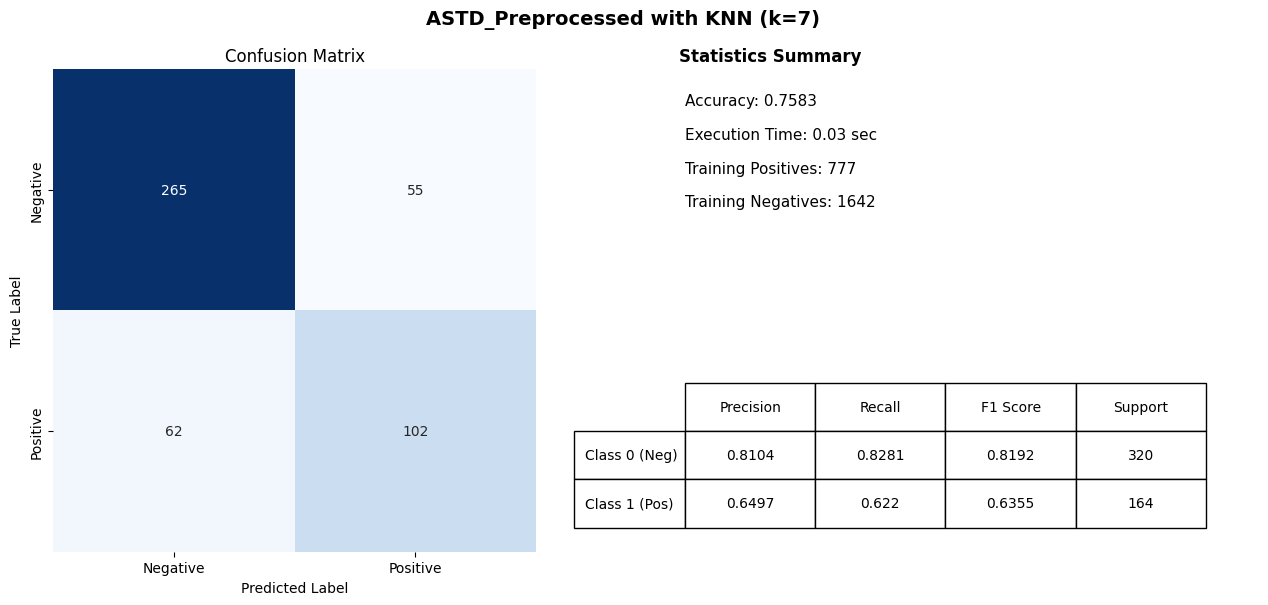


-- ASTD_Preprocessed_Balanced with best k = 3 --


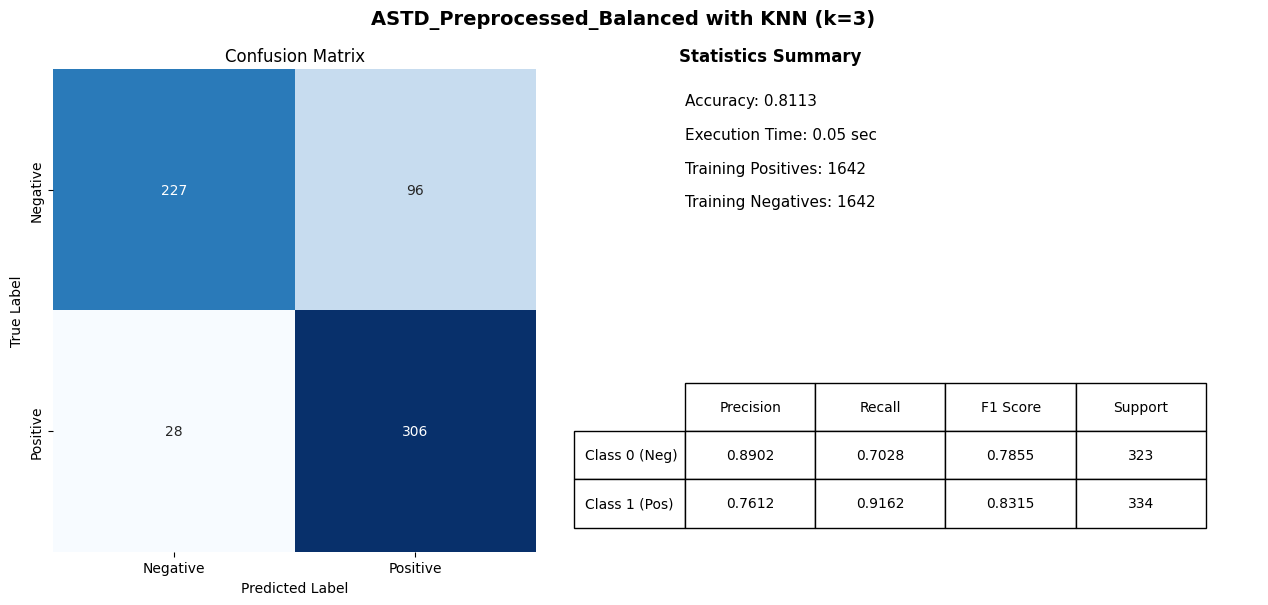

Results saved to 'KNN_Results.csv'


In [77]:
from sklearn.neighbors import KNeighborsClassifier

param_values = [1, 3, 5, 7, 9, 11, 15, 17, 19]
best_params = {}
all_KNN_results = []

# === Step 1: KNN with default n_neighbors
print("\n=== Step 1: KNeighborsClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name="KNN (default)",
        dataset_name=label
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Step 2: Tuning n_neighbors
print("\n=== Step 2: Tuning n_neighbors for KNN ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_k = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        param_name="n_neighbors",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_k

# === Step 3: Evaluation with best k
print("\n=== Step 3: KNN with BEST n_neighbors ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_k = best_params[label]
    print(f"\n-- {label} with best k = {best_k} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name=f"KNN (k={best_k})",
        dataset_name=label,
        model_params={"n_neighbors": best_k}
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_KNN_results)
results_df.to_csv("KNN_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'KNN_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **AdaBoostClassifier**


=== Step 1: AdaBoostClassifier with DEFAULT parameters ===


-- Running default model on ASTD --


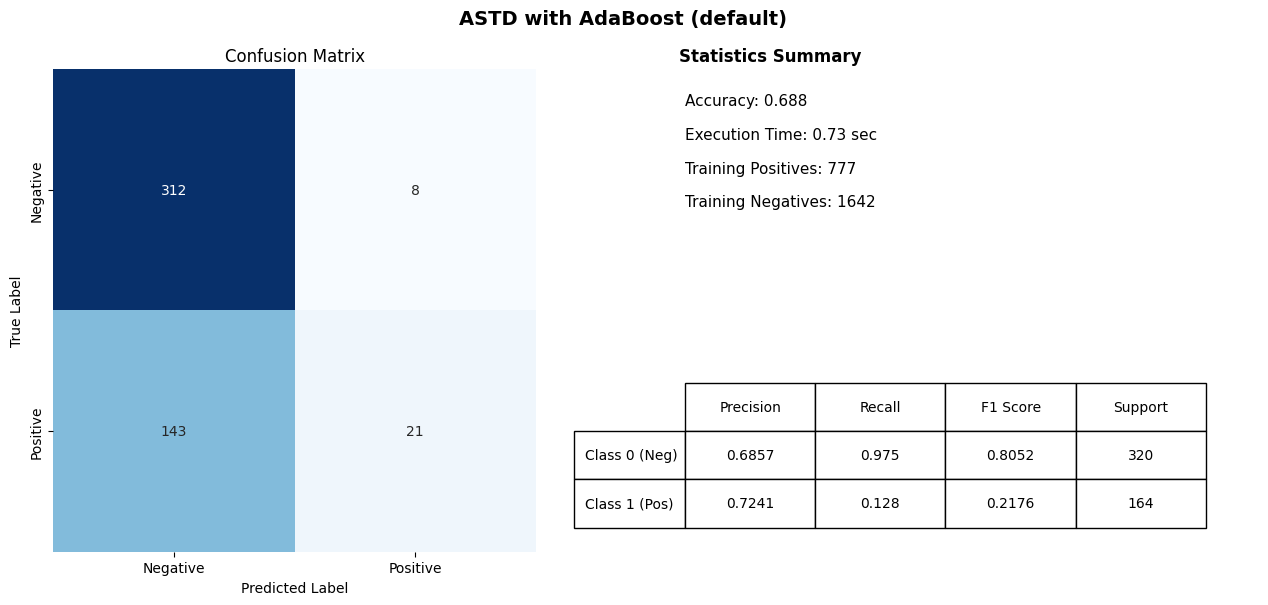


-- Running default model on ASTD_Balanced --


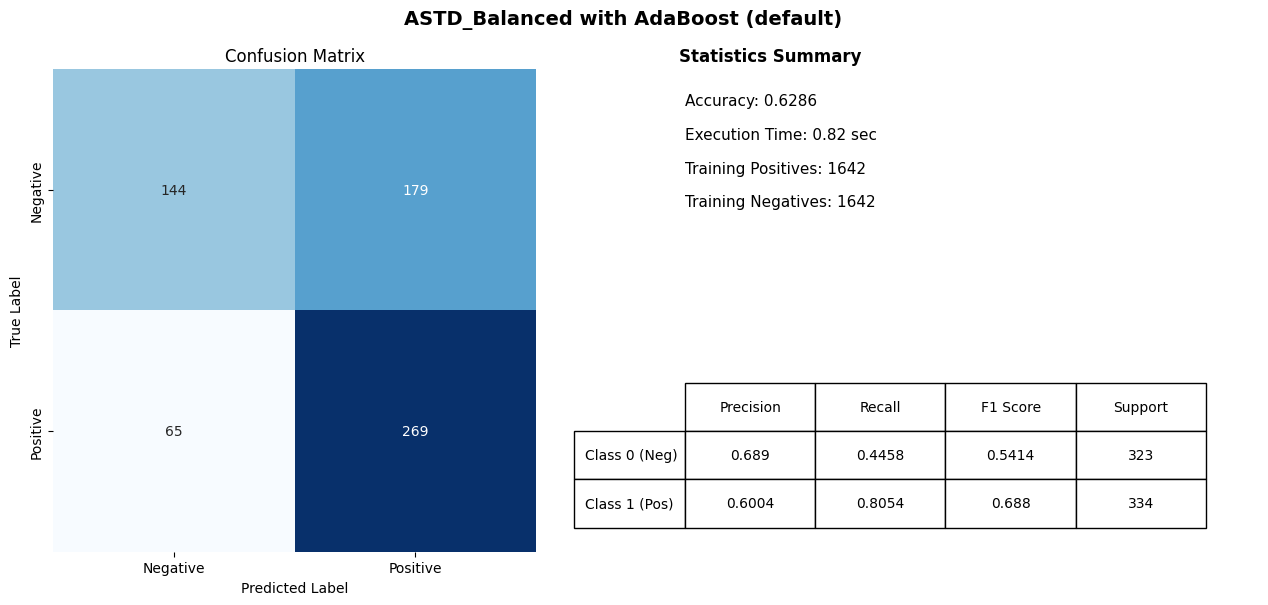


-- Running default model on ASTD_Preprocessed --


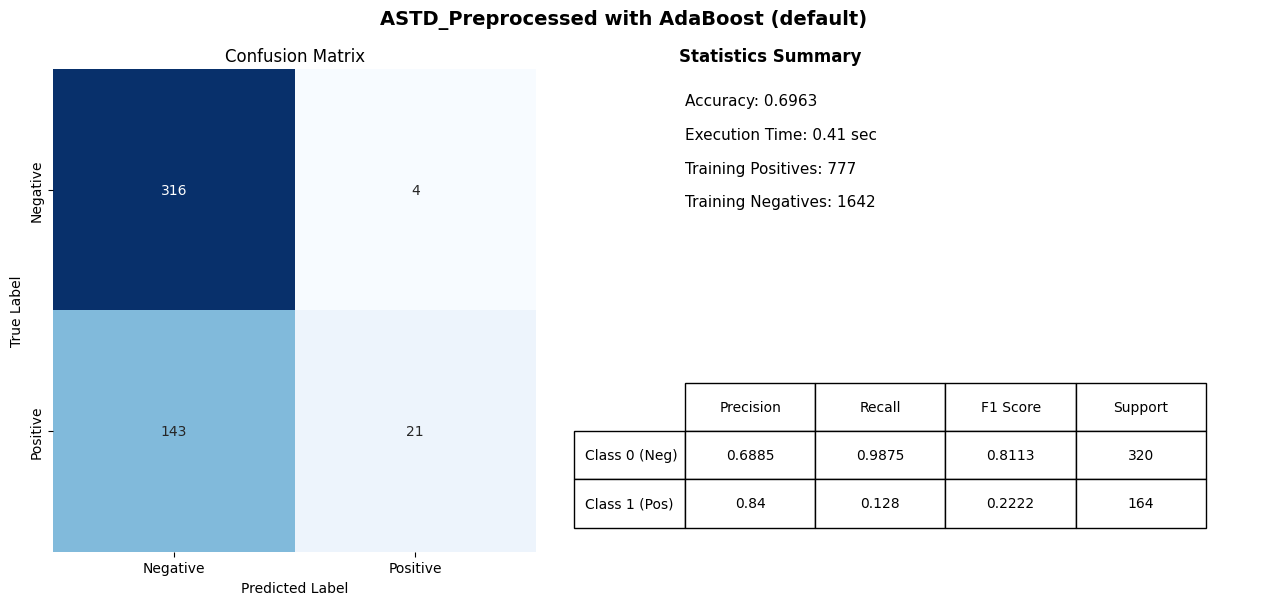


-- Running default model on ASTD_Preprocessed_Balanced --


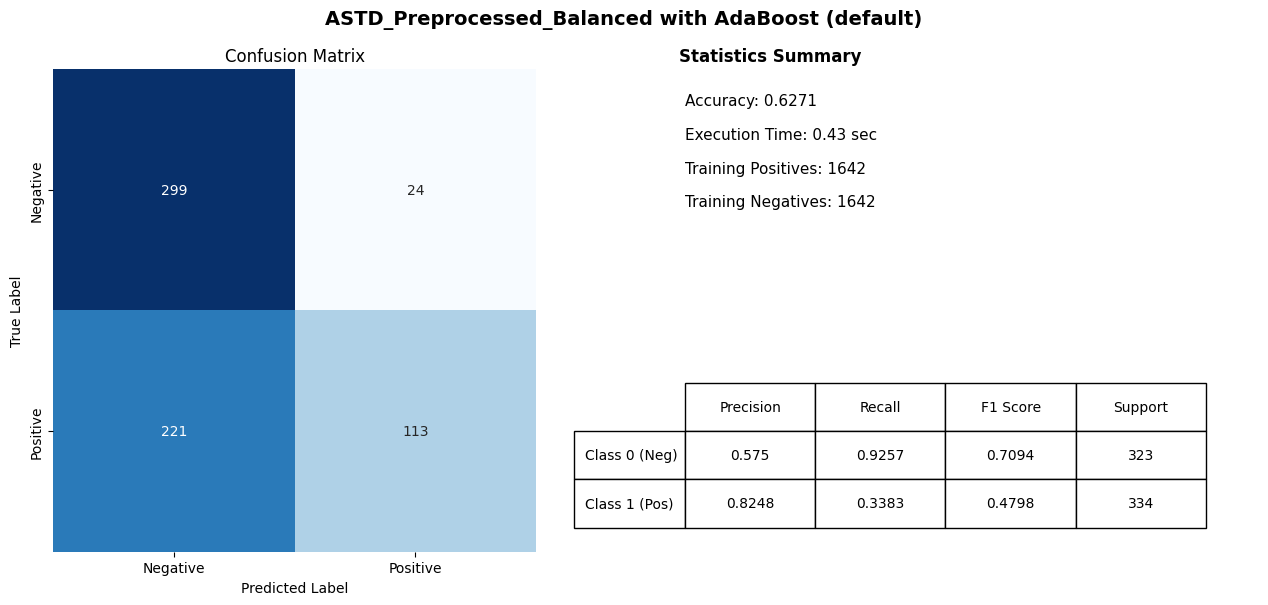


=== Step 2: Tuning n_estimators for AdaBoost ===


-- Tuning ASTD --



n_estimators: 10 | F1[0]: 0.8062 | F1[1]: 0.2268 | Avg F1: 0.5165 | Time: 0.1076s
n_estimators: 50 | F1[0]: 0.8052 | F1[1]: 0.2176 | Avg F1: 0.5114 | Time: 0.5135s
n_estimators: 100 | F1[0]: 0.8119 | F1[1]: 0.264 | Avg F1: 0.5379 | Time: 1.0413s
n_estimators: 200 | F1[0]: 0.8135 | F1[1]: 0.2653 | Avg F1: 0.5394 | Time: 2.0669s
n_estimators: 300 | F1[0]: 0.8156 | F1[1]: 0.2828 | Avg F1: 0.5492 | Time: 3.1036s
n_estimators: 500 | F1[0]: 0.8157 | F1[1]: 0.3054 | Avg F1: 0.5606 | Time: 6.4167s


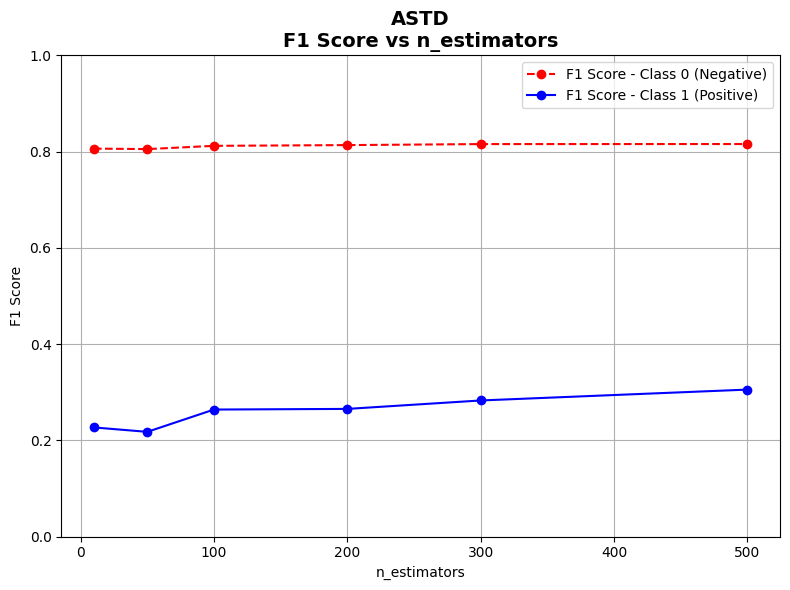


Best n_estimators = 500 with Avg F1 = 0.5606

-- Tuning ASTD_Balanced --



n_estimators: 10 | F1[0]: 0.6788 | F1[1]: 0.2105 | Avg F1: 0.4447 | Time: 0.122s
n_estimators: 50 | F1[0]: 0.5414 | F1[1]: 0.688 | Avg F1: 0.6147 | Time: 0.5575s
n_estimators: 100 | F1[0]: 0.5859 | F1[1]: 0.6991 | Avg F1: 0.6425 | Time: 1.1147s
n_estimators: 200 | F1[0]: 0.6067 | F1[1]: 0.7015 | Avg F1: 0.6541 | Time: 2.2633s
n_estimators: 300 | F1[0]: 0.625 | F1[1]: 0.7073 | Avg F1: 0.6662 | Time: 3.3453s
n_estimators: 500 | F1[0]: 0.6622 | F1[1]: 0.7179 | Avg F1: 0.69 | Time: 6.4376s


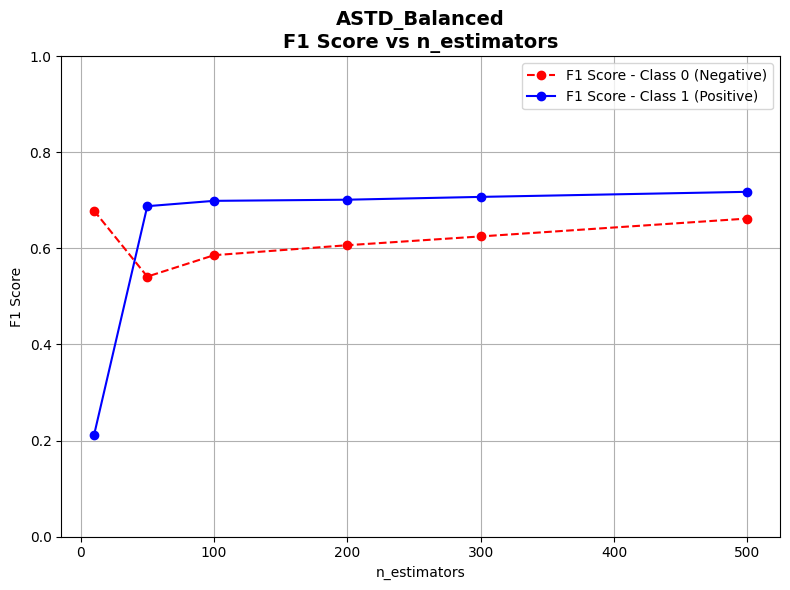


Best n_estimators = 500 with Avg F1 = 0.69

-- Tuning ASTD_Preprocessed --



n_estimators: 10 | F1[0]: 0.8072 | F1[1]: 0.1838 | Avg F1: 0.4955 | Time: 0.0908s
n_estimators: 50 | F1[0]: 0.8113 | F1[1]: 0.2222 | Avg F1: 0.5168 | Time: 0.4031s
n_estimators: 100 | F1[0]: 0.8144 | F1[1]: 0.25 | Avg F1: 0.5322 | Time: 0.7729s
n_estimators: 200 | F1[0]: 0.819 | F1[1]: 0.3507 | Avg F1: 0.5849 | Time: 1.5443s
n_estimators: 300 | F1[0]: 0.8234 | F1[1]: 0.3814 | Avg F1: 0.6024 | Time: 2.2905s
n_estimators: 500 | F1[0]: 0.8318 | F1[1]: 0.4444 | Avg F1: 0.6381 | Time: 4.6516s


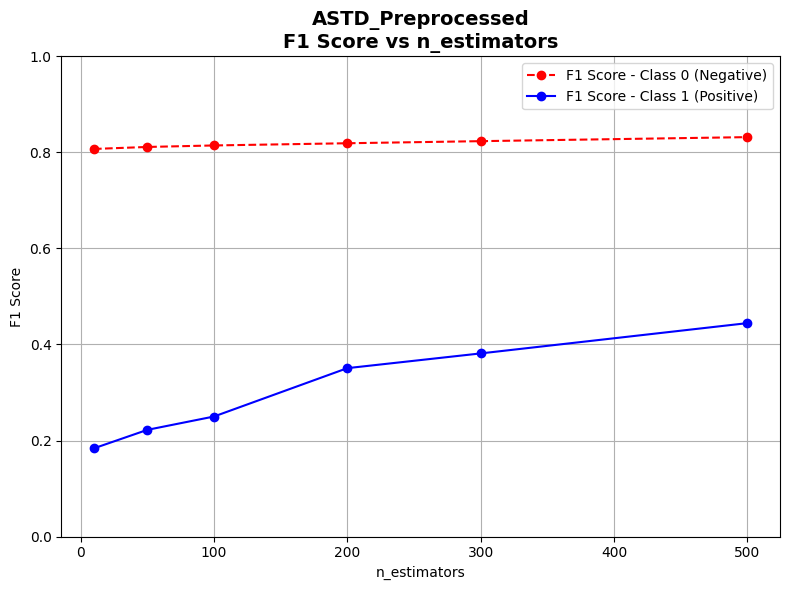


Best n_estimators = 500 with Avg F1 = 0.6381

-- Tuning ASTD_Preprocessed_Balanced --



n_estimators: 10 | F1[0]: 0.2427 | F1[1]: 0.693 | Avg F1: 0.4679 | Time: 0.0954s
n_estimators: 50 | F1[0]: 0.7094 | F1[1]: 0.4798 | Avg F1: 0.5946 | Time: 0.4384s
n_estimators: 100 | F1[0]: 0.5424 | F1[1]: 0.7341 | Avg F1: 0.6382 | Time: 0.8689s
n_estimators: 200 | F1[0]: 0.7526 | F1[1]: 0.6431 | Avg F1: 0.6978 | Time: 1.7062s
n_estimators: 300 | F1[0]: 0.7578 | F1[1]: 0.6887 | Avg F1: 0.7232 | Time: 2.533s
n_estimators: 500 | F1[0]: 0.7751 | F1[1]: 0.7381 | Avg F1: 0.7566 | Time: 4.7314s


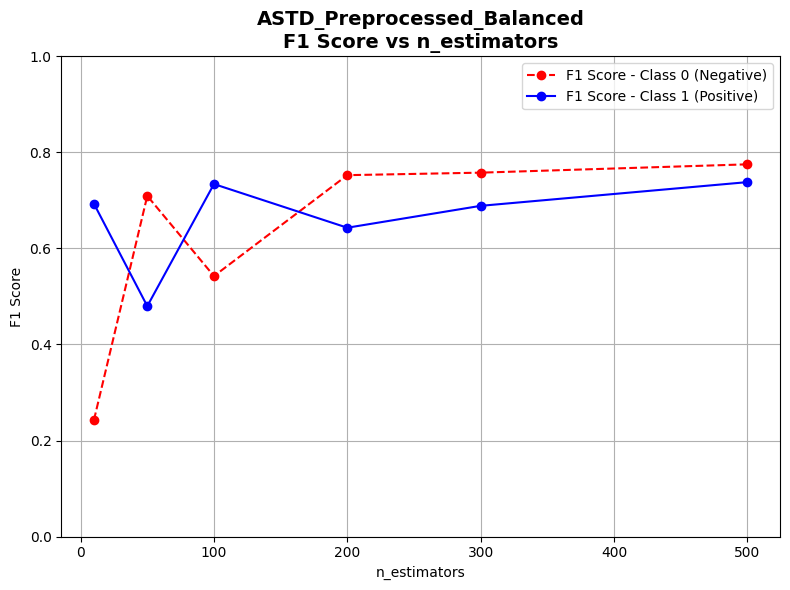


Best n_estimators = 500 with Avg F1 = 0.7566

=== Step 3: AdaBoostClassifier with BEST n_estimators ===


-- ASTD with best n_estimators = 500 --


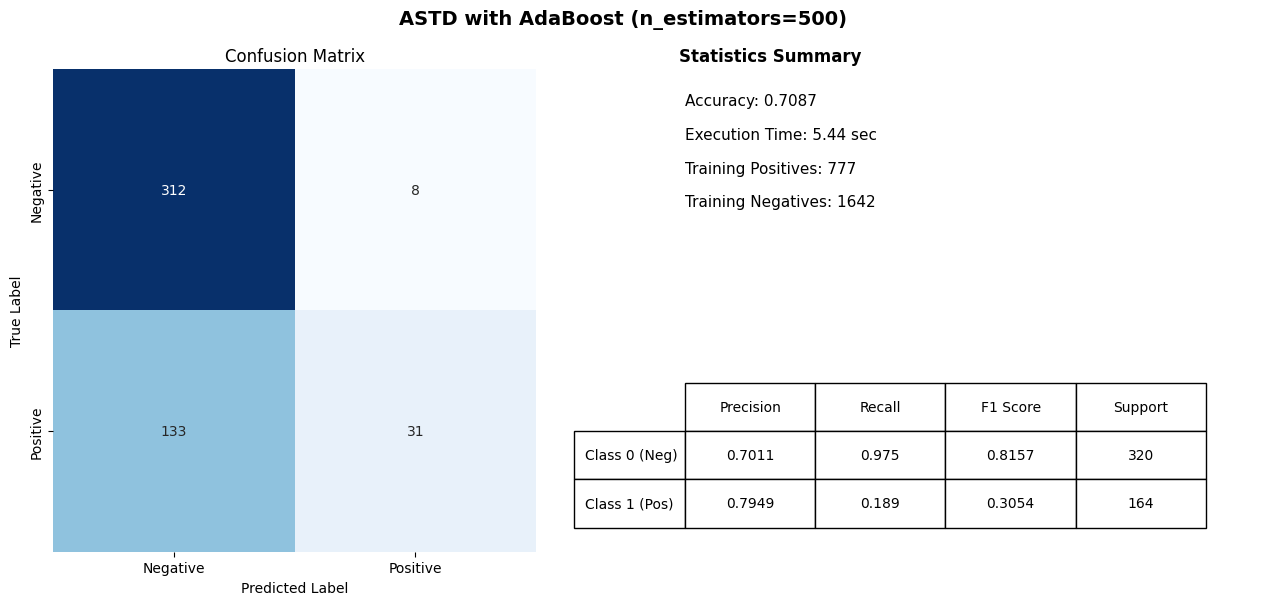


-- ASTD_Balanced with best n_estimators = 500 --


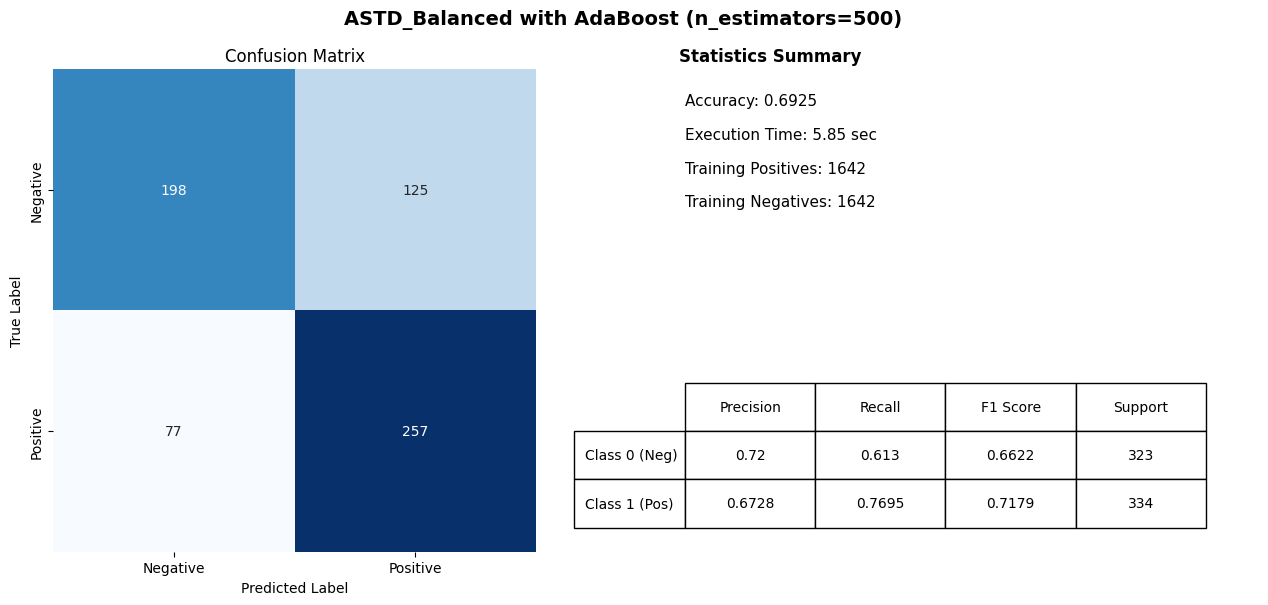


-- ASTD_Preprocessed with best n_estimators = 500 --


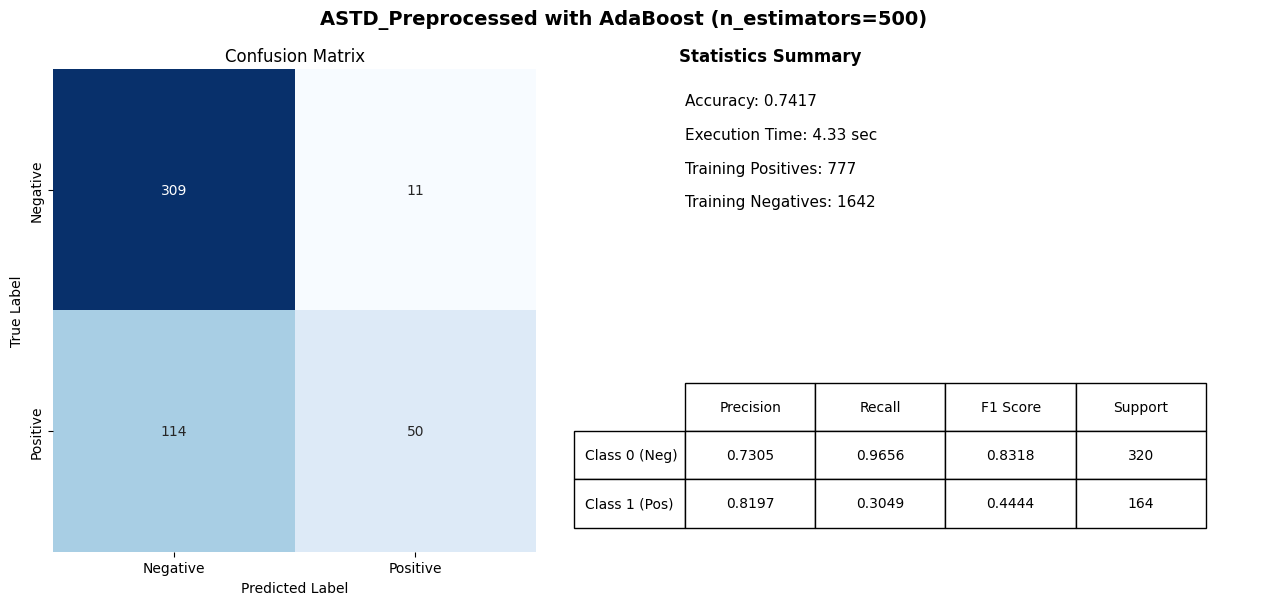


-- ASTD_Preprocessed_Balanced with best n_estimators = 500 --


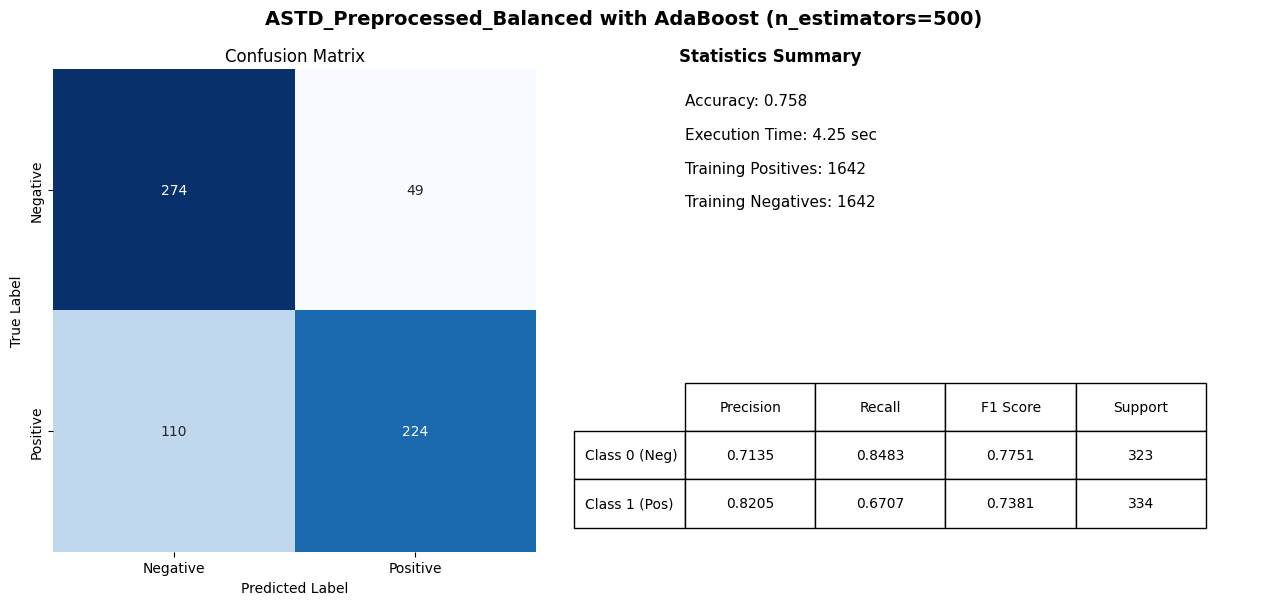

Results saved to 'AdaBoost_Results.csv'


In [78]:
from sklearn.ensemble import AdaBoostClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_ADA_results = []

# === Step 1: AdaBoost with default n_estimators
print("\n=== Step 1: AdaBoostClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name="AdaBoost (default)",
        dataset_name=label
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for AdaBoost ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluate with best n_estimators
print("\n=== Step 3: AdaBoostClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name=f"AdaBoost (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_ADA_results)
results_df.to_csv("AdaBoost_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'AdaBoost_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

# **Save All**

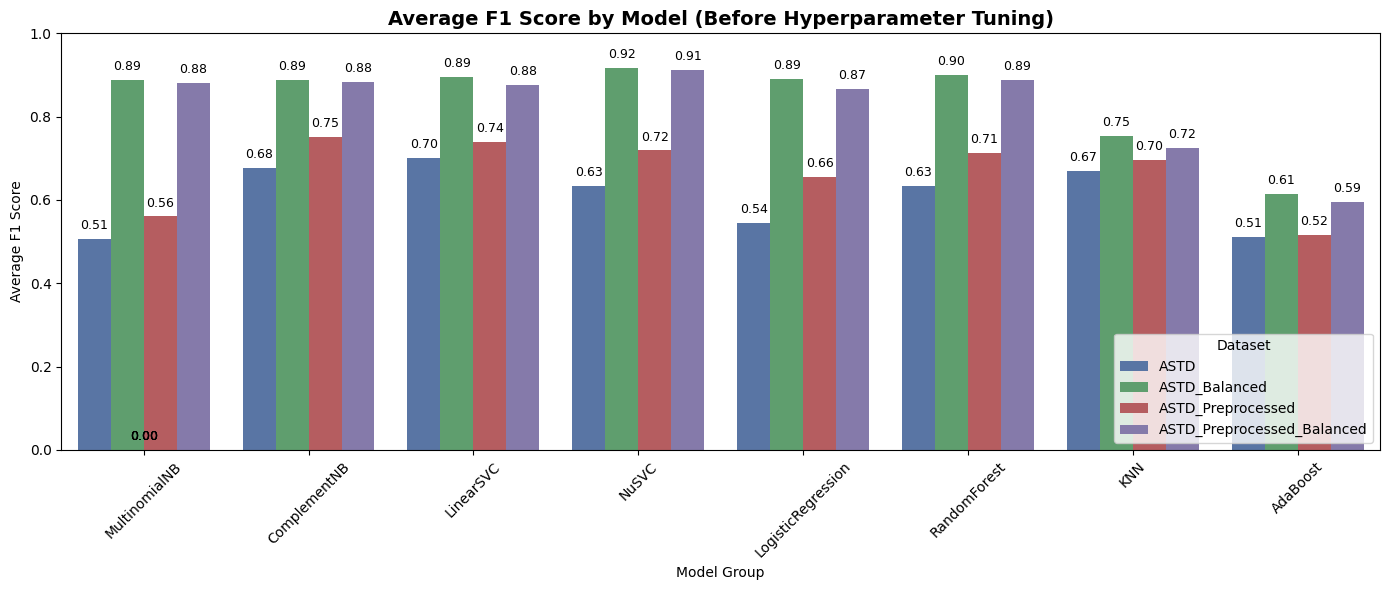

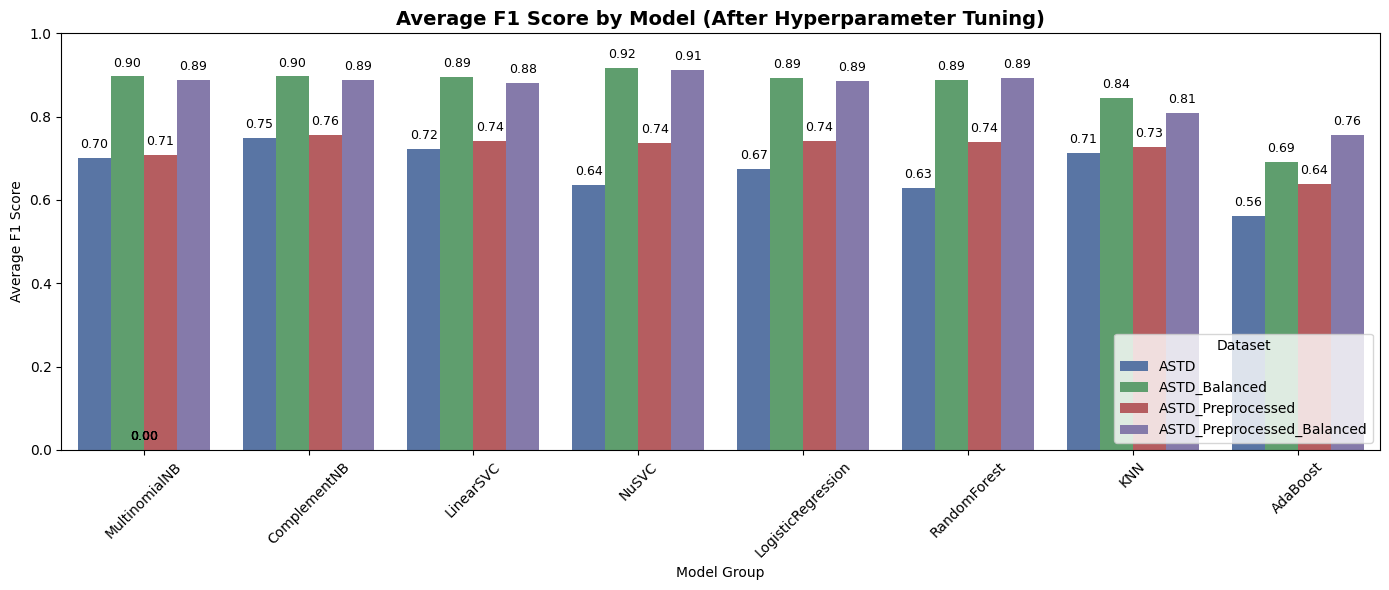

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_Algo_results.to_csv("All_Algorithms_Results.csv", index=False, encoding="utf-8-sig")

# Load the global results
df = pd.read_csv("All_Algorithms_Results.csv")

# Calculate Avg F1 score
df["Avg_F1"] = (df["F1_0"] + df["F1_1"]) / 2

# Split into before and after tuning
before_opt = df[df["Algorithm"].str.contains("default")]
after_opt = df[~df["Algorithm"].str.contains("default")]

# Define dataset order and color palette
dataset_order = ["ASTD", "ASTD_Balanced", "ASTD_Preprocessed", "ASTD_Preprocessed_Balanced"]
dataset_palette = {
    "ASTD": "#4c72b0",
    "ASTD_Balanced": "#55a868",
    "ASTD_Preprocessed": "#c44e52",
    "ASTD_Preprocessed_Balanced": "#8172b2"
}

def plot_avg_f1(data, title):
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        data=data,
        x="Model Group",
        y="Avg_F1",
        hue="Dataset",
        hue_order=dataset_order,
        palette=dataset_palette
    )

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel("Average F1 Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.legend(title="Dataset", loc='lower right')
    plt.tight_layout()
    plt.show()

# Plot before and after optimization
plot_avg_f1(before_opt, "Average F1 Score by Model (Before Hyperparameter Tuning)")
plot_avg_f1(after_opt, "Average F1 Score by Model (After Hyperparameter Tuning)")
